<a href="https://colab.research.google.com/github/ShreyPandit/Quantile-Regression_Lipschitz/blob/master/BostonHousing_Lipschitz_Quantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all Libraries

In [2]:
from tensorflow import keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_test.shape

57344/57026 [==============================] - 0s 0us/step


(102, 13)

In [4]:
y_train = np.expand_dims(y_train,axis=1)
y_test = np.expand_dims(y_test,axis=1)
print(y_train.shape,y_test.shape)

(404, 1) (102, 1)


Scaling all the data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [8]:
# scaler.fit(x_test)
# x_test = scaler.transform(x_test)

In [9]:
# scaler.fit(y_test)
# y_test = scaler.transform(y_test)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20 ,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation=keras.activations.softsign))

In [11]:
from tensorflow.keras import backend as K
func = K.function([model.layers[0].input], [model.layers[-2].output])

In [12]:
lrs = []
K1 = 0.
batch_size=4
from tqdm import tqdm

In [13]:
def lr_schedule(epoch):
    global K1

    Kz = 0.
    
    for i in tqdm(range((len(x_train) - 1) // batch_size + 1)):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
    	
        tmp = np.array(func([xb]))
        activ = np.linalg.norm(tmp)
        
        if activ > Kz:
            Kz = activ
    print("The value of K_z is ",Kz)
    K1 = (1/batch_size)*(Kz)*max(q,1-q)
    lr = 1 / K1
    lrs.append(lr)
    print('Epoch', epoch, 'LR =', lr)
    return lr


In [14]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [15]:
import tensorflow.keras.backend as K
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

# Quantile = 0.95

In [34]:
model_upper = models.Sequential()
model_upper.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_upper.add(layers.Dense(20 ,activation='relu'))
model_upper.add(layers.Dense(1,activation=keras.activations.softsign))
q = 0.95
model_upper.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [35]:
history_upper=model_upper.fit(x_train, y_train, epochs = 1000, batch_size = 4,validation_data=(x_test,y_test),callbacks=[lr_scheduler])

100%|██████████| 101/101 [00:00<00:00, 545.91it/s]


The value of K_z is  4.7064023
Epoch 0 LR = 0.8946379943315865
Epoch 1/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1918 - val_loss: 0.1824


100%|██████████| 101/101 [00:00<00:00, 546.86it/s]

The value of K_z is  4.7064023
Epoch 1 LR = 0.8946379943315865
Epoch 2/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1340

101/101 [==============================] - 0s 2ms/step - loss: 0.1859 - val_loss: 0.1674


100%|██████████| 101/101 [00:00<00:00, 456.12it/s]

The value of K_z is  4.7064023
Epoch 2 LR = 0.8946379943315865
Epoch 3/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.2340

101/101 [==============================] - 0s 2ms/step - loss: 0.1730 - val_loss: 0.1657


100%|██████████| 101/101 [00:00<00:00, 547.55it/s]

The value of K_z is  4.7064023
Epoch 3 LR = 0.8946379943315865
Epoch 4/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0353

101/101 [==============================] - 0s 2ms/step - loss: 0.1666 - val_loss: 0.1612


100%|██████████| 101/101 [00:00<00:00, 542.22it/s]

The value of K_z is  4.7064023
Epoch 4 LR = 0.8946379943315865
Epoch 5/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1793

101/101 [==============================] - 0s 2ms/step - loss: 0.1618 - val_loss: 0.1800


100%|██████████| 101/101 [00:00<00:00, 525.25it/s]

The value of K_z is  4.7064023
Epoch 5 LR = 0.8946379943315865
Epoch 6/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1616 - val_loss: 0.1663


100%|██████████| 101/101 [00:00<00:00, 547.45it/s]

The value of K_z is  4.7064023
Epoch 6 LR = 0.8946379943315865
Epoch 7/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0253

101/101 [==============================] - 0s 2ms/step - loss: 0.1583 - val_loss: 0.1650


100%|██████████| 101/101 [00:00<00:00, 540.34it/s]

The value of K_z is  4.7064023
Epoch 7 LR = 0.8946379943315865
Epoch 8/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0181

101/101 [==============================] - 0s 2ms/step - loss: 0.1579 - val_loss: 0.1696


100%|██████████| 101/101 [00:00<00:00, 534.44it/s]

The value of K_z is  4.7064023
Epoch 8 LR = 0.8946379943315865
Epoch 9/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0238

101/101 [==============================] - 0s 2ms/step - loss: 0.1628 - val_loss: 0.1746


100%|██████████| 101/101 [00:00<00:00, 524.43it/s]

The value of K_z is  4.7064023
Epoch 9 LR = 0.8946379943315865


Epoch 10/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.1621


100%|██████████| 101/101 [00:00<00:00, 525.79it/s]

The value of K_z is  4.7064023
Epoch 10 LR = 0.8946379943315865


Epoch 11/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 546.20it/s]

The value of K_z is  4.7064023
Epoch 11 LR = 0.8946379943315865
Epoch 12/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0350

101/101 [==============================] - 0s 2ms/step - loss: 0.1569 - val_loss: 0.1733


100%|██████████| 101/101 [00:00<00:00, 495.77it/s]

The value of K_z is  4.7064023
Epoch 12 LR = 0.8946379943315865
Epoch 13/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1391

101/101 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1705


100%|██████████| 101/101 [00:00<00:00, 545.48it/s]

The value of K_z is  4.7064023
Epoch 13 LR = 0.8946379943315865
Epoch 14/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0241

101/101 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1751


100%|██████████| 101/101 [00:00<00:00, 502.55it/s]

The value of K_z is  4.7064023
Epoch 14 LR = 0.8946379943315865
Epoch 15/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1746

101/101 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1630


100%|██████████| 101/101 [00:00<00:00, 544.82it/s]

The value of K_z is  4.7064023
Epoch 15 LR = 0.8946379943315865
Epoch 16/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6058

101/101 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1668


100%|██████████| 101/101 [00:00<00:00, 524.57it/s]

The value of K_z is  4.7064023
Epoch 16 LR = 0.8946379943315865


Epoch 17/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1694


100%|██████████| 101/101 [00:00<00:00, 538.28it/s]

The value of K_z is  4.7064023
Epoch 17 LR = 0.8946379943315865
Epoch 18/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0310

101/101 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1610


100%|██████████| 101/101 [00:00<00:00, 528.61it/s]

The value of K_z is  4.7064023
Epoch 18 LR = 0.8946379943315865


Epoch 19/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1725


100%|██████████| 101/101 [00:00<00:00, 528.54it/s]

The value of K_z is  4.7064023
Epoch 19 LR = 0.8946379943315865
Epoch 20/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.1657


100%|██████████| 101/101 [00:00<00:00, 578.37it/s]

The value of K_z is  4.7064023
Epoch 20 LR = 0.8946379943315865
Epoch 21/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3955

101/101 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 529.73it/s]


The value of K_z is  4.7064023
Epoch 21 LR = 0.8946379943315865
Epoch 22/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1635


100%|██████████| 101/101 [00:00<00:00, 538.66it/s]

The value of K_z is  4.7064023
Epoch 22 LR = 0.8946379943315865
Epoch 23/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5029

101/101 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1599


100%|██████████| 101/101 [00:00<00:00, 512.26it/s]


The value of K_z is  4.7064023
Epoch 23 LR = 0.8946379943315865
Epoch 24/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1766


100%|██████████| 101/101 [00:00<00:00, 547.92it/s]

The value of K_z is  4.7064023
Epoch 24 LR = 0.8946379943315865
Epoch 25/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0184

101/101 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1625


100%|██████████| 101/101 [00:00<00:00, 546.44it/s]

The value of K_z is  4.7064023
Epoch 25 LR = 0.8946379943315865
Epoch 26/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0257

101/101 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1615


100%|██████████| 101/101 [00:00<00:00, 528.77it/s]


The value of K_z is  4.7064023
Epoch 26 LR = 0.8946379943315865
Epoch 27/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 538.44it/s]

The value of K_z is  4.7064023
Epoch 27 LR = 0.8946379943315865
Epoch 28/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0573

101/101 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1646


100%|██████████| 101/101 [00:00<00:00, 554.06it/s]

The value of K_z is  4.7064023
Epoch 28 LR = 0.8946379943315865
Epoch 29/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0366

101/101 [==============================] - 0s 2ms/step - loss: 0.1578 - val_loss: 0.1680


100%|██████████| 101/101 [00:00<00:00, 549.32it/s]

The value of K_z is  4.7064023
Epoch 29 LR = 0.8946379943315865
Epoch 30/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0390

101/101 [==============================] - 0s 2ms/step - loss: 0.1645 - val_loss: 0.1610


100%|██████████| 101/101 [00:00<00:00, 521.06it/s]


The value of K_z is  4.7064023
Epoch 30 LR = 0.8946379943315865
Epoch 31/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1585 - val_loss: 0.1623


100%|██████████| 101/101 [00:00<00:00, 557.55it/s]

The value of K_z is  4.7064023
Epoch 31 LR = 0.8946379943315865
Epoch 32/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0278

101/101 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 538.04it/s]

The value of K_z is  4.7064023
Epoch 32 LR = 0.8946379943315865
Epoch 33/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0170

101/101 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1705


100%|██████████| 101/101 [00:00<00:00, 526.08it/s]

The value of K_z is  4.7064023
Epoch 33 LR = 0.8946379943315865


Epoch 34/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1694


100%|██████████| 101/101 [00:00<00:00, 540.19it/s]

The value of K_z is  4.7064023
Epoch 34 LR = 0.8946379943315865
Epoch 35/1000
  1/101 [..............................] - ETA: 0s - loss: 0.8821

101/101 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1618


100%|██████████| 101/101 [00:00<00:00, 529.93it/s]

The value of K_z is  4.7064023
Epoch 35 LR = 0.8946379943315865
Epoch 36/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1858


100%|██████████| 101/101 [00:00<00:00, 546.51it/s]

The value of K_z is  4.7064023
Epoch 36 LR = 0.8946379943315865
Epoch 37/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4843

101/101 [==============================] - 0s 2ms/step - loss: 0.1564 - val_loss: 0.1673


100%|██████████| 101/101 [00:00<00:00, 531.70it/s]

The value of K_z is  4.7064023
Epoch 37 LR = 0.8946379943315865
Epoch 38/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0366

101/101 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1675


100%|██████████| 101/101 [00:00<00:00, 562.63it/s]

The value of K_z is  4.7064023
Epoch 38 LR = 0.8946379943315865
Epoch 39/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3158

101/101 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 520.58it/s]


The value of K_z is  4.7064023
Epoch 39 LR = 0.8946379943315865
Epoch 40/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 488.48it/s]

The value of K_z is  4.7064023
Epoch 40 LR = 0.8946379943315865
Epoch 41/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1517

101/101 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1882


100%|██████████| 101/101 [00:00<00:00, 509.96it/s]


The value of K_z is  4.7064023
Epoch 41 LR = 0.8946379943315865
Epoch 42/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1677


100%|██████████| 101/101 [00:00<00:00, 494.85it/s]

The value of K_z is  4.7064023
Epoch 42 LR = 0.8946379943315865
Epoch 43/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1293

101/101 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1732


100%|██████████| 101/101 [00:00<00:00, 535.10it/s]

The value of K_z is  4.7064023
Epoch 43 LR = 0.8946379943315865
Epoch 44/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1273

101/101 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1638


100%|██████████| 101/101 [00:00<00:00, 535.17it/s]

The value of K_z is  4.7064023
Epoch 44 LR = 0.8946379943315865
Epoch 45/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0232

101/101 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1677


100%|██████████| 101/101 [00:00<00:00, 550.03it/s]

The value of K_z is  4.7064023
Epoch 45 LR = 0.8946379943315865
Epoch 46/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2753

101/101 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1777


100%|██████████| 101/101 [00:00<00:00, 546.20it/s]

The value of K_z is  4.7064023
Epoch 46 LR = 0.8946379943315865
Epoch 47/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0225

101/101 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1598


100%|██████████| 101/101 [00:00<00:00, 543.83it/s]

The value of K_z is  4.7064023
Epoch 47 LR = 0.8946379943315865
Epoch 48/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0309

101/101 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 534.57it/s]

The value of K_z is  4.7064023
Epoch 48 LR = 0.8946379943315865
Epoch 49/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 509.87it/s]


The value of K_z is  4.7064023
Epoch 49 LR = 0.8946379943315865
Epoch 50/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1633


100%|██████████| 101/101 [00:00<00:00, 551.17it/s]

The value of K_z is  4.7064023
Epoch 50 LR = 0.8946379943315865
Epoch 51/1000
  1/101 [..............................] - ETA: 0s - loss: 0.8091

101/101 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1715


100%|██████████| 101/101 [00:00<00:00, 541.96it/s]

The value of K_z is  4.7064023
Epoch 51 LR = 0.8946379943315865
Epoch 52/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0100

101/101 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 550.35it/s]

The value of K_z is  4.7064023
Epoch 52 LR = 0.8946379943315865
Epoch 53/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1659


100%|██████████| 101/101 [00:00<00:00, 556.95it/s]

The value of K_z is  4.7064023
Epoch 53 LR = 0.8946379943315865
Epoch 54/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0224

101/101 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 543.15it/s]

The value of K_z is  4.7064023
Epoch 54 LR = 0.8946379943315865
Epoch 55/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 559.00it/s]

The value of K_z is  4.7064023
Epoch 55 LR = 0.8946379943315865
Epoch 56/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1652


100%|██████████| 101/101 [00:00<00:00, 543.40it/s]

The value of K_z is  4.7064023
Epoch 56 LR = 0.8946379943315865
Epoch 57/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0228

101/101 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1633


100%|██████████| 101/101 [00:00<00:00, 547.72it/s]

The value of K_z is  4.7064023
Epoch 57 LR = 0.8946379943315865
Epoch 58/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0160

101/101 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1695


100%|██████████| 101/101 [00:00<00:00, 505.06it/s]

The value of K_z is  4.7064023
Epoch 58 LR = 0.8946379943315865
Epoch 59/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1180

101/101 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1651


100%|██████████| 101/101 [00:00<00:00, 553.04it/s]

The value of K_z is  4.7064023
Epoch 59 LR = 0.8946379943315865
Epoch 60/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0130

101/101 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1610


100%|██████████| 101/101 [00:00<00:00, 505.42it/s]

The value of K_z is  4.7064023
Epoch 60 LR = 0.8946379943315865
Epoch 61/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1994

101/101 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1706


100%|██████████| 101/101 [00:00<00:00, 543.59it/s]

The value of K_z is  4.7064023
Epoch 61 LR = 0.8946379943315865
Epoch 62/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0327

101/101 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 527.63it/s]

The value of K_z is  4.7064023
Epoch 62 LR = 0.8946379943315865


Epoch 63/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1591


100%|██████████| 101/101 [00:00<00:00, 516.59it/s]


The value of K_z is  4.7064023
Epoch 63 LR = 0.8946379943315865
Epoch 64/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1476 - val_loss: 0.1674


100%|██████████| 101/101 [00:00<00:00, 541.41it/s]

The value of K_z is  4.7064023
Epoch 64 LR = 0.8946379943315865
Epoch 65/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0236

101/101 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 537.62it/s]

The value of K_z is  4.7064023
Epoch 65 LR = 0.8946379943315865
Epoch 66/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0286

101/101 [==============================] - 0s 2ms/step - loss: 0.1476 - val_loss: 0.1633


100%|██████████| 101/101 [00:00<00:00, 536.84it/s]

The value of K_z is  4.7064023
Epoch 66 LR = 0.8946379943315865
Epoch 67/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4966

101/101 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1640


100%|██████████| 101/101 [00:00<00:00, 530.09it/s]

The value of K_z is  4.7064023
Epoch 67 LR = 0.8946379943315865
Epoch 68/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0240

101/101 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1641


100%|██████████| 101/101 [00:00<00:00, 551.22it/s]

The value of K_z is  4.7064023
Epoch 68 LR = 0.8946379943315865
Epoch 69/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2263

101/101 [==============================] - 0s 2ms/step - loss: 0.1473 - val_loss: 0.1614


100%|██████████| 101/101 [00:00<00:00, 551.92it/s]

The value of K_z is  4.7064023
Epoch 69 LR = 0.8946379943315865
Epoch 70/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0320

101/101 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1657


100%|██████████| 101/101 [00:00<00:00, 512.56it/s]


The value of K_z is  4.7064023
Epoch 70 LR = 0.8946379943315865
Epoch 71/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1661


100%|██████████| 101/101 [00:00<00:00, 535.94it/s]

The value of K_z is  4.7064023
Epoch 71 LR = 0.8946379943315865
Epoch 72/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4932

101/101 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.1623


100%|██████████| 101/101 [00:00<00:00, 508.30it/s]


The value of K_z is  4.7064023
Epoch 72 LR = 0.8946379943315865
Epoch 73/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1626


100%|██████████| 101/101 [00:00<00:00, 548.89it/s]

The value of K_z is  4.7064023
Epoch 73 LR = 0.8946379943315865
Epoch 74/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0361

101/101 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1624


100%|██████████| 101/101 [00:00<00:00, 536.14it/s]

The value of K_z is  4.7064023
Epoch 74 LR = 0.8946379943315865
Epoch 75/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5393

101/101 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.1638


100%|██████████| 101/101 [00:00<00:00, 514.56it/s]


The value of K_z is  4.7064023
Epoch 75 LR = 0.8946379943315865
Epoch 76/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 535.46it/s]

The value of K_z is  4.7064023
Epoch 76 LR = 0.8946379943315865
Epoch 77/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 511.43it/s]


The value of K_z is  4.7064023
Epoch 77 LR = 0.8946379943315865
Epoch 78/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1620


100%|██████████| 101/101 [00:00<00:00, 546.89it/s]

The value of K_z is  4.7064023
Epoch 78 LR = 0.8946379943315865
Epoch 79/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1112

101/101 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 478.01it/s]

The value of K_z is  4.7064023
Epoch 79 LR = 0.8946379943315865
Epoch 80/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.1733

101/101 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1638


100%|██████████| 101/101 [00:00<00:00, 536.09it/s]

The value of K_z is  4.7064023
Epoch 80 LR = 0.8946379943315865
Epoch 81/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.1461 - val_loss: 0.1615


100%|██████████| 101/101 [00:00<00:00, 563.01it/s]

The value of K_z is  4.7064023
Epoch 81 LR = 0.8946379943315865
Epoch 82/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0144

101/101 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1642


100%|██████████| 101/101 [00:00<00:00, 562.75it/s]

The value of K_z is  4.7064023
Epoch 82 LR = 0.8946379943315865
Epoch 83/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0063

101/101 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1733


100%|██████████| 101/101 [00:00<00:00, 549.43it/s]

The value of K_z is  4.7064023
Epoch 83 LR = 0.8946379943315865
Epoch 84/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0254

101/101 [==============================] - 0s 2ms/step - loss: 0.1465 - val_loss: 0.1592


100%|██████████| 101/101 [00:00<00:00, 510.06it/s]


The value of K_z is  4.7064023
Epoch 84 LR = 0.8946379943315865
Epoch 85/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.1685


100%|██████████| 101/101 [00:00<00:00, 543.17it/s]

The value of K_z is  4.7064023
Epoch 85 LR = 0.8946379943315865
Epoch 86/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0569

101/101 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 544.63it/s]

The value of K_z is  4.7064023
Epoch 86 LR = 0.8946379943315865
Epoch 87/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1473 - val_loss: 0.1667


100%|██████████| 101/101 [00:00<00:00, 550.19it/s]

The value of K_z is  4.7064023
Epoch 87 LR = 0.8946379943315865
Epoch 88/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0170

101/101 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1603


100%|██████████| 101/101 [00:00<00:00, 563.72it/s]

The value of K_z is  4.7064023
Epoch 88 LR = 0.8946379943315865
Epoch 89/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1334

101/101 [==============================] - 0s 2ms/step - loss: 0.1466 - val_loss: 0.1613


100%|██████████| 101/101 [00:00<00:00, 573.43it/s]

The value of K_z is  4.7064023
Epoch 89 LR = 0.8946379943315865
Epoch 90/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1471

101/101 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.1700


100%|██████████| 101/101 [00:00<00:00, 529.91it/s]

The value of K_z is  4.7064023
Epoch 90 LR = 0.8946379943315865


Epoch 91/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1742


100%|██████████| 101/101 [00:00<00:00, 496.20it/s]

The value of K_z is  4.7064023
Epoch 91 LR = 0.8946379943315865
Epoch 92/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1803

101/101 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1678


100%|██████████| 101/101 [00:00<00:00, 527.89it/s]

The value of K_z is  4.7064023
Epoch 92 LR = 0.8946379943315865


Epoch 93/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 545.86it/s]

The value of K_z is  4.7064023
Epoch 93 LR = 0.8946379943315865
Epoch 94/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0720

101/101 [==============================] - 0s 2ms/step - loss: 0.1459 - val_loss: 0.1744


100%|██████████| 101/101 [00:00<00:00, 547.17it/s]

The value of K_z is  4.7064023
Epoch 94 LR = 0.8946379943315865
Epoch 95/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0161

101/101 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1658


100%|██████████| 101/101 [00:00<00:00, 553.80it/s]

The value of K_z is  4.7064023
Epoch 95 LR = 0.8946379943315865
Epoch 96/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1833


100%|██████████| 101/101 [00:00<00:00, 544.44it/s]

The value of K_z is  4.7064023
Epoch 96 LR = 0.8946379943315865
Epoch 97/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.1464 - val_loss: 0.1659


100%|██████████| 101/101 [00:00<00:00, 569.22it/s]

The value of K_z is  4.7064023
Epoch 97 LR = 0.8946379943315865
Epoch 98/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0236

101/101 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1661


100%|██████████| 101/101 [00:00<00:00, 536.25it/s]

The value of K_z is  4.7064023
Epoch 98 LR = 0.8946379943315865
Epoch 99/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0621

101/101 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1751


100%|██████████| 101/101 [00:00<00:00, 543.40it/s]

The value of K_z is  4.7064023
Epoch 99 LR = 0.8946379943315865
Epoch 100/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1743


100%|██████████| 101/101 [00:00<00:00, 553.13it/s]

The value of K_z is  4.7064023
Epoch 100 LR = 0.8946379943315865
Epoch 101/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0130

101/101 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1780


100%|██████████| 101/101 [00:00<00:00, 557.17it/s]

The value of K_z is  4.7064023
Epoch 101 LR = 0.8946379943315865
Epoch 102/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1393

101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1719


100%|██████████| 101/101 [00:00<00:00, 558.17it/s]

The value of K_z is  4.7064023
Epoch 102 LR = 0.8946379943315865
Epoch 103/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3769

101/101 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1575


100%|██████████| 101/101 [00:00<00:00, 522.96it/s]


The value of K_z is  4.7064023
Epoch 103 LR = 0.8946379943315865
Epoch 104/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1482 - val_loss: 0.1636


100%|██████████| 101/101 [00:00<00:00, 560.27it/s]

The value of K_z is  4.7064023
Epoch 104 LR = 0.8946379943315865
Epoch 105/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0134

101/101 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 540.17it/s]

The value of K_z is  4.7064023
Epoch 105 LR = 0.8946379943315865
Epoch 106/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4527

101/101 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 554.16it/s]

The value of K_z is  4.7064023
Epoch 106 LR = 0.8946379943315865
Epoch 107/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1726

101/101 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 537.79it/s]

The value of K_z is  4.7064023
Epoch 107 LR = 0.8946379943315865
Epoch 108/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0253

101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1695


100%|██████████| 101/101 [00:00<00:00, 531.31it/s]

The value of K_z is  4.7064023
Epoch 108 LR = 0.8946379943315865
Epoch 109/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 505.56it/s]

The value of K_z is  4.7064023
Epoch 109 LR = 0.8946379943315865
Epoch 110/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1675

101/101 [==============================] - 0s 2ms/step - loss: 0.1466 - val_loss: 0.1678


100%|██████████| 101/101 [00:00<00:00, 530.57it/s]

The value of K_z is  4.7064023
Epoch 110 LR = 0.8946379943315865
Epoch 111/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4420

101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 531.08it/s]

The value of K_z is  4.7064023
Epoch 111 LR = 0.8946379943315865


Epoch 112/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1722


100%|██████████| 101/101 [00:00<00:00, 531.82it/s]

The value of K_z is  4.7064023
Epoch 112 LR = 0.8946379943315865
Epoch 113/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4515

101/101 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1675


100%|██████████| 101/101 [00:00<00:00, 541.08it/s]

The value of K_z is  4.7064023
Epoch 113 LR = 0.8946379943315865
Epoch 114/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0085

101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 548.01it/s]

The value of K_z is  4.7064023
Epoch 114 LR = 0.8946379943315865
Epoch 115/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0317

101/101 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1664


100%|██████████| 101/101 [00:00<00:00, 546.55it/s]

The value of K_z is  4.7064023
Epoch 115 LR = 0.8946379943315865
Epoch 116/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 551.28it/s]

The value of K_z is  4.7064023
Epoch 116 LR = 0.8946379943315865
Epoch 117/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0364

101/101 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 513.61it/s]


The value of K_z is  4.7064023
Epoch 117 LR = 0.8946379943315865
Epoch 118/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1743


100%|██████████| 101/101 [00:00<00:00, 486.21it/s]

The value of K_z is  4.7064023
Epoch 118 LR = 0.8946379943315865
Epoch 119/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1691

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1913


100%|██████████| 101/101 [00:00<00:00, 495.73it/s]

The value of K_z is  4.7064023
Epoch 119 LR = 0.8946379943315865
Epoch 120/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1354

101/101 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1899


100%|██████████| 101/101 [00:00<00:00, 524.47it/s]

The value of K_z is  4.7064023
Epoch 120 LR = 0.8946379943315865


Epoch 121/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.1640


100%|██████████| 101/101 [00:00<00:00, 553.20it/s]

The value of K_z is  4.7064023
Epoch 121 LR = 0.8946379943315865
Epoch 122/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0234

101/101 [==============================] - 0s 2ms/step - loss: 0.1451 - val_loss: 0.1706


100%|██████████| 101/101 [00:00<00:00, 559.51it/s]

The value of K_z is  4.7064023
Epoch 122 LR = 0.8946379943315865
Epoch 123/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0158

101/101 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1718


100%|██████████| 101/101 [00:00<00:00, 526.87it/s]

The value of K_z is  4.7064023
Epoch 123 LR = 0.8946379943315865


Epoch 124/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1595


100%|██████████| 101/101 [00:00<00:00, 528.04it/s]

The value of K_z is  4.7064023
Epoch 124 LR = 0.8946379943315865


Epoch 125/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1593


100%|██████████| 101/101 [00:00<00:00, 534.94it/s]

The value of K_z is  4.7064023
Epoch 125 LR = 0.8946379943315865
Epoch 126/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0158

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 475.21it/s]

The value of K_z is  4.7064023
Epoch 126 LR = 0.8946379943315865
Epoch 127/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1427

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1694


100%|██████████| 101/101 [00:00<00:00, 545.51it/s]

The value of K_z is  4.7064023
Epoch 127 LR = 0.8946379943315865
Epoch 128/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3699

101/101 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1641


100%|██████████| 101/101 [00:00<00:00, 540.24it/s]

The value of K_z is  4.7064023
Epoch 128 LR = 0.8946379943315865
Epoch 129/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1337

101/101 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 558.43it/s]

The value of K_z is  4.7064023
Epoch 129 LR = 0.8946379943315865
Epoch 130/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0266

101/101 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1630


100%|██████████| 101/101 [00:00<00:00, 522.28it/s]


The value of K_z is  4.7064023
Epoch 130 LR = 0.8946379943315865
Epoch 131/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 536.33it/s]

The value of K_z is  4.7064023
Epoch 131 LR = 0.8946379943315865
Epoch 132/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0689

101/101 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1588


100%|██████████| 101/101 [00:00<00:00, 565.10it/s]

The value of K_z is  4.7064023
Epoch 132 LR = 0.8946379943315865
Epoch 133/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1390

101/101 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.1677


100%|██████████| 101/101 [00:00<00:00, 519.93it/s]

The value of K_z is  4.7064023
Epoch 133 LR = 0.8946379943315865


Epoch 134/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 0.1646


100%|██████████| 101/101 [00:00<00:00, 551.10it/s]

The value of K_z is  4.7064023
Epoch 134 LR = 0.8946379943315865
Epoch 135/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0239

101/101 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1729


100%|██████████| 101/101 [00:00<00:00, 545.92it/s]

The value of K_z is  4.7064023
Epoch 135 LR = 0.8946379943315865
Epoch 136/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0169

101/101 [==============================] - 0s 2ms/step - loss: 0.1465 - val_loss: 0.1706


100%|██████████| 101/101 [00:00<00:00, 541.22it/s]

The value of K_z is  4.7064023
Epoch 136 LR = 0.8946379943315865
Epoch 137/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0167

101/101 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1829


100%|██████████| 101/101 [00:00<00:00, 543.52it/s]

The value of K_z is  4.7064023
Epoch 137 LR = 0.8946379943315865
Epoch 138/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1609


100%|██████████| 101/101 [00:00<00:00, 512.03it/s]

The value of K_z is  4.7064023
Epoch 138 LR = 0.8946379943315865
Epoch 139/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5005

101/101 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 556.87it/s]

The value of K_z is  4.7064023
Epoch 139 LR = 0.8946379943315865
Epoch 140/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0129

101/101 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1765


100%|██████████| 101/101 [00:00<00:00, 543.12it/s]

The value of K_z is  4.7064023
Epoch 140 LR = 0.8946379943315865
Epoch 141/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7497

101/101 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1673


100%|██████████| 101/101 [00:00<00:00, 554.14it/s]

The value of K_z is  4.7064023
Epoch 141 LR = 0.8946379943315865
Epoch 142/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1801


100%|██████████| 101/101 [00:00<00:00, 547.79it/s]

The value of K_z is  4.7064023
Epoch 142 LR = 0.8946379943315865
Epoch 143/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2721

101/101 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1756


100%|██████████| 101/101 [00:00<00:00, 558.86it/s]

The value of K_z is  4.7064023
Epoch 143 LR = 0.8946379943315865
Epoch 144/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0254

101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 555.13it/s]

The value of K_z is  4.7064023
Epoch 144 LR = 0.8946379943315865
Epoch 145/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0258

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 521.40it/s]

The value of K_z is  4.7064023
Epoch 145 LR = 0.8946379943315865


Epoch 146/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1783


100%|██████████| 101/101 [00:00<00:00, 534.86it/s]

The value of K_z is  4.7064023
Epoch 146 LR = 0.8946379943315865
Epoch 147/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0150

101/101 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 515.51it/s]


The value of K_z is  4.7064023
Epoch 147 LR = 0.8946379943315865
Epoch 148/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1748


100%|██████████| 101/101 [00:00<00:00, 548.17it/s]

The value of K_z is  4.7064023
Epoch 148 LR = 0.8946379943315865
Epoch 149/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0927

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 518.77it/s]


The value of K_z is  4.7064023
Epoch 149 LR = 0.8946379943315865
Epoch 150/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 529.71it/s]

The value of K_z is  4.7064023
Epoch 150 LR = 0.8946379943315865
Epoch 151/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4859

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1720


100%|██████████| 101/101 [00:00<00:00, 546.74it/s]

The value of K_z is  4.7064023
Epoch 151 LR = 0.8946379943315865
Epoch 152/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1666


100%|██████████| 101/101 [00:00<00:00, 530.10it/s]

The value of K_z is  4.7064023
Epoch 152 LR = 0.8946379943315865
Epoch 153/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0267

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1728


100%|██████████| 101/101 [00:00<00:00, 532.36it/s]

The value of K_z is  4.7064023
Epoch 153 LR = 0.8946379943315865
Epoch 154/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0077

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1764


100%|██████████| 101/101 [00:00<00:00, 526.74it/s]

The value of K_z is  4.7064023
Epoch 154 LR = 0.8946379943315865


Epoch 155/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 542.44it/s]

The value of K_z is  4.7064023
Epoch 155 LR = 0.8946379943315865
Epoch 156/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4464

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1836


100%|██████████| 101/101 [00:00<00:00, 528.26it/s]

The value of K_z is  4.7064023
Epoch 156 LR = 0.8946379943315865


Epoch 157/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1759


100%|██████████| 101/101 [00:00<00:00, 544.19it/s]

The value of K_z is  4.7064023
Epoch 157 LR = 0.8946379943315865
Epoch 158/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0520

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1725


100%|██████████| 101/101 [00:00<00:00, 546.94it/s]

The value of K_z is  4.7064023
Epoch 158 LR = 0.8946379943315865
Epoch 159/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4969

101/101 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1705


100%|██████████| 101/101 [00:00<00:00, 547.21it/s]

The value of K_z is  4.7064023
Epoch 159 LR = 0.8946379943315865
Epoch 160/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5052

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1661


100%|██████████| 101/101 [00:00<00:00, 556.52it/s]

The value of K_z is  4.7064023
Epoch 160 LR = 0.8946379943315865
Epoch 161/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1032

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 533.03it/s]

The value of K_z is  4.7064023
Epoch 161 LR = 0.8946379943315865
Epoch 162/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0195

101/101 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 545.49it/s]

The value of K_z is  4.7064023
Epoch 162 LR = 0.8946379943315865
Epoch 163/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0182

101/101 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 516.99it/s]


The value of K_z is  4.7064023
Epoch 163 LR = 0.8946379943315865
Epoch 164/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 538.71it/s]

The value of K_z is  4.7064023
Epoch 164 LR = 0.8946379943315865
Epoch 165/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2294

101/101 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1710


100%|██████████| 101/101 [00:00<00:00, 548.88it/s]

The value of K_z is  4.7064023
Epoch 165 LR = 0.8946379943315865
Epoch 166/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1638

101/101 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.1720


100%|██████████| 101/101 [00:00<00:00, 544.47it/s]

The value of K_z is  4.7064023
Epoch 166 LR = 0.8946379943315865
Epoch 167/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1917

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 560.80it/s]

The value of K_z is  4.7064023
Epoch 167 LR = 0.8946379943315865
Epoch 168/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0350

101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1692


100%|██████████| 101/101 [00:00<00:00, 541.14it/s]

The value of K_z is  4.7064023
Epoch 168 LR = 0.8946379943315865
Epoch 169/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4404

101/101 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 541.29it/s]

The value of K_z is  4.7064023
Epoch 169 LR = 0.8946379943315865
Epoch 170/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0182

101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 543.51it/s]

The value of K_z is  4.7064023
Epoch 170 LR = 0.8946379943315865
Epoch 171/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0242

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1651


100%|██████████| 101/101 [00:00<00:00, 509.55it/s]


The value of K_z is  4.7064023
Epoch 171 LR = 0.8946379943315865
Epoch 172/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 532.57it/s]

The value of K_z is  4.7064023
Epoch 172 LR = 0.8946379943315865
Epoch 173/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1735


100%|██████████| 101/101 [00:00<00:00, 520.83it/s]


The value of K_z is  4.7064023
Epoch 173 LR = 0.8946379943315865
Epoch 174/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1664


100%|██████████| 101/101 [00:00<00:00, 551.63it/s]

The value of K_z is  4.7064023
Epoch 174 LR = 0.8946379943315865
Epoch 175/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0518

101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1800


100%|██████████| 101/101 [00:00<00:00, 537.49it/s]

The value of K_z is  4.7064023
Epoch 175 LR = 0.8946379943315865
Epoch 176/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4395

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1677


100%|██████████| 101/101 [00:00<00:00, 541.86it/s]

The value of K_z is  4.7064023
Epoch 176 LR = 0.8946379943315865
Epoch 177/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0991

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1739


100%|██████████| 101/101 [00:00<00:00, 548.73it/s]

The value of K_z is  4.7064023
Epoch 177 LR = 0.8946379943315865
Epoch 178/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0209

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1696


100%|██████████| 101/101 [00:00<00:00, 526.60it/s]

The value of K_z is  4.7064023
Epoch 178 LR = 0.8946379943315865


Epoch 179/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 534.17it/s]

The value of K_z is  4.7064023
Epoch 179 LR = 0.8946379943315865
Epoch 180/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0221

101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 524.46it/s]

The value of K_z is  4.7064023
Epoch 180 LR = 0.8946379943315865
Epoch 181/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0088

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1783


100%|██████████| 101/101 [00:00<00:00, 539.49it/s]

The value of K_z is  4.7064023
Epoch 181 LR = 0.8946379943315865
Epoch 182/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4622

101/101 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 484.98it/s]

The value of K_z is  4.7064023
Epoch 182 LR = 0.8946379943315865
Epoch 183/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1067

101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1786


100%|██████████| 101/101 [00:00<00:00, 565.35it/s]

The value of K_z is  4.7064023
Epoch 183 LR = 0.8946379943315865
Epoch 184/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4794

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1673


100%|██████████| 101/101 [00:00<00:00, 486.36it/s]

The value of K_z is  4.7064023
Epoch 184 LR = 0.8946379943315865
Epoch 185/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1286

101/101 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 517.19it/s]


The value of K_z is  4.7064023
Epoch 185 LR = 0.8946379943315865
Epoch 186/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 538.90it/s]

The value of K_z is  4.7064023
Epoch 186 LR = 0.8946379943315865
Epoch 187/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0152

101/101 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 535.05it/s]

The value of K_z is  4.7064023
Epoch 187 LR = 0.8946379943315865
Epoch 188/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6012

101/101 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 540.11it/s]

The value of K_z is  4.7064023
Epoch 188 LR = 0.8946379943315865
Epoch 189/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0268

101/101 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1704


100%|██████████| 101/101 [00:00<00:00, 523.06it/s]

The value of K_z is  4.7064023
Epoch 189 LR = 0.8946379943315865


Epoch 190/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1629


100%|██████████| 101/101 [00:00<00:00, 550.29it/s]

The value of K_z is  4.7064023
Epoch 190 LR = 0.8946379943315865
Epoch 191/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0055

101/101 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 524.54it/s]

The value of K_z is  4.7064023
Epoch 191 LR = 0.8946379943315865


Epoch 192/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1682


100%|██████████| 101/101 [00:00<00:00, 502.28it/s]

The value of K_z is  4.7064023
Epoch 192 LR = 0.8946379943315865
Epoch 193/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.1429

101/101 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1618


100%|██████████| 101/101 [00:00<00:00, 530.45it/s]

The value of K_z is  4.7064023
Epoch 193 LR = 0.8946379943315865
Epoch 194/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1647


100%|██████████| 101/101 [00:00<00:00, 545.14it/s]

The value of K_z is  4.7064023
Epoch 194 LR = 0.8946379943315865
Epoch 195/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6768

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1587


100%|██████████| 101/101 [00:00<00:00, 547.05it/s]

The value of K_z is  4.7064023
Epoch 195 LR = 0.8946379943315865
Epoch 196/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1991

101/101 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1585


100%|██████████| 101/101 [00:00<00:00, 545.75it/s]

The value of K_z is  4.7064023
Epoch 196 LR = 0.8946379943315865
Epoch 197/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1596


100%|██████████| 101/101 [00:00<00:00, 522.66it/s]

The value of K_z is  4.7064023
Epoch 

197 LR = 0.8946379943315865
Epoch 198/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1671


100%|██████████| 101/101 [00:00<00:00, 528.52it/s]

The value of K_z is  4.7064023
Epoch 198 LR = 0.8946379943315865


Epoch 199/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1571


100%|██████████| 101/101 [00:00<00:00, 513.75it/s]


The value of K_z is  4.7064023
Epoch 199 LR = 0.8946379943315865
Epoch 200/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1571


100%|██████████| 101/101 [00:00<00:00, 552.98it/s]

The value of K_z is  4.7064023
Epoch 200 LR = 0.8946379943315865
Epoch 201/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0170

101/101 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1600


100%|██████████| 101/101 [00:00<00:00, 509.49it/s]


The value of K_z is  4.7064023
Epoch 201 LR = 0.8946379943315865
Epoch 202/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1637


100%|██████████| 101/101 [00:00<00:00, 523.50it/s]


The value of K_z is  4.7064023
Epoch 202 LR = 0.8946379943315865
Epoch 203/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1635


100%|██████████| 101/101 [00:00<00:00, 544.25it/s]

The value of K_z is  4.7064023
Epoch 203 LR = 0.8946379943315865
Epoch 204/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0189

101/101 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 541.65it/s]

The value of K_z is  4.7064023
Epoch 204 LR = 0.8946379943315865
Epoch 205/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0267

101/101 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1652


100%|██████████| 101/101 [00:00<00:00, 534.88it/s]

The value of K_z is  4.7064023
Epoch 205 LR = 0.8946379943315865
Epoch 206/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0095

101/101 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1667


100%|██████████| 101/101 [00:00<00:00, 548.05it/s]

The value of K_z is  4.7064023
Epoch 206 LR = 0.8946379943315865
Epoch 207/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 553.68it/s]

The value of K_z is  4.7064023
Epoch 207 LR = 0.8946379943315865
Epoch 208/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1729


100%|██████████| 101/101 [00:00<00:00, 521.94it/s]


The value of K_z is  4.7064023
Epoch 208 LR = 0.8946379943315865
Epoch 209/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1665


100%|██████████| 101/101 [00:00<00:00, 532.30it/s]

The value of K_z is  4.7064023
Epoch 209 LR = 0.8946379943315865
Epoch 210/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4896

101/101 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1640


100%|██████████| 101/101 [00:00<00:00, 552.99it/s]

The value of K_z is  4.7064023
Epoch 210 LR = 0.8946379943315865
Epoch 211/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0135

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1687


100%|██████████| 101/101 [00:00<00:00, 538.07it/s]

The value of K_z is  4.7064023
Epoch 211 LR = 0.8946379943315865
Epoch 212/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0640

101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1695


100%|██████████| 101/101 [00:00<00:00, 524.39it/s]

The value of K_z is  4.7064023
Epoch 212 LR = 0.8946379943315865


Epoch 213/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 530.70it/s]

The value of K_z is  4.7064023
Epoch 213 LR = 0.8946379943315865
Epoch 214/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 573.69it/s]

The value of K_z is  4.7064023
Epoch 214 LR = 0.8946379943315865
Epoch 215/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0765

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1850


100%|██████████| 101/101 [00:00<00:00, 561.07it/s]

The value of K_z is  4.7064023
Epoch 215 LR = 0.8946379943315865
Epoch 216/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0095

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 559.35it/s]

The value of K_z is  4.7064023
Epoch 216 LR = 0.8946379943315865
Epoch 217/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0120

101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 554.49it/s]

The value of K_z is  4.7064023
Epoch 217 LR = 0.8946379943315865
Epoch 218/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5698

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1621


100%|██████████| 101/101 [00:00<00:00, 556.90it/s]

The value of K_z is  4.7064023
Epoch 218 LR = 0.8946379943315865
Epoch 219/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5002

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1675


100%|██████████| 101/101 [00:00<00:00, 547.36it/s]

The value of K_z is  4.7064023
Epoch 219 LR = 0.8946379943315865
Epoch 220/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0156

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 520.68it/s]

The value of K_z is  4.7064023
Epoch 220 LR = 0.8946379943315865


Epoch 221/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1761


100%|██████████| 101/101 [00:00<00:00, 507.33it/s]


The value of K_z is  4.7064023
Epoch 221 LR = 0.8946379943315865
Epoch 222/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1632


100%|██████████| 101/101 [00:00<00:00, 551.61it/s]

The value of K_z is  4.7064023
Epoch 222 LR = 0.8946379943315865
Epoch 223/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0210

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1793


100%|██████████| 101/101 [00:00<00:00, 546.18it/s]

The value of K_z is  4.7064023
Epoch 223 LR = 0.8946379943315865
Epoch 224/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0138

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1741


100%|██████████| 101/101 [00:00<00:00, 551.12it/s]

The value of K_z is  4.7064023
Epoch 224 LR = 0.8946379943315865
Epoch 225/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1773


100%|██████████| 101/101 [00:00<00:00, 546.63it/s]

The value of K_z is  4.7064023
Epoch 225 LR = 0.8946379943315865
Epoch 226/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3593

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1826


100%|██████████| 101/101 [00:00<00:00, 507.13it/s]

The value of K_z is  4.7064023
Epoch 226 LR = 0.8946379943315865
Epoch 227/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0912

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1783


100%|██████████| 101/101 [00:00<00:00, 518.09it/s]


The value of K_z is  4.7064023
Epoch 227 LR = 0.8946379943315865
Epoch 228/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1687


100%|██████████| 101/101 [00:00<00:00, 549.20it/s]

The value of K_z is  4.7064023
Epoch 228 LR = 0.8946379943315865
Epoch 229/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0152

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1713


100%|██████████| 101/101 [00:00<00:00, 554.65it/s]

The value of K_z is  4.7064023
Epoch 229 LR = 0.8946379943315865
Epoch 230/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0990

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1868


100%|██████████| 101/101 [00:00<00:00, 548.40it/s]

The value of K_z is  4.7064023
Epoch 230 LR = 0.8946379943315865
Epoch 231/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1858


100%|██████████| 101/101 [00:00<00:00, 520.26it/s]


The value of K_z is  4.7064023
Epoch 231 LR = 0.8946379943315865
Epoch 232/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1745


100%|██████████| 101/101 [00:00<00:00, 557.16it/s]

The value of K_z is  4.7064023
Epoch 232 LR = 0.8946379943315865
Epoch 233/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1614


100%|██████████| 101/101 [00:00<00:00, 536.78it/s]

The value of K_z is  4.7064023
Epoch 233 LR = 0.8946379943315865
Epoch 234/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0104

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 513.02it/s]


The value of K_z is  4.7064023
Epoch 234 LR = 0.8946379943315865
Epoch 235/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1772


100%|██████████| 101/101 [00:00<00:00, 486.40it/s]

The value of K_z is  4.7064023
Epoch 235 LR = 0.8946379943315865
Epoch 236/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1079

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1669


100%|██████████| 101/101 [00:00<00:00, 549.27it/s]

The value of K_z is  4.7064023
Epoch 236 LR = 0.8946379943315865
Epoch 237/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1821


100%|██████████| 101/101 [00:00<00:00, 468.29it/s]

The value of K_z is  4.7064023
Epoch 237 LR = 0.8946379943315865
Epoch 238/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1579

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1975


100%|██████████| 101/101 [00:00<00:00, 551.34it/s]

The value of K_z is  4.7064023
Epoch 238 LR = 0.8946379943315865
Epoch 239/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4817

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1750


100%|██████████| 101/101 [00:00<00:00, 561.87it/s]

The value of K_z is  4.7064023
Epoch 239 LR = 0.8946379943315865
Epoch 240/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0189

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 541.71it/s]

The value of K_z is  4.7064023
Epoch 240 LR = 0.8946379943315865
Epoch 241/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1800


100%|██████████| 101/101 [00:00<00:00, 511.66it/s]

The value of K_z is  4.7064023
Epoch 241 LR = 0.8946379943315865
Epoch 242/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1641

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 541.12it/s]

The value of K_z is  4.7064023
Epoch 242 LR = 0.8946379943315865
Epoch 243/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0281

101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1656


100%|██████████| 101/101 [00:00<00:00, 528.91it/s]

The value of K_z is  4.7064023
Epoch 243 LR = 0.8946379943315865


Epoch 244/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1834


100%|██████████| 101/101 [00:00<00:00, 553.75it/s]

The value of K_z is  4.7064023
Epoch 244 LR = 0.8946379943315865
Epoch 245/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0023

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1697


100%|██████████| 101/101 [00:00<00:00, 532.32it/s]

The value of K_z is  4.7064023
Epoch 245 LR = 0.8946379943315865
Epoch 246/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0161

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 535.29it/s]

The value of K_z is  4.7064023
Epoch 246 LR = 0.8946379943315865
Epoch 247/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1731


100%|██████████| 101/101 [00:00<00:00, 555.61it/s]

The value of K_z is  4.7064023
Epoch 247 LR = 0.8946379943315865
Epoch 248/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0578

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 506.18it/s]

The value of K_z is  4.7064023
Epoch 248 LR = 0.8946379943315865
Epoch 249/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1501

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1867


100%|██████████| 101/101 [00:00<00:00, 483.64it/s]

The value of K_z is  4.7064023
Epoch 249 LR = 0.8946379943315865
Epoch 250/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1781

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1775


100%|██████████| 101/101 [00:00<00:00, 515.39it/s]


The value of K_z is  4.7064023
Epoch 250 LR = 0.8946379943315865
Epoch 251/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1815


100%|██████████| 101/101 [00:00<00:00, 516.41it/s]


The value of K_z is  4.7064023
Epoch 251 LR = 0.8946379943315865
Epoch 252/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 541.69it/s]

The value of K_z is  4.7064023
Epoch 252 LR = 0.8946379943315865
Epoch 253/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0245

101/101 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 554.63it/s]

The value of K_z is  4.7064023
Epoch 253 LR = 0.8946379943315865
Epoch 254/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0146

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1722


100%|██████████| 101/101 [00:00<00:00, 540.38it/s]

The value of K_z is  4.7064023
Epoch 254 LR = 0.8946379943315865
Epoch 255/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0075

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1741


100%|██████████| 101/101 [00:00<00:00, 508.53it/s]


The value of K_z is  4.7064023
Epoch 255 LR = 0.8946379943315865
Epoch 256/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1678


100%|██████████| 101/101 [00:00<00:00, 554.75it/s]

The value of K_z is  4.7064023
Epoch 256 LR = 0.8946379943315865
Epoch 257/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2971

101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1645


100%|██████████| 101/101 [00:00<00:00, 509.28it/s]


The value of K_z is  4.7064023
Epoch 257 LR = 0.8946379943315865
Epoch 258/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1816


100%|██████████| 101/101 [00:00<00:00, 533.25it/s]

The value of K_z is  4.7064023
Epoch 258 LR = 0.8946379943315865
Epoch 259/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3832

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1789


100%|██████████| 101/101 [00:00<00:00, 533.42it/s]

The value of K_z is  4.7064023
Epoch 259 LR = 0.8946379943315865
Epoch 260/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0109

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1665


100%|██████████| 101/101 [00:00<00:00, 530.19it/s]

The value of K_z is  4.7064023
Epoch 260 LR = 0.8946379943315865


Epoch 261/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1673


100%|██████████| 101/101 [00:00<00:00, 552.77it/s]

The value of K_z is  4.7064023
Epoch 261 LR = 0.8946379943315865
Epoch 262/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0173

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1605


100%|██████████| 101/101 [00:00<00:00, 510.24it/s]

The value of K_z is  4.7064023
Epoch 262 LR = 0.8946379943315865
Epoch 263/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1063

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1683


100%|██████████| 101/101 [00:00<00:00, 534.68it/s]

The value of K_z is  4.7064023
Epoch 263 LR = 0.8946379943315865
Epoch 264/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 516.97it/s]


The value of K_z is  4.7064023
Epoch 264 LR = 0.8946379943315865
Epoch 265/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1647


100%|██████████| 101/101 [00:00<00:00, 529.76it/s]

The value of K_z is  4.7064023
Epoch 265 LR = 0.8946379943315865
Epoch 266/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0291

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 558.43it/s]

The value of K_z is  4.7064023
Epoch 266 LR = 0.8946379943315865
Epoch 267/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0168

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1829


100%|██████████| 101/101 [00:00<00:00, 553.73it/s]

The value of K_z is  4.7064023
Epoch 267 LR = 0.8946379943315865
Epoch 268/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0172

101/101 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1665


100%|██████████| 101/101 [00:00<00:00, 543.14it/s]

The value of K_z is  4.7064023
Epoch 268 LR = 0.8946379943315865
Epoch 269/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0141

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 552.85it/s]

The value of K_z is  4.7064023
Epoch 269 LR = 0.8946379943315865
Epoch 270/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1642


100%|██████████| 101/101 [00:00<00:00, 542.03it/s]

The value of K_z is  4.7064023
Epoch 270 LR = 0.8946379943315865
Epoch 271/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4884

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1588


100%|██████████| 101/101 [00:00<00:00, 526.42it/s]

The value of K_z is  4.7064023
Epoch 271 LR = 0.8946379943315865


Epoch 272/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1627


100%|██████████| 101/101 [00:00<00:00, 518.01it/s]


The value of K_z is  4.7064023
Epoch 272 LR = 0.8946379943315865
Epoch 273/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1835


100%|██████████| 101/101 [00:00<00:00, 565.45it/s]

The value of K_z is  4.7064023
Epoch 273 LR = 0.8946379943315865
Epoch 274/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4929

101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 531.75it/s]

The value of K_z is  4.7064023
Epoch 274 LR = 0.8946379943315865


Epoch 275/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1678


100%|██████████| 101/101 [00:00<00:00, 523.80it/s]

The value of K_z is  4.7064023
Epoch 275 LR = 0.8946379943315865


Epoch 276/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1709


100%|██████████| 101/101 [00:00<00:00, 542.11it/s]

The value of K_z is  4.7064023
Epoch 276 LR = 0.8946379943315865
Epoch 277/1000
  1/101 [..............................] - ETA: 0s - loss: 0.8263

101/101 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1647


100%|██████████| 101/101 [00:00<00:00, 551.97it/s]

The value of K_z is  4.7064023
Epoch 277 LR = 0.8946379943315865
Epoch 278/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4898

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1776


100%|██████████| 101/101 [00:00<00:00, 521.62it/s]

The value of K_z is  4.7064023
Epoch 278 LR = 0.8946379943315865


Epoch 279/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1651


100%|██████████| 101/101 [00:00<00:00, 518.93it/s]


The value of K_z is  4.7064023
Epoch 279 LR = 0.8946379943315865
Epoch 280/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1708


100%|██████████| 101/101 [00:00<00:00, 548.59it/s]

The value of K_z is  4.7064023
Epoch 280 LR = 0.8946379943315865
Epoch 281/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4987

101/101 [==============================] - 0s 3ms/step - loss: 0.1427 - val_loss: 0.1845


100%|██████████| 101/101 [00:00<00:00, 532.45it/s]

The value of K_z is  4.7064023
Epoch 281 LR = 0.8946379943315865
Epoch 282/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0297

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1796


100%|██████████| 101/101 [00:00<00:00, 578.64it/s]

The value of K_z is  4.7064023
Epoch 282 LR = 0.8946379943315865
Epoch 283/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4907

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1721


100%|██████████| 101/101 [00:00<00:00, 561.00it/s]

The value of K_z is  4.7064023
Epoch 283 LR = 0.8946379943315865
Epoch 284/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4396

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1969


100%|██████████| 101/101 [00:00<00:00, 552.49it/s]

The value of K_z is  4.7064023
Epoch 284 LR = 0.8946379943315865
Epoch 285/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0227

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1814


100%|██████████| 101/101 [00:00<00:00, 517.96it/s]


The value of K_z is  4.7064023
Epoch 285 LR = 0.8946379943315865
Epoch 286/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1691


100%|██████████| 101/101 [00:00<00:00, 524.11it/s]

The value of K_z is  4.7064023
Epoch 286 LR = 0.8946379943315865


Epoch 287/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1926


100%|██████████| 101/101 [00:00<00:00, 539.77it/s]

The value of K_z is  4.7064023
Epoch 287 LR = 0.8946379943315865
Epoch 288/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0067

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1908


100%|██████████| 101/101 [00:00<00:00, 536.53it/s]

The value of K_z is  4.7064023
Epoch 288 LR = 0.8946379943315865
Epoch 289/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1935


100%|██████████| 101/101 [00:00<00:00, 549.55it/s]

The value of K_z is  4.7064023
Epoch 289 LR = 0.8946379943315865
Epoch 290/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0609

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1722


100%|██████████| 101/101 [00:00<00:00, 518.73it/s]


The value of K_z is  4.7064023
Epoch 290 LR = 0.8946379943315865
Epoch 291/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 531.65it/s]

The value of K_z is  4.7064023
Epoch 291 LR = 0.8946379943315865
Epoch 292/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 526.02it/s]

The value of K_z is  4.7064023
Epoch 292 LR = 0.8946379943315865


Epoch 293/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1723


100%|██████████| 101/101 [00:00<00:00, 525.07it/s]

The value of K_z is  4.7064023
Epoch 

293 LR = 0.8946379943315865
Epoch 294/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1879


100%|██████████| 101/101 [00:00<00:00, 551.37it/s]

The value of K_z is  4.7064023
Epoch 294 LR = 0.8946379943315865
Epoch 295/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1853


100%|██████████| 101/101 [00:00<00:00, 520.23it/s]


The value of K_z is  4.7064023
Epoch 295 LR = 0.8946379943315865
Epoch 296/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 527.25it/s]

The value of K_z is  4.7064023
Epoch 296 LR = 0.8946379943315865
Epoch 297/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1633


100%|██████████| 101/101 [00:00<00:00, 536.89it/s]

The value of K_z is  4.7064023
Epoch 297 LR = 0.8946379943315865
Epoch 298/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0450

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1827


100%|██████████| 101/101 [00:00<00:00, 534.67it/s]

The value of K_z is  4.7064023
Epoch 298 LR = 0.8946379943315865
Epoch 299/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4816

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 546.55it/s]

The value of K_z is  4.7064023
Epoch 299 LR = 0.8946379943315865
Epoch 300/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0186

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1737


100%|██████████| 101/101 [00:00<00:00, 526.92it/s]

The value of K_z is  4.7064023
Epoch 300 LR = 0.8946379943315865


Epoch 301/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1867


100%|██████████| 101/101 [00:00<00:00, 552.46it/s]

The value of K_z is  4.7064023
Epoch 301 LR = 0.8946379943315865
Epoch 302/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4806

101/101 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1735


100%|██████████| 101/101 [00:00<00:00, 543.81it/s]

The value of K_z is  4.7064023
Epoch 302 LR = 0.8946379943315865
Epoch 303/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3812

101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1604


100%|██████████| 101/101 [00:00<00:00, 503.14it/s]

The value of K_z is  4.7064023
Epoch 303 LR = 0.8946379943315865
Epoch 304/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1341

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1795


100%|██████████| 101/101 [00:00<00:00, 552.33it/s]

The value of K_z is  4.7064023
Epoch 304 LR = 0.8946379943315865
Epoch 305/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0515

101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1686


100%|██████████| 101/101 [00:00<00:00, 553.86it/s]

The value of K_z is  4.7064023
Epoch 305 LR = 0.8946379943315865
Epoch 306/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0140

101/101 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1837


100%|██████████| 101/101 [00:00<00:00, 548.25it/s]

The value of K_z is  4.7064023
Epoch 306 LR = 0.8946379943315865
Epoch 307/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4888

101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 534.73it/s]

The value of K_z is  4.7064023
Epoch 307 LR = 0.8946379943315865
Epoch 308/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4657

101/101 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1659


100%|██████████| 101/101 [00:00<00:00, 540.65it/s]

The value of K_z is  4.7064023
Epoch 308 LR = 0.8946379943315865
Epoch 309/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1683


100%|██████████| 101/101 [00:00<00:00, 511.53it/s]


The value of K_z is  4.7064023
Epoch 309 LR = 0.8946379943315865
Epoch 310/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1986


100%|██████████| 101/101 [00:00<00:00, 540.34it/s]

The value of K_z is  4.7064023
Epoch 310 LR = 0.8946379943315865
Epoch 311/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1000

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 549.84it/s]

The value of K_z is  4.7064023
Epoch 311 LR = 0.8946379943315865
Epoch 312/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4477

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1795


100%|██████████| 101/101 [00:00<00:00, 571.37it/s]

The value of K_z is  4.7064023
Epoch 312 LR = 0.8946379943315865
Epoch 313/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1291

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1736


100%|██████████| 101/101 [00:00<00:00, 547.92it/s]

The value of K_z is  4.7064023
Epoch 313 LR = 0.8946379943315865
Epoch 314/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0243

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1952


100%|██████████| 101/101 [00:00<00:00, 550.25it/s]

The value of K_z is  4.7064023
Epoch 314 LR = 0.8946379943315865
Epoch 315/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0258

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1818


100%|██████████| 101/101 [00:00<00:00, 552.59it/s]

The value of K_z is  4.7064023
Epoch 315 LR = 0.8946379943315865
Epoch 316/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1702


100%|██████████| 101/101 [00:00<00:00, 527.10it/s]

The value of K_z is  4.7064023
Epoch 316 LR = 0.8946379943315865
Epoch 317/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0254

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 528.18it/s]

The value of K_z is  4.7064023
Epoch 317 LR = 0.8946379943315865
Epoch 318/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0077

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1671


100%|██████████| 101/101 [00:00<00:00, 524.01it/s]

The value of K_z is  4.7064023
Epoch 318 LR = 0.8946379943315865


Epoch 319/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1744


100%|██████████| 101/101 [00:00<00:00, 541.64it/s]

The value of K_z is  4.7064023
Epoch 319 LR = 0.8946379943315865
Epoch 320/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7480

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 519.48it/s]


The value of K_z is  4.7064023
Epoch 320 LR = 0.8946379943315865
Epoch 321/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1745


100%|██████████| 101/101 [00:00<00:00, 553.00it/s]

The value of K_z is  4.7064023
Epoch 321 LR = 0.8946379943315865
Epoch 322/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4892

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1632


100%|██████████| 101/101 [00:00<00:00, 552.72it/s]

The value of K_z is  4.7064023
Epoch 322 LR = 0.8946379943315865
Epoch 323/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0206

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1626


100%|██████████| 101/101 [00:00<00:00, 529.43it/s]

The value of K_z is  4.7064023
Epoch 323 LR = 0.8946379943315865


Epoch 324/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 516.39it/s]


The value of K_z is  4.7064023
Epoch 324 LR = 0.8946379943315865
Epoch 325/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1667


100%|██████████| 101/101 [00:00<00:00, 532.54it/s]

The value of K_z is  4.7064023
Epoch 325 LR = 0.8946379943315865
Epoch 326/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0088

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1621


100%|██████████| 101/101 [00:00<00:00, 554.07it/s]

The value of K_z is  4.7064023
Epoch 326 LR = 0.8946379943315865
Epoch 327/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0095

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1874


100%|██████████| 101/101 [00:00<00:00, 538.42it/s]

The value of K_z is  4.7064023
Epoch 327 LR = 0.8946379943315865
Epoch 328/1000


101/101 [==============================] - 0s 3ms/step - loss: 0.1411 - val_loss: 0.1649


100%|██████████| 101/101 [00:00<00:00, 556.29it/s]

The value of K_z is  4.7064023
Epoch 328 LR = 0.8946379943315865
Epoch 329/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0576

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1786


100%|██████████| 101/101 [00:00<00:00, 551.49it/s]

The value of K_z is  4.7064023
Epoch 329 LR = 0.8946379943315865
Epoch 330/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0477

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1821


100%|██████████| 101/101 [00:00<00:00, 527.81it/s]


The value of K_z is  4.7064023
Epoch 330 LR = 0.8946379943315865
Epoch 331/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1630


100%|██████████| 101/101 [00:00<00:00, 542.55it/s]

The value of K_z is  4.7064023
Epoch 331 LR = 0.8946379943315865
Epoch 332/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4941

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1833


100%|██████████| 101/101 [00:00<00:00, 513.42it/s]


The value of K_z is  4.7064023
Epoch 332 LR = 0.8946379943315865
Epoch 333/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1714


100%|██████████| 101/101 [00:00<00:00, 544.53it/s]

The value of K_z is  4.7064023
Epoch 333 LR = 0.8946379943315865
Epoch 334/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0092

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 545.40it/s]

The value of K_z is  4.7064023
Epoch 334 LR = 0.8946379943315865
Epoch 335/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0238

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1762


100%|██████████| 101/101 [00:00<00:00, 544.08it/s]

The value of K_z is  4.7064023
Epoch 335 LR = 0.8946379943315865
Epoch 336/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3314

101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 487.60it/s]

The value of K_z is  4.7064023
Epoch 336 LR = 0.8946379943315865
Epoch 337/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1578

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1804


100%|██████████| 101/101 [00:00<00:00, 509.41it/s]


The value of K_z is  4.7064023
Epoch 337 LR = 0.8946379943315865
Epoch 338/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 555.39it/s]

The value of K_z is  4.7064023
Epoch 338 LR = 0.8946379943315865
Epoch 339/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0124

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1820


100%|██████████| 101/101 [00:00<00:00, 521.61it/s]


The value of K_z is  4.7064023
Epoch 339 LR = 0.8946379943315865
Epoch 340/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1658


100%|██████████| 101/101 [00:00<00:00, 559.75it/s]

The value of K_z is  4.7064023
Epoch 340 LR = 0.8946379943315865
Epoch 341/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0236

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1660


100%|██████████| 101/101 [00:00<00:00, 554.45it/s]

The value of K_z is  4.7064023
Epoch 341 LR = 0.8946379943315865
Epoch 342/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0237

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1738


100%|██████████| 101/101 [00:00<00:00, 547.34it/s]

The value of K_z is  4.7064023
Epoch 342 LR = 0.8946379943315865
Epoch 343/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0180

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1716


100%|██████████| 101/101 [00:00<00:00, 576.70it/s]

The value of K_z is  4.7064023
Epoch 343 LR = 0.8946379943315865
Epoch 344/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0152

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1718


100%|██████████| 101/101 [00:00<00:00, 527.22it/s]

The value of K_z is  4.7064023
Epoch 344 LR = 0.8946379943315865


Epoch 345/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 529.68it/s]

The value of K_z is  4.7064023
Epoch 345 LR = 0.8946379943315865


Epoch 346/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1706


100%|██████████| 101/101 [00:00<00:00, 535.86it/s]

The value of K_z is  4.7064023
Epoch 346 LR = 0.8946379943315865
Epoch 347/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2600

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 573.50it/s]

The value of K_z is  4.7064023
Epoch 347 LR = 0.8946379943315865
Epoch 348/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0170

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1609


100%|██████████| 101/101 [00:00<00:00, 567.16it/s]

The value of K_z is  4.7064023
Epoch 348 LR = 0.8946379943315865
Epoch 349/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0163

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1731


100%|██████████| 101/101 [00:00<00:00, 541.54it/s]

The value of K_z is  4.7064023
Epoch 349 LR = 0.8946379943315865
Epoch 350/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0939

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1651


100%|██████████| 101/101 [00:00<00:00, 547.59it/s]

The value of K_z is  4.7064023
Epoch 350 LR = 0.8946379943315865
Epoch 351/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0148

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1836


100%|██████████| 101/101 [00:00<00:00, 543.45it/s]

The value of K_z is  4.7064023
Epoch 351 LR = 0.8946379943315865
Epoch 352/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7182

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1736


100%|██████████| 101/101 [00:00<00:00, 530.91it/s]

The value of K_z is  4.7064023
Epoch 352 LR = 0.8946379943315865
Epoch 353/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0206

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1656


100%|██████████| 101/101 [00:00<00:00, 527.51it/s]

The value of K_z is  4.7064023
Epoch 353 LR = 0.8946379943315865
Epoch 354/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0163

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1758


100%|██████████| 101/101 [00:00<00:00, 547.51it/s]

The value of K_z is  4.7064023
Epoch 354 LR = 0.8946379943315865
Epoch 355/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1574

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1646


100%|██████████| 101/101 [00:00<00:00, 578.53it/s]

The value of K_z is  4.7064023
Epoch 355 LR = 0.8946379943315865
Epoch 356/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1635


100%|██████████| 101/101 [00:00<00:00, 541.16it/s]

The value of K_z is  4.7064023
Epoch 356 LR = 0.8946379943315865
Epoch 357/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0816

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 577.11it/s]

The value of K_z is  4.7064023
Epoch 357 LR = 0.8946379943315865
Epoch 358/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0160

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1661


100%|██████████| 101/101 [00:00<00:00, 527.26it/s]

The value of K_z is  4.7064023
Epoch 358 LR = 0.8946379943315865
Epoch 359/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1698


100%|██████████| 101/101 [00:00<00:00, 558.89it/s]

The value of K_z is  4.7064023
Epoch 359 LR = 0.8946379943315865
Epoch 360/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0245

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1742


100%|██████████| 101/101 [00:00<00:00, 560.14it/s]

The value of K_z is  4.7064023
Epoch 360 LR = 0.8946379943315865
Epoch 361/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0207

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1627


100%|██████████| 101/101 [00:00<00:00, 588.20it/s]

The value of K_z is  4.7064023
Epoch 361 LR = 0.8946379943315865
Epoch 362/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0191

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1770


100%|██████████| 101/101 [00:00<00:00, 561.47it/s]

The value of K_z is  4.7064023
Epoch 362 LR = 0.8946379943315865
Epoch 363/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1352

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1685


100%|██████████| 101/101 [00:00<00:00, 536.87it/s]

The value of K_z is  4.7064023
Epoch 363 LR = 0.8946379943315865
Epoch 364/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1365

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1828


100%|██████████| 101/101 [00:00<00:00, 550.88it/s]

The value of K_z is  4.7064023
Epoch 364 LR = 0.8946379943315865
Epoch 365/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4950

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1564


100%|██████████| 101/101 [00:00<00:00, 488.23it/s]

The value of K_z is  4.7064023
Epoch 365 LR = 0.8946379943315865
Epoch 366/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1252

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1658


100%|██████████| 101/101 [00:00<00:00, 537.36it/s]

The value of K_z is  4.7064023
Epoch 366 LR = 0.8946379943315865
Epoch 367/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0167

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1908


100%|██████████| 101/101 [00:00<00:00, 554.03it/s]

The value of K_z is  4.7064023
Epoch 367 LR = 0.8946379943315865
Epoch 368/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0436

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1707


100%|██████████| 101/101 [00:00<00:00, 564.05it/s]

The value of K_z is  4.7064023
Epoch 368 LR = 0.8946379943315865
Epoch 369/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9559

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1722


100%|██████████| 101/101 [00:00<00:00, 576.41it/s]

The value of K_z is  4.7064023
Epoch 369 LR = 0.8946379943315865
Epoch 370/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1848


100%|██████████| 101/101 [00:00<00:00, 496.51it/s]

The value of K_z is  4.7064023
Epoch 370 LR = 0.8946379943315865
Epoch 371/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0920

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1714


100%|██████████| 101/101 [00:00<00:00, 550.42it/s]

The value of K_z is  4.7064023
Epoch 371 LR = 0.8946379943315865
Epoch 372/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1606


100%|██████████| 101/101 [00:00<00:00, 514.20it/s]


The value of K_z is  4.7064023
Epoch 372 LR = 0.8946379943315865
Epoch 373/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1740


100%|██████████| 101/101 [00:00<00:00, 537.11it/s]

The value of K_z is  4.7064023
Epoch 373 LR = 0.8946379943315865
Epoch 374/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4803

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 546.65it/s]

The value of K_z is  4.7064023
Epoch 374 LR = 0.8946379943315865
Epoch 375/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0084

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 536.82it/s]

The value of K_z is  4.7064023
Epoch 375 LR = 0.8946379943315865
Epoch 376/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0184

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1646


100%|██████████| 101/101 [00:00<00:00, 553.35it/s]

The value of K_z is  4.7064023
Epoch 376 LR = 0.8946379943315865
Epoch 377/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4852

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1643


100%|██████████| 101/101 [00:00<00:00, 460.69it/s]

The value of K_z is  4.7064023
Epoch 377 LR = 0.8946379943315865
Epoch 378/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1154

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1801


100%|██████████| 101/101 [00:00<00:00, 553.75it/s]

The value of K_z is  4.7064023
Epoch 378 LR = 0.8946379943315865
Epoch 379/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1660


100%|██████████| 101/101 [00:00<00:00, 544.80it/s]

The value of K_z is  4.7064023
Epoch 379 LR = 0.8946379943315865
Epoch 380/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 540.82it/s]

The value of K_z is  4.7064023
Epoch 380 LR = 0.8946379943315865
Epoch 381/1000
  1/101 [..............................] - ETA: 0s - loss: 1.0521

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1784


100%|██████████| 101/101 [00:00<00:00, 547.08it/s]

The value of K_z is  4.7064023
Epoch 381 LR = 0.8946379943315865
Epoch 382/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0848

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 542.62it/s]

The value of K_z is  4.7064023
Epoch 382 LR = 0.8946379943315865
Epoch 383/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0518

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1618


100%|██████████| 101/101 [00:00<00:00, 504.42it/s]

The value of K_z is  4.7064023
Epoch 383 LR = 0.8946379943315865
Epoch 384/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1495

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1779


100%|██████████| 101/101 [00:00<00:00, 517.52it/s]


The value of K_z is  4.7064023
Epoch 384 LR = 0.8946379943315865
Epoch 385/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 557.91it/s]

The value of K_z is  4.7064023
Epoch 385 LR = 0.8946379943315865
Epoch 386/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0245

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1734


100%|██████████| 101/101 [00:00<00:00, 527.24it/s]

The value of K_z is  4.7064023
Epoch 386 LR = 0.8946379943315865


Epoch 387/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1846


100%|██████████| 101/101 [00:00<00:00, 572.57it/s]

The value of K_z is  4.7064023
Epoch 387 LR = 0.8946379943315865
Epoch 388/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1708

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 558.69it/s]

The value of K_z is  4.7064023
Epoch 388 LR = 0.8946379943315865
Epoch 389/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0089

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1842


100%|██████████| 101/101 [00:00<00:00, 564.53it/s]

The value of K_z is  4.7064023
Epoch 389 LR = 0.8946379943315865
Epoch 390/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1859

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1622


100%|██████████| 101/101 [00:00<00:00, 547.41it/s]

The value of K_z is  4.7064023
Epoch 390 LR = 0.8946379943315865
Epoch 391/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1645

101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1691


100%|██████████| 101/101 [00:00<00:00, 484.45it/s]

The value of K_z is  4.7064023
Epoch 391 LR = 0.8946379943315865
Epoch 392/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1314

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1928


100%|██████████| 101/101 [00:00<00:00, 531.23it/s]

The value of K_z is  4.7064023
Epoch 392 LR = 0.8946379943315865
Epoch 393/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0327

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1667


100%|██████████| 101/101 [00:00<00:00, 553.68it/s]

The value of K_z is  4.7064023
Epoch 393 LR = 0.8946379943315865
Epoch 394/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0108

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 560.84it/s]

The value of K_z is  4.7064023
Epoch 394 LR = 0.8946379943315865
Epoch 395/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0530

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1846


100%|██████████| 101/101 [00:00<00:00, 536.53it/s]

The value of K_z is  4.7064023
Epoch 395 LR = 0.8946379943315865
Epoch 396/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0057

101/101 [==============================] - 0s 3ms/step - loss: 0.1406 - val_loss: 0.1669


100%|██████████| 101/101 [00:00<00:00, 531.85it/s]

The value of K_z is  4.7064023
Epoch 396 LR = 0.8946379943315865
Epoch 397/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0093

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 520.55it/s]

The value of K_z is  4.7064023
Epoch

 397 LR = 0.8946379943315865
Epoch 398/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1732


100%|██████████| 101/101 [00:00<00:00, 517.05it/s]


The value of K_z is  4.7064023
Epoch 398 LR = 0.8946379943315865
Epoch 399/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1867


100%|██████████| 101/101 [00:00<00:00, 553.10it/s]

The value of K_z is  4.7064023
Epoch 399 LR = 0.8946379943315865
Epoch 400/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0098

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 536.96it/s]

The value of K_z is  4.7064023
Epoch 400 LR = 0.8946379943315865
Epoch 401/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0335

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1687


100%|██████████| 101/101 [00:00<00:00, 530.93it/s]

The value of K_z is  4.7064023
Epoch 401 LR = 0.8946379943315865


Epoch 402/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1411 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 547.00it/s]

The value of K_z is  4.7064023
Epoch 402 LR = 0.8946379943315865
Epoch 403/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9610

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 551.80it/s]

The value of K_z is  4.7064023
Epoch 403 LR = 0.8946379943315865
Epoch 404/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0123

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1937


100%|██████████| 101/101 [00:00<00:00, 545.66it/s]

The value of K_z is  4.7064023
Epoch 404 LR = 0.8946379943315865
Epoch 405/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4451

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1972


100%|██████████| 101/101 [00:00<00:00, 506.68it/s]

The value of K_z is  4.7064023
Epoch 405 LR = 0.8946379943315865
Epoch 406/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1138

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1852


100%|██████████| 101/101 [00:00<00:00, 543.16it/s]

The value of K_z is  4.7064023
Epoch 406 LR = 0.8946379943315865
Epoch 407/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0307

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1742


100%|██████████| 101/101 [00:00<00:00, 551.58it/s]

The value of K_z is  4.7064023
Epoch 407 LR = 0.8946379943315865
Epoch 408/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0175

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1894


100%|██████████| 101/101 [00:00<00:00, 558.34it/s]

The value of K_z is  4.7064023
Epoch 408 LR = 0.8946379943315865
Epoch 409/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0083

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 550.45it/s]

The value of K_z is  4.7064023
Epoch 409 LR = 0.8946379943315865
Epoch 410/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5796

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1795


100%|██████████| 101/101 [00:00<00:00, 528.24it/s]


The value of K_z is  4.7064023
Epoch 410 LR = 0.8946379943315865
Epoch 411/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 556.58it/s]

The value of K_z is  4.7064023
Epoch 411 LR = 0.8946379943315865
Epoch 412/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5217

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1922


100%|██████████| 101/101 [00:00<00:00, 504.67it/s]

The value of K_z is  4.7064023
Epoch 412 LR = 0.8946379943315865
Epoch 413/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0976

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1833


100%|██████████| 101/101 [00:00<00:00, 545.88it/s]

The value of K_z is  4.7064023
Epoch 413 LR = 0.8946379943315865
Epoch 414/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 543.82it/s]

The value of K_z is  4.7064023
Epoch 414 LR = 0.8946379943315865
Epoch 415/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1886


100%|██████████| 101/101 [00:00<00:00, 516.68it/s]


The value of K_z is  4.7064023
Epoch 415 LR = 0.8946379943315865
Epoch 416/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.2124


100%|██████████| 101/101 [00:00<00:00, 543.79it/s]

The value of K_z is  4.7064023
Epoch 416 LR = 0.8946379943315865
Epoch 417/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0355

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 524.78it/s]

The value of K_z is  4.7064023
Epoch 417 LR = 0.8946379943315865


Epoch 418/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1794


100%|██████████| 101/101 [00:00<00:00, 562.55it/s]

The value of K_z is  4.7064023
Epoch 418 LR = 0.8946379943315865
Epoch 419/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9610

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1692


100%|██████████| 101/101 [00:00<00:00, 496.00it/s]

The value of K_z is  4.7064023
Epoch 419 LR = 0.8946379943315865
Epoch 420/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.1051

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1775


100%|██████████| 101/101 [00:00<00:00, 533.87it/s]

The value of K_z is  4.7064023
Epoch 420 LR = 0.8946379943315865
Epoch 421/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0046

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 562.08it/s]

The value of K_z is  4.7064023
Epoch 421 LR = 0.8946379943315865
Epoch 422/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0213

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1616


100%|██████████| 101/101 [00:00<00:00, 550.43it/s]

The value of K_z is  4.7064023
Epoch 422 LR = 0.8946379943315865
Epoch 423/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0157

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1683


100%|██████████| 101/101 [00:00<00:00, 518.26it/s]


The value of K_z is  4.7064023
Epoch 423 LR = 0.8946379943315865
Epoch 424/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1618


100%|██████████| 101/101 [00:00<00:00, 489.91it/s]

The value of K_z is  4.7064023
Epoch 424 LR = 0.8946379943315865
Epoch 425/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.0995

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1920


100%|██████████| 101/101 [00:00<00:00, 548.55it/s]

The value of K_z is  4.7064023
Epoch 425 LR = 0.8946379943315865
Epoch 426/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0077

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1679


100%|██████████| 101/101 [00:00<00:00, 478.22it/s]

The value of K_z is  4.7064023
Epoch 426 LR = 0.8946379943315865
Epoch 427/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1422

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1783


100%|██████████| 101/101 [00:00<00:00, 552.11it/s]

The value of K_z is  4.7064023
Epoch 427 LR = 0.8946379943315865
Epoch 428/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0115

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1781


100%|██████████| 101/101 [00:00<00:00, 520.01it/s]


The value of K_z is  4.7064023
Epoch 428 LR = 0.8946379943315865
Epoch 429/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1839


100%|██████████| 101/101 [00:00<00:00, 532.06it/s]

The value of K_z is  4.7064023
Epoch 429 LR = 0.8946379943315865


Epoch 430/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 533.55it/s]

The value of K_z is  4.7064023
Epoch 430 LR = 0.8946379943315865
Epoch 431/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0584

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 538.78it/s]

The value of K_z is  4.7064023
Epoch 431 LR = 0.8946379943315865
Epoch 432/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6049

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1947


100%|██████████| 101/101 [00:00<00:00, 558.58it/s]

The value of K_z is  4.7064023
Epoch 432 LR = 0.8946379943315865
Epoch 433/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0049

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1809


100%|██████████| 101/101 [00:00<00:00, 532.11it/s]

The value of K_z is  4.7064023
Epoch 433 LR = 0.8946379943315865
Epoch 434/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3544

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 551.22it/s]

The value of K_z is  4.7064023
Epoch 434 LR = 0.8946379943315865
Epoch 435/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0292

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 519.47it/s]

The value of K_z is  4.7064023
Epoch 435 LR = 0.8946379943315865


Epoch 436/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 533.31it/s]

The value of K_z is  4.7064023
Epoch 436 LR = 0.8946379943315865
Epoch 437/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0173

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1674


100%|██████████| 101/101 [00:00<00:00, 539.44it/s]

The value of K_z is  4.7064023
Epoch 437 LR = 0.8946379943315865
Epoch 438/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0147

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1744


100%|██████████| 101/101 [00:00<00:00, 480.32it/s]

The value of K_z is  4.7064023
Epoch 438 LR = 0.8946379943315865
Epoch 439/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1289

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1697


100%|██████████| 101/101 [00:00<00:00, 562.52it/s]

The value of K_z is  4.7064023
Epoch 439 LR = 0.8946379943315865
Epoch 440/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 528.88it/s]

The value of K_z is  4.7064023
Epoch 440 LR = 0.8946379943315865


Epoch 441/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1710


100%|██████████| 101/101 [00:00<00:00, 555.60it/s]

The value of K_z is  4.7064023
Epoch 441 LR = 0.8946379943315865
Epoch 442/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4587

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1669


100%|██████████| 101/101 [00:00<00:00, 522.84it/s]

The value of K_z is  4.7064023
Epoch 442 LR = 0.8946379943315865


Epoch 443/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1886


100%|██████████| 101/101 [00:00<00:00, 549.07it/s]

The value of K_z is  4.7064023
Epoch 443 LR = 0.8946379943315865
Epoch 444/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0126

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1768


100%|██████████| 101/101 [00:00<00:00, 534.81it/s]

The value of K_z is  4.7064023
Epoch 444 LR = 0.8946379943315865
Epoch 445/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0087

101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1654


100%|██████████| 101/101 [00:00<00:00, 521.48it/s]

The value of K_z is  4.7064023
Epoch 445 LR = 0.8946379943315865


Epoch 446/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 515.01it/s]

The value of K_z is  4.7064023
Epoch 446 LR = 0.8946379943315865
Epoch 447/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0115

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1697


100%|██████████| 101/101 [00:00<00:00, 531.10it/s]

The value of K_z is  4.7064023
Epoch 447 LR = 0.8946379943315865
Epoch 448/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 550.41it/s]

The value of K_z is  4.7064023
Epoch 448 LR = 0.8946379943315865
Epoch 449/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4818

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 526.35it/s]

The value of K_z is  4.7064023
Epoch 449 LR = 0.8946379943315865
Epoch 450/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0221

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 488.40it/s]

The value of K_z is  4.7064023
Epoch 450 LR = 0.8946379943315865
Epoch 451/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1455

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1856


100%|██████████| 101/101 [00:00<00:00, 552.46it/s]

The value of K_z is  4.7064023
Epoch 451 LR = 0.8946379943315865
Epoch 452/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1221

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1693


100%|██████████| 101/101 [00:00<00:00, 506.47it/s]

The value of K_z is  4.7064023
Epoch 452 LR = 0.8946379943315865
Epoch 453/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1709

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1560


100%|██████████| 101/101 [00:00<00:00, 571.75it/s]

The value of K_z is  4.7064023
Epoch 453 LR = 0.8946379943315865
Epoch 454/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0370

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1717


100%|██████████| 101/101 [00:00<00:00, 561.42it/s]

The value of K_z is  4.7064023
Epoch 454 LR = 0.8946379943315865
Epoch 455/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0134

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 549.37it/s]

The value of K_z is  4.7064023
Epoch 455 LR = 0.8946379943315865
Epoch 456/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0129

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1861


100%|██████████| 101/101 [00:00<00:00, 529.50it/s]

The value of K_z is  4.7064023
Epoch 456 LR = 0.8946379943315865
Epoch 457/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2301

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1685


100%|██████████| 101/101 [00:00<00:00, 547.37it/s]

The value of K_z is  4.7064023
Epoch 457 LR = 0.8946379943315865
Epoch 458/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0181

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1840


100%|██████████| 101/101 [00:00<00:00, 534.41it/s]

The value of K_z is  4.7064023
Epoch 458 LR = 0.8946379943315865
Epoch 459/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0123

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 513.82it/s]


The value of K_z is  4.7064023
Epoch 459 LR = 0.8946379943315865
Epoch 460/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1755


100%|██████████| 101/101 [00:00<00:00, 554.46it/s]

The value of K_z is  4.7064023
Epoch 460 LR = 0.8946379943315865
Epoch 461/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4788

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1666


100%|██████████| 101/101 [00:00<00:00, 554.96it/s]

The value of K_z is  4.7064023
Epoch 461 LR = 0.8946379943315865
Epoch 462/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3641

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1793


100%|██████████| 101/101 [00:00<00:00, 571.57it/s]

The value of K_z is  4.7064023
Epoch 462 LR = 0.8946379943315865
Epoch 463/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0424

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1606


100%|██████████| 101/101 [00:00<00:00, 535.90it/s]

The value of K_z is  4.7064023
Epoch 463 LR = 0.8946379943315865
Epoch 464/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0141

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1676


100%|██████████| 101/101 [00:00<00:00, 543.09it/s]

The value of K_z is  4.7064023
Epoch 464 LR = 0.8946379943315865
Epoch 465/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0235

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1975


100%|██████████| 101/101 [00:00<00:00, 543.98it/s]

The value of K_z is  4.7064023
Epoch 465 LR = 0.8946379943315865
Epoch 466/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2612

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 480.80it/s]

The value of K_z is  4.7064023
Epoch 466 LR = 0.8946379943315865
Epoch 467/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1981

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1841


100%|██████████| 101/101 [00:00<00:00, 545.42it/s]

The value of K_z is  4.7064023
Epoch 467 LR = 0.8946379943315865
Epoch 468/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0466

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1682


100%|██████████| 101/101 [00:00<00:00, 554.69it/s]

The value of K_z is  4.7064023
Epoch 468 LR = 0.8946379943315865
Epoch 469/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 569.94it/s]

The value of K_z is  4.7064023
Epoch 469 LR = 0.8946379943315865
Epoch 470/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0067

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1898


100%|██████████| 101/101 [00:00<00:00, 531.70it/s]

The value of K_z is  4.7064023
Epoch 470 LR = 0.8946379943315865


Epoch 471/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1905


100%|██████████| 101/101 [00:00<00:00, 543.94it/s]

The value of K_z is  4.7064023
Epoch 471 LR = 0.8946379943315865
Epoch 472/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0081

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1781


100%|██████████| 101/101 [00:00<00:00, 528.75it/s]

The value of K_z is  4.7064023
Epoch 472 LR = 0.8946379943315865


Epoch 473/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1792


100%|██████████| 101/101 [00:00<00:00, 443.03it/s]

The value of K_z is  4.7064023
Epoch 473 LR = 0.8946379943315865
Epoch 474/1000
 25/101 [======>.......................] - ETA: 0s - loss: 0.1346

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 557.16it/s]

The value of K_z is  4.7064023
Epoch 474 LR = 0.8946379943315865
Epoch 475/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0190

101/101 [==============================] - 0s 3ms/step - loss: 0.1413 - val_loss: 0.1801


100%|██████████| 101/101 [00:00<00:00, 520.57it/s]


The value of K_z is  4.7064023
Epoch 475 LR = 0.8946379943315865
Epoch 476/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1844


100%|██████████| 101/101 [00:00<00:00, 539.45it/s]

The value of K_z is  4.7064023
Epoch 476 LR = 0.8946379943315865
Epoch 477/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1982


100%|██████████| 101/101 [00:00<00:00, 452.68it/s]

The value of K_z is  4.7064023
Epoch 477 LR = 0.8946379943315865
Epoch 478/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1597

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1708


100%|██████████| 101/101 [00:00<00:00, 513.85it/s]


The value of K_z is  4.7064023
Epoch 478 LR = 0.8946379943315865
Epoch 479/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1692


100%|██████████| 101/101 [00:00<00:00, 506.43it/s]

The value of K_z is  4.7064023
Epoch 479 LR = 0.8946379943315865
Epoch 480/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1546

101/101 [==============================] - 0s 3ms/step - loss: 0.1434 - val_loss: 0.1624


100%|██████████| 101/101 [00:00<00:00, 515.14it/s]


The value of K_z is  4.7064023
Epoch 480 LR = 0.8946379943315865
Epoch 481/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 474.60it/s]

The value of K_z is  4.7064023
Epoch 481 LR = 0.8946379943315865
Epoch 482/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1477

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1646


100%|██████████| 101/101 [00:00<00:00, 500.16it/s]

The value of K_z is  4.7064023
Epoch 482 LR = 0.8946379943315865
Epoch 483/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1456

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1729


100%|██████████| 101/101 [00:00<00:00, 521.41it/s]


The value of K_z is  4.7064023
Epoch 483 LR = 0.8946379943315865
Epoch 484/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1715


100%|██████████| 101/101 [00:00<00:00, 480.89it/s]

The value of K_z is  4.7064023
Epoch 484 LR = 0.8946379943315865
Epoch 485/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1330

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1641


100%|██████████| 101/101 [00:00<00:00, 514.89it/s]


The value of K_z is  4.7064023
Epoch 485 LR = 0.8946379943315865
Epoch 486/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1607


100%|██████████| 101/101 [00:00<00:00, 517.22it/s]


The value of K_z is  4.7064023
Epoch 486 LR = 0.8946379943315865
Epoch 487/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 534.33it/s]

The value of K_z is  4.7064023
Epoch 487 LR = 0.8946379943315865
Epoch 488/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1971

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1814


100%|██████████| 101/101 [00:00<00:00, 463.52it/s]

The value of K_z is  4.7064023
Epoch 488 LR = 0.8946379943315865
Epoch 489/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1456

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1626


100%|██████████| 101/101 [00:00<00:00, 539.90it/s]

The value of K_z is  4.7064023
Epoch 489 LR = 0.8946379943315865
Epoch 490/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1713

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1610


100%|██████████| 101/101 [00:00<00:00, 516.70it/s]


The value of K_z is  4.7064023
Epoch 490 LR = 0.8946379943315865
Epoch 491/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1748


100%|██████████| 101/101 [00:00<00:00, 532.39it/s]

The value of K_z is  4.7064023
Epoch 491 LR = 0.8946379943315865
Epoch 492/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0046

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 560.84it/s]

The value of K_z is  4.7064023
Epoch 492 LR = 0.8946379943315865
Epoch 493/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0237

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1632


100%|██████████| 101/101 [00:00<00:00, 558.52it/s]

The value of K_z is  4.7064023
Epoch 493 LR = 0.8946379943315865
Epoch 494/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1799


100%|██████████| 101/101 [00:00<00:00, 549.88it/s]

The value of K_z is  4.7064023
Epoch 494 LR = 0.8946379943315865
Epoch 495/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0199

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 491.58it/s]

The value of K_z is  4.7064023
Epoch 495 LR = 0.8946379943315865
Epoch 496/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1273

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1710


100%|██████████| 101/101 [00:00<00:00, 535.28it/s]

The value of K_z is  4.7064023
Epoch 496 LR = 0.8946379943315865
Epoch 497/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0096

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1723


100%|██████████| 101/101 [00:00<00:00, 524.08it/s]

The value of K_z is  4.7064023
Epoch 497 LR = 0.8946379943315865
Epoch 498/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1620


100%|██████████| 101/101 [00:00<00:00, 478.48it/s]

The value of K_z is  4.7064023
Epoch 498 LR = 0.8946379943315865
Epoch 499/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1552

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 570.58it/s]

The value of K_z is  4.7064023
Epoch 499 LR = 0.8946379943315865
Epoch 500/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1512

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1876


100%|██████████| 101/101 [00:00<00:00, 543.05it/s]

The value of K_z is  4.7064023
Epoch 500 LR = 0.8946379943315865
Epoch 501/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2656

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1682


100%|██████████| 101/101 [00:00<00:00, 540.98it/s]

The value of K_z is  4.7064023
Epoch 501 LR = 0.8946379943315865
Epoch 502/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0165

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 548.21it/s]

The value of K_z is  4.7064023
Epoch 502 LR = 0.8946379943315865
Epoch 503/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4493

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1858


100%|██████████| 101/101 [00:00<00:00, 542.68it/s]

The value of K_z is  4.7064023
Epoch 503 LR = 0.8946379943315865
Epoch 504/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4801

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 543.53it/s]

The value of K_z is  4.7064023
Epoch 504 LR = 0.8946379943315865
Epoch 505/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1088

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 531.99it/s]

The value of K_z is  4.7064023
Epoch 505 LR = 0.8946379943315865
Epoch 506/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0219

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1979


100%|██████████| 101/101 [00:00<00:00, 539.39it/s]

The value of K_z is  4.7064023
Epoch 506 LR = 0.8946379943315865
Epoch 507/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0113

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 550.90it/s]

The value of K_z is  4.7064023
Epoch 507 LR = 0.8946379943315865
Epoch 508/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3154

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1610


100%|██████████| 101/101 [00:00<00:00, 535.71it/s]

The value of K_z is  4.7064023
Epoch 508 LR = 0.8946379943315865
Epoch 509/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0108

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1731


100%|██████████| 101/101 [00:00<00:00, 522.03it/s]


The value of K_z is  4.7064023
Epoch 509 LR = 0.8946379943315865
Epoch 510/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1910


100%|██████████| 101/101 [00:00<00:00, 548.32it/s]

The value of K_z is  4.7064023
Epoch 510 LR = 0.8946379943315865
Epoch 511/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0195

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 526.26it/s]

The value of K_z is  4.7064023
Epoch 511 LR = 0.8946379943315865


Epoch 512/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1779


100%|██████████| 101/101 [00:00<00:00, 528.14it/s]

The value of K_z is  4.7064023
Epoch 512 LR = 0.8946379943315865
Epoch 513/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 547.07it/s]

The value of K_z is  4.7064023
Epoch 513 LR = 0.8946379943315865
Epoch 514/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0087

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1921


100%|██████████| 101/101 [00:00<00:00, 558.06it/s]

The value of K_z is  4.7064023
Epoch 514 LR = 0.8946379943315865
Epoch 515/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2803

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.2024


100%|██████████| 101/101 [00:00<00:00, 556.34it/s]

The value of K_z is  4.7064023
Epoch 515 LR = 0.8946379943315865
Epoch 516/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1766


100%|██████████| 101/101 [00:00<00:00, 551.00it/s]

The value of K_z is  4.7064023
Epoch 516 LR = 0.8946379943315865
Epoch 517/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0056

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1758


100%|██████████| 101/101 [00:00<00:00, 541.85it/s]

The value of K_z is  4.7064023
Epoch 517 LR = 0.8946379943315865
Epoch 518/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1765


100%|██████████| 101/101 [00:00<00:00, 522.70it/s]

The value of K_z is  4.7064023
Epoch 518 LR = 0.8946379943315865


Epoch 519/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1801


100%|██████████| 101/101 [00:00<00:00, 513.74it/s]


The value of K_z is  4.7064023
Epoch 519 LR = 0.8946379943315865
Epoch 520/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1868


100%|██████████| 101/101 [00:00<00:00, 547.00it/s]

The value of K_z is  4.7064023
Epoch 520 LR = 0.8946379943315865
Epoch 521/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0475

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1669


100%|██████████| 101/101 [00:00<00:00, 543.69it/s]

The value of K_z is  4.7064023
Epoch 521 LR = 0.8946379943315865
Epoch 522/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1904

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1833


100%|██████████| 101/101 [00:00<00:00, 535.98it/s]

The value of K_z is  4.7064023
Epoch 522 LR = 0.8946379943315865
Epoch 523/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1648


100%|██████████| 101/101 [00:00<00:00, 539.21it/s]

The value of K_z is  4.7064023
Epoch 523 LR = 0.8946379943315865
Epoch 524/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4952

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1765


100%|██████████| 101/101 [00:00<00:00, 543.39it/s]

The value of K_z is  4.7064023
Epoch 524 LR = 0.8946379943315865
Epoch 525/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1732


100%|██████████| 101/101 [00:00<00:00, 529.07it/s]

The value of K_z is  4.7064023
Epoch 525 LR = 0.8946379943315865
Epoch 526/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1893


100%|██████████| 101/101 [00:00<00:00, 519.66it/s]


The value of K_z is  4.7064023
Epoch 526 LR = 0.8946379943315865
Epoch 527/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 526.59it/s]


The value of K_z is  4.7064023
Epoch 527 LR = 0.8946379943315865
Epoch 528/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1743


100%|██████████| 101/101 [00:00<00:00, 537.55it/s]

The value of K_z is  4.7064023
Epoch 528 LR = 0.8946379943315865
Epoch 529/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0197

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1653


100%|██████████| 101/101 [00:00<00:00, 545.37it/s]

The value of K_z is  4.7064023
Epoch 529 LR = 0.8946379943315865
Epoch 530/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0168

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1774


100%|██████████| 101/101 [00:00<00:00, 541.40it/s]

The value of K_z is  4.7064023
Epoch 530 LR = 0.8946379943315865
Epoch 531/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1826


100%|██████████| 101/101 [00:00<00:00, 517.10it/s]


The value of K_z is  4.7064023
Epoch 531 LR = 0.8946379943315865
Epoch 532/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1984


100%|██████████| 101/101 [00:00<00:00, 522.94it/s]

The value of K_z is  4.7064023
Epoch 532 LR = 0.8946379943315865


Epoch 533/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1703


100%|██████████| 101/101 [00:00<00:00, 527.38it/s]

The value of K_z is  4.7064023
Epoch 533 LR = 0.8946379943315865


Epoch 534/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1731


100%|██████████| 101/101 [00:00<00:00, 520.68it/s]

The value of K_z is  4.7064023
Epoch 534 LR = 0.8946379943315865


Epoch 535/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1791


100%|██████████| 101/101 [00:00<00:00, 545.22it/s]

The value of K_z is  4.7064023
Epoch 535 LR = 0.8946379943315865
Epoch 536/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4857

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1781


100%|██████████| 101/101 [00:00<00:00, 552.23it/s]

The value of K_z is  4.7064023
Epoch 536 LR = 0.8946379943315865
Epoch 537/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0129

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1919


100%|██████████| 101/101 [00:00<00:00, 548.04it/s]

The value of K_z is  4.7064023
Epoch 537 LR = 0.8946379943315865
Epoch 538/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4886

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 534.10it/s]

The value of K_z is  4.7064023
Epoch 538 LR = 0.8946379943315865
Epoch 539/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0168

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 513.72it/s]


The value of K_z is  4.7064023
Epoch 539 LR = 0.8946379943315865
Epoch 540/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1849


100%|██████████| 101/101 [00:00<00:00, 520.29it/s]

The value of K_z is  4.7064023
Epoch 540 LR = 0.8946379943315865


Epoch 541/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1695


100%|██████████| 101/101 [00:00<00:00, 519.85it/s]

The value of K_z is  4.7064023
Epoch 541 LR = 0.8946379943315865


Epoch 542/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1775


100%|██████████| 101/101 [00:00<00:00, 544.17it/s]

The value of K_z is  4.7064023
Epoch 542 LR = 0.8946379943315865
Epoch 543/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1789


100%|██████████| 101/101 [00:00<00:00, 549.62it/s]

The value of K_z is  4.7064023
Epoch 543 LR = 0.8946379943315865
Epoch 544/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1682


100%|██████████| 101/101 [00:00<00:00, 564.23it/s]

The value of K_z is  4.7064023
Epoch 544 LR = 0.8946379943315865
Epoch 545/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4430

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1772


100%|██████████| 101/101 [00:00<00:00, 565.91it/s]

The value of K_z is  4.7064023
Epoch 545 LR = 0.8946379943315865
Epoch 546/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0028

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 574.43it/s]

The value of K_z is  4.7064023
Epoch 546 LR = 0.8946379943315865
Epoch 547/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0912

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1651


100%|██████████| 101/101 [00:00<00:00, 526.36it/s]


The value of K_z is  4.7064023
Epoch 547 LR = 0.8946379943315865
Epoch 548/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1399 - val_loss: 0.1661


100%|██████████| 101/101 [00:00<00:00, 536.49it/s]

The value of K_z is  4.7064023
Epoch 548 LR = 0.8946379943315865
Epoch 549/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0067

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1700


100%|██████████| 101/101 [00:00<00:00, 557.05it/s]

The value of K_z is  4.7064023
Epoch 549 LR = 0.8946379943315865
Epoch 550/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1985


100%|██████████| 101/101 [00:00<00:00, 537.37it/s]

The value of K_z is  4.7064023
Epoch 550 LR = 0.8946379943315865
Epoch 551/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0087

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 544.71it/s]

The value of K_z is  4.7064023
Epoch 551 LR = 0.8946379943315865
Epoch 552/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0168

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1761


100%|██████████| 101/101 [00:00<00:00, 524.74it/s]

The value of K_z is  4.7064023
Epoch 552 LR = 0.8946379943315865


Epoch 553/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1998


100%|██████████| 101/101 [00:00<00:00, 564.06it/s]

The value of K_z is  4.7064023
Epoch 553 LR = 0.8946379943315865
Epoch 554/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1821


100%|██████████| 101/101 [00:00<00:00, 521.72it/s]


The value of K_z is  4.7064023
Epoch 554 LR = 0.8946379943315865
Epoch 555/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1809


100%|██████████| 101/101 [00:00<00:00, 532.14it/s]

The value of K_z is  4.7064023
Epoch 555 LR = 0.8946379943315865
Epoch 556/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1911


100%|██████████| 101/101 [00:00<00:00, 553.16it/s]

The value of K_z is  4.7064023
Epoch 556 LR = 0.8946379943315865
Epoch 557/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0164

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 562.22it/s]

The value of K_z is  4.7064023
Epoch 557 LR = 0.8946379943315865
Epoch 558/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3221

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1700


100%|██████████| 101/101 [00:00<00:00, 585.33it/s]

The value of K_z is  4.7064023
Epoch 558 LR = 0.8946379943315865
Epoch 559/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0138

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 523.08it/s]

The value of K_z is  4.7064023
Epoch 559 LR = 0.8946379943315865


Epoch 560/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1654


100%|██████████| 101/101 [00:00<00:00, 515.73it/s]


The value of K_z is  4.7064023
Epoch 560 LR = 0.8946379943315865
Epoch 561/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 530.17it/s]

The value of K_z is  4.7064023
Epoch 561 LR = 0.8946379943315865


Epoch 562/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1758


100%|██████████| 101/101 [00:00<00:00, 527.46it/s]

The value of K_z is  4.7064023
Epoch 562 LR = 0.8946379943315865


Epoch 563/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1833


100%|██████████| 101/101 [00:00<00:00, 539.59it/s]

The value of K_z is  4.7064023
Epoch 563 LR = 0.8946379943315865
Epoch 564/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0071

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1669


100%|██████████| 101/101 [00:00<00:00, 542.84it/s]

The value of K_z is  4.7064023
Epoch 564 LR = 0.8946379943315865
Epoch 565/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0094

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1716


100%|██████████| 101/101 [00:00<00:00, 540.35it/s]

The value of K_z is  4.7064023
Epoch 565 LR = 0.8946379943315865
Epoch 566/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0212

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 526.56it/s]

The value of K_z is  4.7064023
Epoch 566 LR = 0.8946379943315865


Epoch 567/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1853


100%|██████████| 101/101 [00:00<00:00, 522.10it/s]

The value of K_z is  4.7064023
Epoch 567 LR = 0.8946379943315865


Epoch 568/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1634


100%|██████████| 101/101 [00:00<00:00, 552.55it/s]

The value of K_z is  4.7064023
Epoch 568 LR = 0.8946379943315865
Epoch 569/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4876

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1792


100%|██████████| 101/101 [00:00<00:00, 532.60it/s]

The value of K_z is  4.7064023
Epoch 569 LR = 0.8946379943315865
Epoch 570/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1597


100%|██████████| 101/101 [00:00<00:00, 546.18it/s]

The value of K_z is  4.7064023
Epoch 570 LR = 0.8946379943315865
Epoch 571/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0145

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1700


100%|██████████| 101/101 [00:00<00:00, 538.65it/s]

The value of K_z is  4.7064023
Epoch 571 LR = 0.8946379943315865
Epoch 572/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4816

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1826


100%|██████████| 101/101 [00:00<00:00, 506.48it/s]


The value of K_z is  4.7064023
Epoch 572 LR = 0.8946379943315865
Epoch 573/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 542.00it/s]

The value of K_z is  4.7064023
Epoch 573 LR = 0.8946379943315865
Epoch 574/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0066

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1604


100%|██████████| 101/101 [00:00<00:00, 550.23it/s]

The value of K_z is  4.7064023
Epoch 574 LR = 0.8946379943315865
Epoch 575/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9652

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1894


100%|██████████| 101/101 [00:00<00:00, 529.76it/s]

The value of K_z is  4.7064023
Epoch 575 LR = 0.8946379943315865
Epoch 576/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0124

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 526.82it/s]


The value of K_z is  4.7064023
Epoch 576 LR = 0.8946379943315865
Epoch 577/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1805


100%|██████████| 101/101 [00:00<00:00, 555.97it/s]

The value of K_z is  4.7064023
Epoch 577 LR = 0.8946379943315865
Epoch 578/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4405

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1803


100%|██████████| 101/101 [00:00<00:00, 542.72it/s]

The value of K_z is  4.7064023
Epoch 578 LR = 0.8946379943315865
Epoch 579/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1752


100%|██████████| 101/101 [00:00<00:00, 565.75it/s]

The value of K_z is  4.7064023
Epoch 579 LR = 0.8946379943315865
Epoch 580/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1934


100%|██████████| 101/101 [00:00<00:00, 520.35it/s]

The value of K_z is  4.7064023
Epoch 580 LR = 0.8946379943315865


Epoch 581/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 529.46it/s]

The value of K_z is  4.7064023
Epoch 581 LR = 0.8946379943315865
Epoch 582/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1630


100%|██████████| 101/101 [00:00<00:00, 521.20it/s]


The value of K_z is  4.7064023
Epoch 582 LR = 0.8946379943315865
Epoch 583/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1835


100%|██████████| 101/101 [00:00<00:00, 500.06it/s]

The value of K_z is  4.7064023
Epoch 583 LR = 0.8946379943315865
Epoch 584/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1872

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1733


100%|██████████| 101/101 [00:00<00:00, 548.07it/s]

The value of K_z is  4.7064023
Epoch 584 LR = 0.8946379943315865
Epoch 585/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0165

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1704


100%|██████████| 101/101 [00:00<00:00, 563.17it/s]

The value of K_z is  4.7064023
Epoch 585 LR = 0.8946379943315865
Epoch 586/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1531

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1751


100%|██████████| 101/101 [00:00<00:00, 547.07it/s]

The value of K_z is  4.7064023
Epoch 586 LR = 0.8946379943315865
Epoch 587/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0043

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1631


100%|██████████| 101/101 [00:00<00:00, 515.15it/s]


The value of K_z is  4.7064023
Epoch 587 LR = 0.8946379943315865
Epoch 588/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 553.21it/s]

The value of K_z is  4.7064023
Epoch 588 LR = 0.8946379943315865
Epoch 589/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0298

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1662


100%|██████████| 101/101 [00:00<00:00, 493.68it/s]

The value of K_z is  4.7064023
Epoch 589 LR = 0.8946379943315865
Epoch 590/1000
 22/101 [=====>........................] - ETA: 0s - loss: 0.1261

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1709


100%|██████████| 101/101 [00:00<00:00, 484.81it/s]

The value of K_z is  4.7064023
Epoch 590 LR = 0.8946379943315865
Epoch 591/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1769

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1862


100%|██████████| 101/101 [00:00<00:00, 479.94it/s]

The value of K_z is  4.7064023
Epoch 591 LR = 0.8946379943315865
Epoch 592/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1683

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 476.74it/s]

The value of K_z is  4.7064023
Epoch 592 LR = 0.8946379943315865
Epoch 593/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1408

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1968


100%|██████████| 101/101 [00:00<00:00, 548.78it/s]

The value of K_z is  4.7064023
Epoch 593 LR = 0.8946379943315865
Epoch 594/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0951

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1781


100%|██████████| 101/101 [00:00<00:00, 534.10it/s]

The value of K_z is  4.7064023
Epoch 594 LR = 0.8946379943315865
Epoch 595/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1772


100%|██████████| 101/101 [00:00<00:00, 535.36it/s]

The value of K_z is  4.7064023
Epoch 595 LR = 0.8946379943315865
Epoch 596/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0264

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1991


100%|██████████| 101/101 [00:00<00:00, 528.08it/s]

The value of K_z is  4.7064023
Epoch 596 LR = 0.8946379943315865
Epoch 597/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1876


100%|██████████| 101/101 [00:00<00:00, 524.31it/s]

The value of K_z is  4.7064023
Epoch 597 LR = 0.8946379943315865


Epoch 598/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 543.81it/s]

The value of K_z is  4.7064023
Epoch 598 LR = 0.8946379943315865
Epoch 599/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0160

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1637


100%|██████████| 101/101 [00:00<00:00, 536.11it/s]

The value of K_z is  4.7064023
Epoch 599 LR = 0.8946379943315865
Epoch 600/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0177

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1670


100%|██████████| 101/101 [00:00<00:00, 527.06it/s]

The value of K_z is  4.7064023
Epoch 600 LR = 0.8946379943315865


Epoch 601/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1794


100%|██████████| 101/101 [00:00<00:00, 544.89it/s]

The value of K_z is  4.7064023
Epoch 601 LR = 0.8946379943315865
Epoch 602/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0184

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1965


100%|██████████| 101/101 [00:00<00:00, 530.91it/s]

The value of K_z is  4.7064023
Epoch 602 LR = 0.8946379943315865
Epoch 603/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1615


100%|██████████| 101/101 [00:00<00:00, 509.06it/s]


The value of K_z is  4.7064023
Epoch 603 LR = 0.8946379943315865
Epoch 604/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1680


100%|██████████| 101/101 [00:00<00:00, 541.58it/s]

The value of K_z is  4.7064023
Epoch 604 LR = 0.8946379943315865
Epoch 605/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4957

101/101 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1772


100%|██████████| 101/101 [00:00<00:00, 538.87it/s]

The value of K_z is  4.7064023
Epoch 605 LR = 0.8946379943315865
Epoch 606/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0234

101/101 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1728


100%|██████████| 101/101 [00:00<00:00, 529.98it/s]

The value of K_z is  4.7064023
Epoch 606 LR = 0.8946379943315865


Epoch 607/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1716


100%|██████████| 101/101 [00:00<00:00, 567.40it/s]

The value of K_z is  4.7064023
Epoch 607 LR = 0.8946379943315865
Epoch 608/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4938

101/101 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.1593


100%|██████████| 101/101 [00:00<00:00, 564.93it/s]

The value of K_z is  4.7064023
Epoch 608 LR = 0.8946379943315865
Epoch 609/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0191

101/101 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1649


100%|██████████| 101/101 [00:00<00:00, 521.00it/s]

The value of K_z is  4.7064023
Epoch 609 LR = 0.8946379943315865


Epoch 610/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1455 - val_loss: 0.1813


100%|██████████| 101/101 [00:00<00:00, 490.40it/s]

The value of K_z is  4.7064023
Epoch 610 LR = 0.8946379943315865
Epoch 611/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0948

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1784


100%|██████████| 101/101 [00:00<00:00, 558.31it/s]

The value of K_z is  4.7064023
Epoch 611 LR = 0.8946379943315865
Epoch 612/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0639

101/101 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 533.98it/s]

The value of K_z is  4.7064023
Epoch 612 LR = 0.8946379943315865
Epoch 613/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0291

101/101 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1710


100%|██████████| 101/101 [00:00<00:00, 535.23it/s]

The value of K_z is  4.7064023
Epoch 613 LR = 0.8946379943315865
Epoch 614/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0173

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1762


100%|██████████| 101/101 [00:00<00:00, 568.15it/s]

The value of K_z is  4.7064023
Epoch 614 LR = 0.8946379943315865
Epoch 615/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1048

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 548.27it/s]

The value of K_z is  4.7064023
Epoch 615 LR = 0.8946379943315865
Epoch 616/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0102

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1756


100%|██████████| 101/101 [00:00<00:00, 541.61it/s]

The value of K_z is  4.7064023
Epoch 616 LR = 0.8946379943315865
Epoch 617/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2602

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1717


100%|██████████| 101/101 [00:00<00:00, 470.82it/s]

The value of K_z is  4.7064023
Epoch 617 LR = 0.8946379943315865
Epoch 618/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1708

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 550.14it/s]

The value of K_z is  4.7064023
Epoch 618 LR = 0.8946379943315865
Epoch 619/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4812

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1804


100%|██████████| 101/101 [00:00<00:00, 560.37it/s]

The value of K_z is  4.7064023
Epoch 619 LR = 0.8946379943315865
Epoch 620/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0291

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1891


100%|██████████| 101/101 [00:00<00:00, 532.32it/s]

The value of K_z is  4.7064023
Epoch 620 LR = 0.8946379943315865
Epoch 621/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4956

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1717


100%|██████████| 101/101 [00:00<00:00, 534.41it/s]

The value of K_z is  4.7064023
Epoch 621 LR = 0.8946379943315865
Epoch 622/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3707

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1632


100%|██████████| 101/101 [00:00<00:00, 529.84it/s]

The value of K_z is  4.7064023
Epoch 622 LR = 0.8946379943315865


Epoch 623/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1740


100%|██████████| 101/101 [00:00<00:00, 537.08it/s]

The value of K_z is  4.7064023
Epoch 623 LR = 0.8946379943315865
Epoch 624/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0143

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1752


100%|██████████| 101/101 [00:00<00:00, 518.13it/s]


The value of K_z is  4.7064023
Epoch 624 LR = 0.8946379943315865
Epoch 625/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1633


100%|██████████| 101/101 [00:00<00:00, 562.04it/s]

The value of K_z is  4.7064023
Epoch 625 LR = 0.8946379943315865
Epoch 626/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0417

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1708


100%|██████████| 101/101 [00:00<00:00, 528.06it/s]

The value of K_z is  4.7064023
Epoch 626 LR = 0.8946379943315865
Epoch 627/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1507

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 544.63it/s]

The value of K_z is  4.7064023
Epoch 627 LR = 0.8946379943315865
Epoch 628/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0354

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 557.02it/s]

The value of K_z is  4.7064023
Epoch 628 LR = 0.8946379943315865
Epoch 629/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0309

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1913


100%|██████████| 101/101 [00:00<00:00, 524.65it/s]

The value of K_z is  4.7064023
Epoch 629 LR = 0.8946379943315865


Epoch 630/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 556.57it/s]

The value of K_z is  4.7064023
Epoch 630 LR = 0.8946379943315865
Epoch 631/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4519

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1838


100%|██████████| 101/101 [00:00<00:00, 489.96it/s]

The value of K_z is  4.7064023
Epoch 631 LR = 0.8946379943315865
Epoch 632/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.2187

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1756


100%|██████████| 101/101 [00:00<00:00, 533.63it/s]

The value of K_z is  4.7064023
Epoch 632 LR = 0.8946379943315865
Epoch 633/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4824

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 551.04it/s]

The value of K_z is  4.7064023
Epoch 633 LR = 0.8946379943315865
Epoch 634/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 548.08it/s]

The value of K_z is  4.7064023
Epoch 634 LR = 0.8946379943315865
Epoch 635/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0378

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1774


100%|██████████| 101/101 [00:00<00:00, 547.37it/s]

The value of K_z is  4.7064023
Epoch 635 LR = 0.8946379943315865
Epoch 636/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0072

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 537.95it/s]

The value of K_z is  4.7064023
Epoch 636 LR = 0.8946379943315865
Epoch 637/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4821

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 537.60it/s]

The value of K_z is  4.7064023
Epoch 637 LR = 0.8946379943315865
Epoch 638/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0309

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1883


100%|██████████| 101/101 [00:00<00:00, 532.03it/s]

The value of K_z is  4.7064023
Epoch 638 LR = 0.8946379943315865
Epoch 639/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0164

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1719


100%|██████████| 101/101 [00:00<00:00, 550.58it/s]

The value of K_z is  4.7064023
Epoch 639 LR = 0.8946379943315865
Epoch 640/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4922

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1758


100%|██████████| 101/101 [00:00<00:00, 522.93it/s]

The value of K_z is  4.7064023
Epoch 640 LR = 0.8946379943315865


Epoch 641/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1799


100%|██████████| 101/101 [00:00<00:00, 542.54it/s]

The value of K_z is  4.7064023
Epoch 641 LR = 0.8946379943315865
Epoch 642/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0306

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1898


100%|██████████| 101/101 [00:00<00:00, 533.26it/s]

The value of K_z is  4.7064023
Epoch 642 LR = 0.8946379943315865
Epoch 643/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0453

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1769


100%|██████████| 101/101 [00:00<00:00, 525.91it/s]

The value of K_z is  4.7064023
Epoch 643 LR = 0.8946379943315865


Epoch 644/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 544.74it/s]

The value of K_z is  4.7064023
Epoch 644 LR = 0.8946379943315865
Epoch 645/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0199

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1884


100%|██████████| 101/101 [00:00<00:00, 469.42it/s]

The value of K_z is  4.7064023
Epoch 645 LR = 0.8946379943315865
Epoch 646/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.2000

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1775


100%|██████████| 101/101 [00:00<00:00, 535.64it/s]

The value of K_z is  4.7064023
Epoch 646 LR = 0.8946379943315865
Epoch 647/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4816

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1712


100%|██████████| 101/101 [00:00<00:00, 546.06it/s]

The value of K_z is  4.7064023
Epoch 647 LR = 0.8946379943315865
Epoch 648/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0087

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1773


100%|██████████| 101/101 [00:00<00:00, 570.74it/s]

The value of K_z is  4.7064023
Epoch 648 LR = 0.8946379943315865
Epoch 649/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0149

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1719


100%|██████████| 101/101 [00:00<00:00, 570.95it/s]

The value of K_z is  4.7064023
Epoch 649 LR = 0.8946379943315865
Epoch 650/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0090

101/101 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1620


100%|██████████| 101/101 [00:00<00:00, 534.41it/s]

The value of K_z is  4.7064023
Epoch 650 LR = 0.8946379943315865
Epoch 651/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5254

101/101 [==============================] - 0s 2ms/step - loss: 0.1592 - val_loss: 0.1577


100%|██████████| 101/101 [00:00<00:00, 539.76it/s]

The value of K_z is  4.7064023
Epoch 651 LR = 0.8946379943315865
Epoch 652/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4972

101/101 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1603


100%|██████████| 101/101 [00:00<00:00, 526.82it/s]

The value of K_z is  4.7064023
Epoch 652 LR = 0.8946379943315865


Epoch 653/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1796


100%|██████████| 101/101 [00:00<00:00, 549.91it/s]

The value of K_z is  4.7064023
Epoch 653 LR = 0.8946379943315865
Epoch 654/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3277

101/101 [==============================] - 0s 2ms/step - loss: 0.1459 - val_loss: 0.1882


100%|██████████| 101/101 [00:00<00:00, 559.88it/s]

The value of K_z is  4.7064023
Epoch 654 LR = 0.8946379943315865
Epoch 655/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3310

101/101 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.1755


100%|██████████| 101/101 [00:00<00:00, 546.56it/s]

The value of K_z is  4.7064023
Epoch 655 LR = 0.8946379943315865
Epoch 656/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0146

101/101 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1933


100%|██████████| 101/101 [00:00<00:00, 552.54it/s]

The value of K_z is  4.7064023
Epoch 656 LR = 0.8946379943315865
Epoch 657/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4829

101/101 [==============================] - 0s 2ms/step - loss: 0.1464 - val_loss: 0.1691


100%|██████████| 101/101 [00:00<00:00, 492.97it/s]

The value of K_z is  4.7064023
Epoch 657 LR = 0.8946379943315865
Epoch 658/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1315

101/101 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1674


100%|██████████| 101/101 [00:00<00:00, 557.27it/s]

The value of K_z is  4.7064023
Epoch 658 LR = 0.8946379943315865
Epoch 659/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0177

101/101 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1864


100%|██████████| 101/101 [00:00<00:00, 524.67it/s]

The value of K_z is  4.7064023
Epoch 659 LR = 0.8946379943315865


Epoch 660/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1673


100%|██████████| 101/101 [00:00<00:00, 527.74it/s]

The value of K_z is  4.7064023
Epoch 660 LR = 0.8946379943315865
Epoch 661/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1979


100%|██████████| 101/101 [00:00<00:00, 569.01it/s]

The value of K_z is  4.7064023
Epoch 661 LR = 0.8946379943315865
Epoch 662/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3292

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1721


100%|██████████| 101/101 [00:00<00:00, 543.65it/s]

The value of K_z is  4.7064023
Epoch 662 LR = 0.8946379943315865
Epoch 663/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4861

101/101 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1860


100%|██████████| 101/101 [00:00<00:00, 577.70it/s]

The value of K_z is  4.7064023
Epoch 663 LR = 0.8946379943315865
Epoch 664/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0334

101/101 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1705


100%|██████████| 101/101 [00:00<00:00, 519.07it/s]


The value of K_z is  4.7064023
Epoch 664 LR = 0.8946379943315865
Epoch 665/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1888


100%|██████████| 101/101 [00:00<00:00, 544.37it/s]

The value of K_z is  4.7064023
Epoch 665 LR = 0.8946379943315865
Epoch 666/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0233

101/101 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1878


100%|██████████| 101/101 [00:00<00:00, 536.49it/s]

The value of K_z is  4.7064023
Epoch 666 LR = 0.8946379943315865


Epoch 667/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1746


100%|██████████| 101/101 [00:00<00:00, 535.61it/s]

The value of K_z is  4.7064023
Epoch 667 LR = 0.8946379943315865
Epoch 668/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3333

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1866


100%|██████████| 101/101 [00:00<00:00, 526.41it/s]

The value of K_z is  4.7064023
Epoch 668 LR = 0.8946379943315865


Epoch 669/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1423 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 489.10it/s]

The value of K_z is  4.7064023
Epoch 669 LR = 0.8946379943315865
Epoch 670/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.1460

101/101 [==============================] - 0s 3ms/step - loss: 0.1427 - val_loss: 0.1739


100%|██████████| 101/101 [00:00<00:00, 490.73it/s]

The value of K_z is  4.7064023
Epoch 670 LR = 0.8946379943315865
Epoch 671/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1472

101/101 [==============================] - 0s 3ms/step - loss: 0.1421 - val_loss: 0.1798


100%|██████████| 101/101 [00:00<00:00, 465.67it/s]

The value of K_z is  4.7064023
Epoch 671 LR = 0.8946379943315865
Epoch 672/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1380

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.2053


100%|██████████| 101/101 [00:00<00:00, 482.48it/s]

The value of K_z is  4.7064023
Epoch 672 LR = 0.8946379943315865
Epoch 673/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1760

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 480.04it/s]

The value of K_z is  4.7064023
Epoch 673 LR = 0.8946379943315865
Epoch 674/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1509

101/101 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.1894


100%|██████████| 101/101 [00:00<00:00, 524.55it/s]

The value of K_z is  4.7064023
Epoch 674 LR = 0.8946379943315865


Epoch 675/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1740


100%|██████████| 101/101 [00:00<00:00, 465.47it/s]

The value of K_z is  4.7064023
Epoch 675 LR = 0.8946379943315865
Epoch 676/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1656

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1839


100%|██████████| 101/101 [00:00<00:00, 533.82it/s]

The value of K_z is  4.7064023
Epoch 676 LR = 0.8946379943315865
Epoch 677/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0147

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 481.23it/s]

The value of K_z is  4.7064023
Epoch 677 LR = 0.8946379943315865
Epoch 678/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.1703

101/101 [==============================] - 0s 3ms/step - loss: 0.1411 - val_loss: 0.1824


100%|██████████| 101/101 [00:00<00:00, 487.13it/s]

The value of K_z is  4.7064023
Epoch 678 LR = 0.8946379943315865
Epoch 679/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1918

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1777


100%|██████████| 101/101 [00:00<00:00, 511.02it/s]


The value of K_z is  4.7064023
Epoch 679 LR = 0.8946379943315865
Epoch 680/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1418 - val_loss: 0.1883


100%|██████████| 101/101 [00:00<00:00, 515.39it/s]


The value of K_z is  4.7064023
Epoch 680 LR = 0.8946379943315865
Epoch 681/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1880


100%|██████████| 101/101 [00:00<00:00, 512.53it/s]


The value of K_z is  4.7064023
Epoch 681 LR = 0.8946379943315865
Epoch 682/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1408 - val_loss: 0.1881


100%|██████████| 101/101 [00:00<00:00, 517.32it/s]


The value of K_z is  4.7064023
Epoch 682 LR = 0.8946379943315865
Epoch 683/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1940


100%|██████████| 101/101 [00:00<00:00, 507.19it/s]

The value of K_z is  4.7064023
Epoch 683 LR = 0.8946379943315865
Epoch 684/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.1316

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1814


100%|██████████| 101/101 [00:00<00:00, 467.91it/s]

The value of K_z is  4.7064023
Epoch 684 LR = 0.8946379943315865
Epoch 685/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1003

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1587


100%|██████████| 101/101 [00:00<00:00, 523.46it/s]

The value of K_z is  4.7064023
Epoch 685 LR = 0.8946379943315865


Epoch 686/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1906


100%|██████████| 101/101 [00:00<00:00, 466.17it/s]

The value of K_z is  4.7064023
Epoch 686 LR = 0.8946379943315865
Epoch 687/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.2045

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.2011


100%|██████████| 101/101 [00:00<00:00, 505.87it/s]

The value of K_z is  4.7064023
Epoch 687 LR = 0.8946379943315865
Epoch 688/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.1689

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1635


100%|██████████| 101/101 [00:00<00:00, 513.11it/s]


The value of K_z is  4.7064023
Epoch 688 LR = 0.8946379943315865
Epoch 689/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1417 - val_loss: 0.1903


100%|██████████| 101/101 [00:00<00:00, 514.71it/s]


The value of K_z is  4.7064023
Epoch 689 LR = 0.8946379943315865
Epoch 690/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1829


100%|██████████| 101/101 [00:00<00:00, 497.62it/s]

The value of K_z is  4.7064023
Epoch 690 LR = 0.8946379943315865
Epoch 691/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1541

101/101 [==============================] - 0s 3ms/step - loss: 0.1412 - val_loss: 0.1681


100%|██████████| 101/101 [00:00<00:00, 555.25it/s]

The value of K_z is  4.7064023
Epoch 691 LR = 0.8946379943315865
Epoch 692/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0243

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1841


100%|██████████| 101/101 [00:00<00:00, 529.99it/s]

The value of K_z is  4.7064023
Epoch 692 LR = 0.8946379943315865
Epoch 693/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3516

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1762


100%|██████████| 101/101 [00:00<00:00, 487.94it/s]

The value of K_z is  4.7064023
Epoch 693 LR = 0.8946379943315865
Epoch 694/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0750

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 549.29it/s]

The value of K_z is  4.7064023
Epoch 694 LR = 0.8946379943315865
Epoch 695/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0106

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1757


100%|██████████| 101/101 [00:00<00:00, 523.60it/s]

The value of K_z is  4.7064023
Epoch 695 LR = 0.8946379943315865
Epoch 696/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0068

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 549.94it/s]

The value of K_z is  4.7064023
Epoch 696 LR = 0.8946379943315865
Epoch 697/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0217

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1883


100%|██████████| 101/101 [00:00<00:00, 532.28it/s]

The value of K_z is  4.7064023
Epoch 697 LR = 0.8946379943315865
Epoch 698/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0069

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1768


100%|██████████| 101/101 [00:00<00:00, 528.23it/s]

The value of K_z is  4.7064023
Epoch 698 LR = 0.8946379943315865


Epoch 699/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1948


100%|██████████| 101/101 [00:00<00:00, 557.77it/s]

The value of K_z is  4.7064023
Epoch 699 LR = 0.8946379943315865
Epoch 700/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1608

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1886


100%|██████████| 101/101 [00:00<00:00, 532.55it/s]

The value of K_z is  4.7064023
Epoch 700 LR = 0.8946379943315865
Epoch 701/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0201

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1805


100%|██████████| 101/101 [00:00<00:00, 544.65it/s]

The value of K_z is  4.7064023
Epoch 701 LR = 0.8946379943315865
Epoch 702/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1536

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1882


100%|██████████| 101/101 [00:00<00:00, 495.28it/s]

The value of K_z is  4.7064023
Epoch 702 LR = 0.8946379943315865
Epoch 703/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1317

101/101 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1540


100%|██████████| 101/101 [00:00<00:00, 545.26it/s]

The value of K_z is  4.7064023
Epoch 703 LR = 0.8946379943315865
Epoch 704/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4599

101/101 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1737


100%|██████████| 101/101 [00:00<00:00, 547.84it/s]

The value of K_z is  4.7064023
Epoch 704 LR = 0.8946379943315865
Epoch 705/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1257

101/101 [==============================] - 0s 3ms/step - loss: 0.1410 - val_loss: 0.1704


100%|██████████| 101/101 [00:00<00:00, 536.94it/s]

The value of K_z is  4.7064023
Epoch 705 LR = 0.8946379943315865
Epoch 706/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0069

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1684


100%|██████████| 101/101 [00:00<00:00, 510.62it/s]


The value of K_z is  4.7064023
Epoch 706 LR = 0.8946379943315865
Epoch 707/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1781


100%|██████████| 101/101 [00:00<00:00, 503.84it/s]

The value of K_z is  4.7064023
Epoch 707 LR = 0.8946379943315865
Epoch 708/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1105

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1797


100%|██████████| 101/101 [00:00<00:00, 560.11it/s]

The value of K_z is  4.7064023
Epoch 708 LR = 0.8946379943315865
Epoch 709/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0394

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1655


100%|██████████| 101/101 [00:00<00:00, 462.32it/s]

The value of K_z is  4.7064023
Epoch 709 LR = 0.8946379943315865
Epoch 710/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1730

101/101 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1766


100%|██████████| 101/101 [00:00<00:00, 556.86it/s]

The value of K_z is  4.7064023
Epoch 710 LR = 0.8946379943315865
Epoch 711/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1980

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1764


100%|██████████| 101/101 [00:00<00:00, 527.62it/s]

The value of K_z is  4.7064023
Epoch 711 LR = 0.8946379943315865
Epoch 712/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0156

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1856


100%|██████████| 101/101 [00:00<00:00, 537.61it/s]

The value of K_z is  4.7064023
Epoch 712 LR = 0.8946379943315865
Epoch 713/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0232

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 529.33it/s]

The value of K_z is  4.7064023
Epoch 713 LR = 0.8946379943315865
Epoch 714/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1626


100%|██████████| 101/101 [00:00<00:00, 545.64it/s]

The value of K_z is  4.7064023
Epoch 714 LR = 0.8946379943315865
Epoch 715/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4822

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1775


100%|██████████| 101/101 [00:00<00:00, 547.25it/s]

The value of K_z is  4.7064023
Epoch 715 LR = 0.8946379943315865
Epoch 716/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1698


100%|██████████| 101/101 [00:00<00:00, 518.88it/s]


The value of K_z is  4.7064023
Epoch 716 LR = 0.8946379943315865
Epoch 717/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1719


100%|██████████| 101/101 [00:00<00:00, 478.53it/s]

The value of K_z is  4.7064023
Epoch 717 LR = 0.8946379943315865
Epoch 718/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1666

101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1763


100%|██████████| 101/101 [00:00<00:00, 525.19it/s]

The value of K_z is  4.7064023
Epoch 718 LR = 0.8946379943315865


Epoch 719/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1772


100%|██████████| 101/101 [00:00<00:00, 549.72it/s]

The value of K_z is  4.7064023
Epoch 719 LR = 0.8946379943315865
Epoch 720/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 562.96it/s]

The value of K_z is  4.7064023
Epoch 720 LR = 0.8946379943315865
Epoch 721/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0985

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1953


100%|██████████| 101/101 [00:00<00:00, 531.74it/s]

The value of K_z is  4.7064023
Epoch 721 LR = 0.8946379943315865
Epoch 722/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0228

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1846


100%|██████████| 101/101 [00:00<00:00, 555.70it/s]

The value of K_z is  4.7064023
Epoch 722 LR = 0.8946379943315865
Epoch 723/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2096

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1810


100%|██████████| 101/101 [00:00<00:00, 515.36it/s]


The value of K_z is  4.7064023
Epoch 723 LR = 0.8946379943315865
Epoch 724/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1849


100%|██████████| 101/101 [00:00<00:00, 542.26it/s]

The value of K_z is  4.7064023
Epoch 724 LR = 0.8946379943315865
Epoch 725/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6032

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1758


100%|██████████| 101/101 [00:00<00:00, 535.38it/s]

The value of K_z is  4.7064023
Epoch 725 LR = 0.8946379943315865


Epoch 726/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1776


100%|██████████| 101/101 [00:00<00:00, 538.82it/s]

The value of K_z is  4.7064023
Epoch 726 LR = 0.8946379943315865
Epoch 727/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0132

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1907


100%|██████████| 101/101 [00:00<00:00, 541.15it/s]

The value of K_z is  4.7064023
Epoch 727 LR = 0.8946379943315865
Epoch 728/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0052

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1904


100%|██████████| 101/101 [00:00<00:00, 535.55it/s]

The value of K_z is  4.7064023
Epoch 728 LR = 0.8946379943315865
Epoch 729/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5241

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1821


100%|██████████| 101/101 [00:00<00:00, 519.19it/s]


The value of K_z is  4.7064023
Epoch 729 LR = 0.8946379943315865
Epoch 730/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1807


100%|██████████| 101/101 [00:00<00:00, 518.20it/s]


The value of K_z is  4.7064023
Epoch 730 LR = 0.8946379943315865
Epoch 731/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1811


100%|██████████| 101/101 [00:00<00:00, 543.37it/s]

The value of K_z is  4.7064023
Epoch 731 LR = 0.8946379943315865
Epoch 732/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0153

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1710


100%|██████████| 101/101 [00:00<00:00, 527.08it/s]

The value of K_z is  4.7064023
Epoch 732 LR = 0.8946379943315865
Epoch 733/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1993


100%|██████████| 101/101 [00:00<00:00, 536.90it/s]

The value of K_z is  4.7064023
Epoch 733 LR = 0.8946379943315865
Epoch 734/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.2103


100%|██████████| 101/101 [00:00<00:00, 536.62it/s]

The value of K_z is  4.7064023
Epoch 734 LR = 0.8946379943315865
Epoch 735/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1886


100%|██████████| 101/101 [00:00<00:00, 562.27it/s]

The value of K_z is  4.7064023
Epoch 735 LR = 0.8946379943315865
Epoch 736/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4807

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 548.09it/s]

The value of K_z is  4.7064023
Epoch 736 LR = 0.8946379943315865
Epoch 737/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0233

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1926


100%|██████████| 101/101 [00:00<00:00, 536.44it/s]

The value of K_z is  4.7064023
Epoch 737 LR = 0.8946379943315865
Epoch 738/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0116

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1961


100%|██████████| 101/101 [00:00<00:00, 551.50it/s]

The value of K_z is  4.7064023
Epoch 738 LR = 0.8946379943315865
Epoch 739/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3748

101/101 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1643


100%|██████████| 101/101 [00:00<00:00, 521.88it/s]


The value of K_z is  4.7064023
Epoch 739 LR = 0.8946379943315865
Epoch 740/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1907


100%|██████████| 101/101 [00:00<00:00, 545.85it/s]

The value of K_z is  4.7064023
Epoch 740 LR = 0.8946379943315865
Epoch 741/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0107

101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1951


100%|██████████| 101/101 [00:00<00:00, 541.20it/s]

The value of K_z is  4.7064023
Epoch 741 LR = 0.8946379943315865


Epoch 742/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1405 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 541.17it/s]

The value of K_z is  4.7064023
Epoch 742 LR = 0.8946379943315865
Epoch 743/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0171

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1922


100%|██████████| 101/101 [00:00<00:00, 540.24it/s]

The value of K_z is  4.7064023
Epoch 743 LR = 0.8946379943315865
Epoch 744/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1109

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1680


100%|██████████| 101/101 [00:00<00:00, 523.09it/s]

The value of K_z is  4.7064023
Epoch 744 LR = 0.8946379943315865


Epoch 745/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1759


100%|██████████| 101/101 [00:00<00:00, 525.83it/s]

The value of K_z is  4.7064023
Epoch 745 LR = 0.8946379943315865


Epoch 746/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1949


100%|██████████| 101/101 [00:00<00:00, 547.42it/s]

The value of K_z is  4.7064023
Epoch 746 LR = 0.8946379943315865
Epoch 747/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0190

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 535.09it/s]

The value of K_z is  4.7064023
Epoch 747 LR = 0.8946379943315865
Epoch 748/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1617


100%|██████████| 101/101 [00:00<00:00, 542.50it/s]

The value of K_z is  4.7064023
Epoch 748 LR = 0.8946379943315865
Epoch 749/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0157

101/101 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1811


100%|██████████| 101/101 [00:00<00:00, 545.46it/s]

The value of K_z is  4.7064023
Epoch 749 LR = 0.8946379943315865
Epoch 750/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7640

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.2001


100%|██████████| 101/101 [00:00<00:00, 541.16it/s]

The value of K_z is  4.7064023
Epoch 750 LR = 0.8946379943315865
Epoch 751/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0159

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1652


100%|██████████| 101/101 [00:00<00:00, 529.11it/s]

The value of K_z is  4.7064023
Epoch 751 LR = 0.8946379943315865


Epoch 752/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.2010


100%|██████████| 101/101 [00:00<00:00, 549.64it/s]

The value of K_z is  4.7064023
Epoch 752 LR = 0.8946379943315865
Epoch 753/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0201

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1948


100%|██████████| 101/101 [00:00<00:00, 556.04it/s]

The value of K_z is  4.7064023
Epoch 753 LR = 0.8946379943315865
Epoch 754/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0316

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.2038


100%|██████████| 101/101 [00:00<00:00, 542.13it/s]

The value of K_z is  4.7064023
Epoch 754 LR = 0.8946379943315865
Epoch 755/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9559

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.2020


100%|██████████| 101/101 [00:00<00:00, 528.80it/s]

The value of K_z is  4.7064023
Epoch 755 LR = 0.8946379943315865


Epoch 756/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1421 - val_loss: 0.1726


100%|██████████| 101/101 [00:00<00:00, 540.95it/s]

The value of K_z is  4.7064023
Epoch 756 LR = 0.8946379943315865
Epoch 757/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2929

101/101 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1763


100%|██████████| 101/101 [00:00<00:00, 549.60it/s]

The value of K_z is  4.7064023
Epoch 757 LR = 0.8946379943315865
Epoch 758/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4882

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1743


100%|██████████| 101/101 [00:00<00:00, 516.47it/s]


The value of K_z is  4.7064023
Epoch 758 LR = 0.8946379943315865
Epoch 759/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1944


100%|██████████| 101/101 [00:00<00:00, 545.01it/s]

The value of K_z is  4.7064023
Epoch 759 LR = 0.8946379943315865
Epoch 760/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4840

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 556.87it/s]

The value of K_z is  4.7064023
Epoch 760 LR = 0.8946379943315865
Epoch 761/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2588

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1765


100%|██████████| 101/101 [00:00<00:00, 565.73it/s]

The value of K_z is  4.7064023
Epoch 761 LR = 0.8946379943315865
Epoch 762/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0030

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 536.43it/s]

The value of K_z is  4.7064023
Epoch 762 LR = 0.8946379943315865
Epoch 763/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3481

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1694


100%|██████████| 101/101 [00:00<00:00, 536.12it/s]

The value of K_z is  4.7064023
Epoch 763 LR = 0.8946379943315865
Epoch 764/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0510

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1875


100%|██████████| 101/101 [00:00<00:00, 514.62it/s]


The value of K_z is  4.7064023
Epoch 764 LR = 0.8946379943315865
Epoch 765/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1840


100%|██████████| 101/101 [00:00<00:00, 519.73it/s]

The value of K_z is  4.7064023
Epoch 765 LR = 0.8946379943315865


Epoch 766/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1921


100%|██████████| 101/101 [00:00<00:00, 515.72it/s]


The value of K_z is  4.7064023
Epoch 766 LR = 0.8946379943315865
Epoch 767/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 557.29it/s]

The value of K_z is  4.7064023
Epoch 767 LR = 0.8946379943315865
Epoch 768/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1760


100%|██████████| 101/101 [00:00<00:00, 539.09it/s]

The value of K_z is  4.7064023
Epoch 768 LR = 0.8946379943315865
Epoch 769/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0876

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1839


100%|██████████| 101/101 [00:00<00:00, 528.15it/s]

The value of K_z is  4.7064023
Epoch 769 LR = 0.8946379943315865


Epoch 770/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1882


100%|██████████| 101/101 [00:00<00:00, 536.70it/s]

The value of K_z is  4.7064023
Epoch 770 LR = 0.8946379943315865
Epoch 771/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0121

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1796


100%|██████████| 101/101 [00:00<00:00, 568.91it/s]

The value of K_z is  4.7064023
Epoch 771 LR = 0.8946379943315865
Epoch 772/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0115

101/101 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1798


100%|██████████| 101/101 [00:00<00:00, 486.55it/s]

The value of K_z is  4.7064023
Epoch 772 LR = 0.8946379943315865
Epoch 773/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0765

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1638


100%|██████████| 101/101 [00:00<00:00, 562.67it/s]

The value of K_z is  4.7064023
Epoch 773 LR = 0.8946379943315865
Epoch 774/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0295

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1742


100%|██████████| 101/101 [00:00<00:00, 540.50it/s]

The value of K_z is  4.7064023
Epoch 774 LR = 0.8946379943315865
Epoch 775/1000
  1/101 [..............................] - ETA: 0s - loss: 0.9257

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1900


100%|██████████| 101/101 [00:00<00:00, 564.20it/s]

The value of K_z is  4.7064023
Epoch 775 LR = 0.8946379943315865
Epoch 776/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1496

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 540.44it/s]

The value of K_z is  4.7064023
Epoch 776 LR = 0.8946379943315865
Epoch 777/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4197

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1899


100%|██████████| 101/101 [00:00<00:00, 514.53it/s]


The value of K_z is  4.7064023
Epoch 777 LR = 0.8946379943315865
Epoch 778/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1716


100%|██████████| 101/101 [00:00<00:00, 540.04it/s]

The value of K_z is  4.7064023
Epoch 778 LR = 0.8946379943315865
Epoch 779/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0163

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1748


100%|██████████| 101/101 [00:00<00:00, 553.80it/s]

The value of K_z is  4.7064023
Epoch 779 LR = 0.8946379943315865
Epoch 780/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0086

101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1628


100%|██████████| 101/101 [00:00<00:00, 552.35it/s]

The value of K_z is  4.7064023
Epoch 780 LR = 0.8946379943315865
Epoch 781/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0154

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 550.50it/s]

The value of K_z is  4.7064023
Epoch 781 LR = 0.8946379943315865
Epoch 782/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4830

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1999


100%|██████████| 101/101 [00:00<00:00, 551.91it/s]

The value of K_z is  4.7064023
Epoch 782 LR = 0.8946379943315865
Epoch 783/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0135

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1798


100%|██████████| 101/101 [00:00<00:00, 526.63it/s]

The value of K_z is  4.7064023
Epoch 783 LR = 0.8946379943315865


Epoch 784/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1759


100%|██████████| 101/101 [00:00<00:00, 530.12it/s]

The value of K_z is  4.7064023
Epoch 784 LR = 0.8946379943315865


Epoch 785/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1738


100%|██████████| 101/101 [00:00<00:00, 575.41it/s]

The value of K_z is  4.7064023
Epoch 785 LR = 0.8946379943315865
Epoch 786/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0143

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1754


100%|██████████| 101/101 [00:00<00:00, 553.23it/s]

The value of K_z is  4.7064023
Epoch 786 LR = 0.8946379943315865
Epoch 787/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1671


100%|██████████| 101/101 [00:00<00:00, 522.82it/s]

The value of K_z is  4.7064023
Epoch 787 LR = 0.8946379943315865


Epoch 788/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1698


100%|██████████| 101/101 [00:00<00:00, 519.86it/s]

The value of K_z is  4.7064023
Epoch 788 LR = 0.8946379943315865


Epoch 789/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1725


100%|██████████| 101/101 [00:00<00:00, 562.24it/s]

The value of K_z is  4.7064023
Epoch 789 LR = 0.8946379943315865
Epoch 790/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1968


100%|██████████| 101/101 [00:00<00:00, 474.09it/s]

The value of K_z is  4.7064023
Epoch 790 LR = 0.8946379943315865
Epoch 791/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0912

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1696


100%|██████████| 101/101 [00:00<00:00, 532.76it/s]

The value of K_z is  4.7064023
Epoch 791 LR = 0.8946379943315865
Epoch 792/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2881

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1765


100%|██████████| 101/101 [00:00<00:00, 532.36it/s]

The value of K_z is  4.7064023
Epoch 792 LR = 0.8946379943315865


Epoch 793/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1682


100%|██████████| 101/101 [00:00<00:00, 521.72it/s]

The value of K_z is  4.7064023
Epoch 793 LR = 0.8946379943315865
Epoch 794/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0150

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1919


100%|██████████| 101/101 [00:00<00:00, 544.84it/s]

The value of K_z is  4.7064023
Epoch 794 LR = 0.8946379943315865
Epoch 795/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7331

101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1855


100%|██████████| 101/101 [00:00<00:00, 549.96it/s]

The value of K_z is  4.7064023
Epoch 795 LR = 0.8946379943315865
Epoch 796/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0078

101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1768


100%|██████████| 101/101 [00:00<00:00, 514.36it/s]


The value of K_z is  4.7064023
Epoch 796 LR = 0.8946379943315865
Epoch 797/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1936


100%|██████████| 101/101 [00:00<00:00, 522.32it/s]


The value of K_z is  4.7064023
Epoch 797 LR = 0.8946379943315865
Epoch 798/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1989


100%|██████████| 101/101 [00:00<00:00, 529.74it/s]

The value of K_z is  4.7064023
Epoch 798 LR = 0.8946379943315865
Epoch 799/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0068

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1703


100%|██████████| 101/101 [00:00<00:00, 538.67it/s]

The value of K_z is  4.7064023
Epoch 799 LR = 0.8946379943315865
Epoch 800/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0169

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1729


100%|██████████| 101/101 [00:00<00:00, 568.14it/s]

The value of K_z is  4.7064023
Epoch 800 LR = 0.8946379943315865
Epoch 801/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4865

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1721


100%|██████████| 101/101 [00:00<00:00, 533.96it/s]

The value of K_z is  4.7064023
Epoch 801 LR = 0.8946379943315865
Epoch 802/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0098

101/101 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1642


100%|██████████| 101/101 [00:00<00:00, 522.43it/s]

The value of K_z is  4.7064023
Epoch 802 LR = 0.8946379943315865


Epoch 803/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1875


100%|██████████| 101/101 [00:00<00:00, 545.14it/s]

The value of K_z is  4.7064023
Epoch 803 LR = 0.8946379943315865
Epoch 804/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0044

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1676


100%|██████████| 101/101 [00:00<00:00, 522.56it/s]

The value of K_z is  4.7064023
Epoch 804 LR = 0.8946379943315865


Epoch 805/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1769


100%|██████████| 101/101 [00:00<00:00, 532.67it/s]

The value of K_z is  4.7064023
Epoch 805 LR = 0.8946379943315865
Epoch 806/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1893


100%|██████████| 101/101 [00:00<00:00, 539.54it/s]

The value of K_z is  4.7064023
Epoch 806 LR = 0.8946379943315865
Epoch 807/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1051

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1985


100%|██████████| 101/101 [00:00<00:00, 520.06it/s]

The value of K_z is  4.7064023
Epoch 807 LR = 0.8946379943315865


Epoch 808/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1837


100%|██████████| 101/101 [00:00<00:00, 525.59it/s]

The value of K_z is  4.7064023
Epoch 808 LR = 0.8946379943315865


Epoch 809/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1930


100%|██████████| 101/101 [00:00<00:00, 546.15it/s]

The value of K_z is  4.7064023
Epoch 809 LR = 0.8946379943315865
Epoch 810/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0237

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1624


100%|██████████| 101/101 [00:00<00:00, 547.67it/s]

The value of K_z is  4.7064023
Epoch 810 LR = 0.8946379943315865
Epoch 811/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2065

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1745


100%|██████████| 101/101 [00:00<00:00, 528.84it/s]

The value of K_z is  4.7064023
Epoch 811 LR = 0.8946379943315865
Epoch 812/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1798


100%|██████████| 101/101 [00:00<00:00, 516.22it/s]


The value of K_z is  4.7064023
Epoch 812 LR = 0.8946379943315865
Epoch 813/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1913


100%|██████████| 101/101 [00:00<00:00, 511.83it/s]


The value of K_z is  4.7064023
Epoch 813 LR = 0.8946379943315865
Epoch 814/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1934


100%|██████████| 101/101 [00:00<00:00, 550.84it/s]

The value of K_z is  4.7064023
Epoch 814 LR = 0.8946379943315865
Epoch 815/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0171

101/101 [==============================] - 0s 3ms/step - loss: 0.1406 - val_loss: 0.1724


100%|██████████| 101/101 [00:00<00:00, 532.28it/s]

The value of K_z is  4.7064023
Epoch 815 LR = 0.8946379943315865
Epoch 816/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1322

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1920


100%|██████████| 101/101 [00:00<00:00, 558.01it/s]

The value of K_z is  4.7064023
Epoch 816 LR = 0.8946379943315865
Epoch 817/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0355

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 560.22it/s]

The value of K_z is  4.7064023
Epoch 817 LR = 0.8946379943315865
Epoch 818/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1816


100%|██████████| 101/101 [00:00<00:00, 538.20it/s]

The value of K_z is  4.7064023
Epoch 818 LR = 0.8946379943315865
Epoch 819/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1880


100%|██████████| 101/101 [00:00<00:00, 525.77it/s]

The value of K_z is  4.7064023
Epoch 819 LR = 0.8946379943315865


Epoch 820/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1793


100%|██████████| 101/101 [00:00<00:00, 537.35it/s]

The value of K_z is  4.7064023
Epoch 820 LR = 0.8946379943315865
Epoch 821/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0059

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1825


100%|██████████| 101/101 [00:00<00:00, 526.64it/s]

The value of K_z is  4.7064023
Epoch 821 LR = 0.8946379943315865
Epoch 822/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1774


100%|██████████| 101/101 [00:00<00:00, 549.15it/s]

The value of K_z is  4.7064023
Epoch 822 LR = 0.8946379943315865
Epoch 823/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2903

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1822


100%|██████████| 101/101 [00:00<00:00, 554.19it/s]

The value of K_z is  4.7064023
Epoch 823 LR = 0.8946379943315865
Epoch 824/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3463

101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1791


100%|██████████| 101/101 [00:00<00:00, 562.93it/s]

The value of K_z is  4.7064023
Epoch 824 LR = 0.8946379943315865
Epoch 825/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0191

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1798


100%|██████████| 101/101 [00:00<00:00, 538.62it/s]

The value of K_z is  4.7064023
Epoch 825 LR = 0.8946379943315865
Epoch 826/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1728


100%|██████████| 101/101 [00:00<00:00, 520.84it/s]


The value of K_z is  4.7064023
Epoch 826 LR = 0.8946379943315865
Epoch 827/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1773


100%|██████████| 101/101 [00:00<00:00, 531.61it/s]

The value of K_z is  4.7064023
Epoch 827 LR = 0.8946379943315865


Epoch 828/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1740


100%|██████████| 101/101 [00:00<00:00, 549.13it/s]

The value of K_z is  4.7064023
Epoch 828 LR = 0.8946379943315865
Epoch 829/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3978

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1607


100%|██████████| 101/101 [00:00<00:00, 536.97it/s]

The value of K_z is  4.7064023
Epoch 829 LR = 0.8946379943315865
Epoch 830/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0173

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1709


100%|██████████| 101/101 [00:00<00:00, 524.73it/s]


The value of K_z is  4.7064023
Epoch 830 LR = 0.8946379943315865
Epoch 831/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1824


100%|██████████| 101/101 [00:00<00:00, 540.07it/s]

The value of K_z is  4.7064023
Epoch 831 LR = 0.8946379943315865
Epoch 832/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1624


100%|██████████| 101/101 [00:00<00:00, 513.18it/s]


The value of K_z is  4.7064023
Epoch 832 LR = 0.8946379943315865
Epoch 833/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1799


100%|██████████| 101/101 [00:00<00:00, 520.32it/s]


The value of K_z is  4.7064023
Epoch 833 LR = 0.8946379943315865
Epoch 834/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1627


100%|██████████| 101/101 [00:00<00:00, 530.16it/s]

The value of K_z is  4.7064023
Epoch 834 LR = 0.8946379943315865


Epoch 835/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1748


100%|██████████| 101/101 [00:00<00:00, 534.90it/s]

The value of K_z is  4.7064023
Epoch 835 LR = 0.8946379943315865
Epoch 836/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1669

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1778


100%|██████████| 101/101 [00:00<00:00, 545.79it/s]

The value of K_z is  4.7064023
Epoch 836 LR = 0.8946379943315865
Epoch 837/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1811


100%|██████████| 101/101 [00:00<00:00, 565.13it/s]

The value of K_z is  4.7064023
Epoch 837 LR = 0.8946379943315865
Epoch 838/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.2025


100%|██████████| 101/101 [00:00<00:00, 543.47it/s]

The value of K_z is  4.7064023
Epoch 838 LR = 0.8946379943315865
Epoch 839/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0181

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1816


100%|██████████| 101/101 [00:00<00:00, 508.48it/s]


The value of K_z is  4.7064023
Epoch 839 LR = 0.8946379943315865
Epoch 840/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1725


100%|██████████| 101/101 [00:00<00:00, 532.75it/s]

The value of K_z is  4.7064023
Epoch 840 LR = 0.8946379943315865
Epoch 841/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0113

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1680


100%|██████████| 101/101 [00:00<00:00, 488.84it/s]

The value of K_z is  4.7064023
Epoch 841 LR = 0.8946379943315865
Epoch 842/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1350

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 547.52it/s]

The value of K_z is  4.7064023
Epoch 842 LR = 0.8946379943315865
Epoch 843/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0107

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1894


100%|██████████| 101/101 [00:00<00:00, 572.75it/s]

The value of K_z is  4.7064023
Epoch 843 LR = 0.8946379943315865
Epoch 844/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0033

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 564.06it/s]

The value of K_z is  4.7064023
Epoch 844 LR = 0.8946379943315865
Epoch 845/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4796

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 552.39it/s]

The value of K_z is  4.7064023
Epoch 845 LR = 0.8946379943315865
Epoch 846/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0187

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1835


100%|██████████| 101/101 [00:00<00:00, 577.43it/s]

The value of K_z is  4.7064023
Epoch 846 LR = 0.8946379943315865
Epoch 847/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0185

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1808


100%|██████████| 101/101 [00:00<00:00, 531.92it/s]

The value of K_z is  4.7064023
Epoch 847 LR = 0.8946379943315865
Epoch 848/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5599

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1713


100%|██████████| 101/101 [00:00<00:00, 551.81it/s]

The value of K_z is  4.7064023
Epoch 848 LR = 0.8946379943315865
Epoch 849/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0970

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1734


100%|██████████| 101/101 [00:00<00:00, 580.31it/s]

The value of K_z is  4.7064023
Epoch 849 LR = 0.8946379943315865
Epoch 850/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0192

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1639


100%|██████████| 101/101 [00:00<00:00, 564.17it/s]

The value of K_z is  4.7064023
Epoch 850 LR = 0.8946379943315865
Epoch 851/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4878

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1835


100%|██████████| 101/101 [00:00<00:00, 532.60it/s]

The value of K_z is  4.7064023
Epoch 851 LR = 0.8946379943315865
Epoch 852/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0091

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1787


100%|██████████| 101/101 [00:00<00:00, 530.40it/s]

The value of K_z is  4.7064023
Epoch 852 LR = 0.8946379943315865
Epoch 853/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0088

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1741


100%|██████████| 101/101 [00:00<00:00, 543.55it/s]

The value of K_z is  4.7064023
Epoch 853 LR = 0.8946379943315865
Epoch 854/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0552

101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1958


100%|██████████| 101/101 [00:00<00:00, 570.76it/s]

The value of K_z is  4.7064023
Epoch 854 LR = 0.8946379943315865
Epoch 855/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0093

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1644


100%|██████████| 101/101 [00:00<00:00, 509.09it/s]


The value of K_z is  4.7064023
Epoch 855 LR = 0.8946379943315865
Epoch 856/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1808


100%|██████████| 101/101 [00:00<00:00, 553.39it/s]

The value of K_z is  4.7064023
Epoch 856 LR = 0.8946379943315865
Epoch 857/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1700


100%|██████████| 101/101 [00:00<00:00, 543.33it/s]

The value of K_z is  4.7064023
Epoch 857 LR = 0.8946379943315865
Epoch 858/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0122

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1855


100%|██████████| 101/101 [00:00<00:00, 548.91it/s]

The value of K_z is  4.7064023
Epoch 858 LR = 0.8946379943315865
Epoch 859/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0536

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1981


100%|██████████| 101/101 [00:00<00:00, 535.09it/s]

The value of K_z is  4.7064023
Epoch 859 LR = 0.8946379943315865
Epoch 860/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1602

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1677


100%|██████████| 101/101 [00:00<00:00, 535.25it/s]

The value of K_z is  4.7064023
Epoch 860 LR = 0.8946379943315865
Epoch 861/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0234

101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1887


100%|██████████| 101/101 [00:00<00:00, 533.92it/s]

The value of K_z is  4.7064023
Epoch 861 LR = 0.8946379943315865
Epoch 862/1000
  1/101 [..............................] - ETA: 0s - loss: 0.7599

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1777


100%|██████████| 101/101 [00:00<00:00, 537.11it/s]

The value of K_z is  4.7064023
Epoch 862 LR = 0.8946379943315865
Epoch 863/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0318

101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1715


100%|██████████| 101/101 [00:00<00:00, 555.30it/s]

The value of K_z is  4.7064023
Epoch 863 LR = 0.8946379943315865
Epoch 864/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0136

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1762


100%|██████████| 101/101 [00:00<00:00, 473.51it/s]

The value of K_z is  4.7064023
Epoch 864 LR = 0.8946379943315865
Epoch 865/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1425

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1930


100%|██████████| 101/101 [00:00<00:00, 550.37it/s]

The value of K_z is  4.7064023
Epoch 865 LR = 0.8946379943315865
Epoch 866/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0113

101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1773


100%|██████████| 101/101 [00:00<00:00, 514.46it/s]


The value of K_z is  4.7064023
Epoch 866 LR = 0.8946379943315865
Epoch 867/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 539.10it/s]

The value of K_z is  4.7064023
Epoch 867 LR = 0.8946379943315865
Epoch 868/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0159

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.2024


100%|██████████| 101/101 [00:00<00:00, 542.28it/s]

The value of K_z is  4.7064023
Epoch 868 LR = 0.8946379943315865
Epoch 869/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1797


100%|██████████| 101/101 [00:00<00:00, 519.08it/s]


The value of K_z is  4.7064023
Epoch 869 LR = 0.8946379943315865
Epoch 870/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1642


100%|██████████| 101/101 [00:00<00:00, 506.35it/s]

The value of K_z is  4.7064023
Epoch 870 LR = 0.8946379943315865
Epoch 871/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1169

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1757


100%|██████████| 101/101 [00:00<00:00, 548.58it/s]

The value of K_z is  4.7064023
Epoch 871 LR = 0.8946379943315865
Epoch 872/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0058

101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1734


100%|██████████| 101/101 [00:00<00:00, 552.55it/s]

The value of K_z is  4.7064023
Epoch 872 LR = 0.8946379943315865
Epoch 873/1000
  1/101 [..............................] - ETA: 0s - loss: 1.0990

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1830


100%|██████████| 101/101 [00:00<00:00, 525.35it/s]

The value of K_z is  4.7064023
Epoch 873 LR = 0.8946379943315865


Epoch 874/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1800


100%|██████████| 101/101 [00:00<00:00, 571.20it/s]

The value of K_z is  4.7064023
Epoch 874 LR = 0.8946379943315865
Epoch 875/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2607

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1737


100%|██████████| 101/101 [00:00<00:00, 554.64it/s]

The value of K_z is  4.7064023
Epoch 875 LR = 0.8946379943315865
Epoch 876/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0077

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1748


100%|██████████| 101/101 [00:00<00:00, 519.17it/s]


The value of K_z is  4.7064023
Epoch 876 LR = 0.8946379943315865
Epoch 877/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1688


100%|██████████| 101/101 [00:00<00:00, 528.76it/s]

The value of K_z is  4.7064023
Epoch 877 LR = 0.8946379943315865


Epoch 878/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1702


100%|██████████| 101/101 [00:00<00:00, 504.60it/s]

The value of K_z is  4.7064023
Epoch 878 LR = 0.8946379943315865
Epoch 879/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.0997

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.2087


100%|██████████| 101/101 [00:00<00:00, 534.33it/s]

The value of K_z is  4.7064023
Epoch 879 LR = 0.8946379943315865
Epoch 880/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0052

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1793


100%|██████████| 101/101 [00:00<00:00, 524.40it/s]

The value of K_z is  4.7064023
Epoch 880 LR = 0.8946379943315865


Epoch 881/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 525.25it/s]

The value of K_z is  4.7064023
Epoch 881 LR = 0.8946379943315865


Epoch 882/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1696


100%|██████████| 101/101 [00:00<00:00, 543.44it/s]

The value of K_z is  4.7064023
Epoch 882 LR = 0.8946379943315865
Epoch 883/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1831


100%|██████████| 101/101 [00:00<00:00, 543.67it/s]

The value of K_z is  4.7064023
Epoch 883 LR = 0.8946379943315865
Epoch 884/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3261

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1804


100%|██████████| 101/101 [00:00<00:00, 570.10it/s]

The value of K_z is  4.7064023
Epoch 884 LR = 0.8946379943315865
Epoch 885/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2714

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1716


100%|██████████| 101/101 [00:00<00:00, 516.55it/s]


The value of K_z is  4.7064023
Epoch 885 LR = 0.8946379943315865
Epoch 886/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1766


100%|██████████| 101/101 [00:00<00:00, 519.03it/s]


The value of K_z is  4.7064023
Epoch 886 LR = 0.8946379943315865
Epoch 887/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1962


100%|██████████| 101/101 [00:00<00:00, 525.98it/s]

The value of K_z is  4.7064023
Epoch 887 LR = 0.8946379943315865


Epoch 888/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1898


100%|██████████| 101/101 [00:00<00:00, 510.66it/s]


The value of K_z is  4.7064023
Epoch 888 LR = 0.8946379943315865
Epoch 889/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1790


100%|██████████| 101/101 [00:00<00:00, 557.32it/s]

The value of K_z is  4.7064023
Epoch 889 LR = 0.8946379943315865
Epoch 890/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1236

101/101 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1890


100%|██████████| 101/101 [00:00<00:00, 517.04it/s]


The value of K_z is  4.7064023
Epoch 890 LR = 0.8946379943315865
Epoch 891/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1800


100%|██████████| 101/101 [00:00<00:00, 564.35it/s]

The value of K_z is  4.7064023
Epoch 891 LR = 0.8946379943315865
Epoch 892/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2225

101/101 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1995


100%|██████████| 101/101 [00:00<00:00, 535.60it/s]

The value of K_z is  4.7064023
Epoch 892 LR = 0.8946379943315865


Epoch 893/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1762


100%|██████████| 101/101 [00:00<00:00, 546.04it/s]

The value of K_z is  4.7064023
Epoch 893 LR = 0.8946379943315865
Epoch 894/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1902

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1767


100%|██████████| 101/101 [00:00<00:00, 531.57it/s]

The value of K_z is  4.7064023
Epoch 894 LR = 0.8946379943315865
Epoch 895/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0087

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1734


100%|██████████| 101/101 [00:00<00:00, 575.98it/s]

The value of K_z is  4.7064023
Epoch 895 LR = 0.8946379943315865
Epoch 896/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0211

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1707


100%|██████████| 101/101 [00:00<00:00, 552.27it/s]

The value of K_z is  4.7064023
Epoch 896 LR = 0.8946379943315865
Epoch 897/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0073

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1986


100%|██████████| 101/101 [00:00<00:00, 543.09it/s]

The value of K_z is  4.7064023
Epoch 897 LR = 0.8946379943315865
Epoch 898/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0142

101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1935


100%|██████████| 101/101 [00:00<00:00, 544.76it/s]

The value of K_z is  4.7064023
Epoch 898 LR = 0.8946379943315865
Epoch 899/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0154

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 534.50it/s]

The value of K_z is  4.7064023
Epoch 899 LR = 0.8946379943315865
Epoch 900/1000
  1/101 [..............................] - ETA: 0s - loss: 0.5285

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1847


100%|██████████| 101/101 [00:00<00:00, 532.06it/s]

The value of K_z is  4.7064023
Epoch 900 LR = 0.8946379943315865
Epoch 901/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3448

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 534.72it/s]

The value of K_z is  4.7064023
Epoch 901 LR = 0.8946379943315865
Epoch 902/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3178

101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1598


100%|██████████| 101/101 [00:00<00:00, 545.56it/s]

The value of K_z is  4.7064023
Epoch 902 LR = 0.8946379943315865
Epoch 903/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0156

101/101 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1885


100%|██████████| 101/101 [00:00<00:00, 549.01it/s]

The value of K_z is  4.7064023
Epoch 903 LR = 0.8946379943315865
Epoch 904/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0871

101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1887


100%|██████████| 101/101 [00:00<00:00, 521.35it/s]


The value of K_z is  4.7064023
Epoch 904 LR = 0.8946379943315865
Epoch 905/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1698


100%|██████████| 101/101 [00:00<00:00, 554.74it/s]

The value of K_z is  4.7064023
Epoch 905 LR = 0.8946379943315865
Epoch 906/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1749

101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1756


100%|██████████| 101/101 [00:00<00:00, 527.57it/s]

The value of K_z is  4.7064023
Epoch 906 LR = 0.8946379943315865


Epoch 907/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1696


100%|██████████| 101/101 [00:00<00:00, 529.37it/s]

The value of K_z is  4.7064023
Epoch 907 LR = 0.8946379943315865


Epoch 908/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1761


100%|██████████| 101/101 [00:00<00:00, 531.63it/s]

The value of K_z is 

 4.7064023
Epoch 908 LR = 0.8946379943315865
Epoch 909/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 558.05it/s]

The value of K_z is  4.7064023
Epoch 909 LR = 0.8946379943315865
Epoch 910/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0090

101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1727


100%|██████████| 101/101 [00:00<00:00, 543.42it/s]

The value of K_z is  4.7064023
Epoch 910 LR = 0.8946379943315865
Epoch 911/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0076

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1714


100%|██████████| 101/101 [00:00<00:00, 532.38it/s]

The value of K_z is  4.7064023
Epoch 911 LR = 0.8946379943315865


Epoch 912/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1678


100%|██████████| 101/101 [00:00<00:00, 551.00it/s]

The value of K_z is  4.7064023
Epoch 912 LR = 0.8946379943315865
Epoch 913/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0225

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1959


100%|██████████| 101/101 [00:00<00:00, 507.68it/s]


The value of K_z is  4.7064023
Epoch 913 LR = 0.8946379943315865
Epoch 914/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1900


100%|██████████| 101/101 [00:00<00:00, 551.32it/s]

The value of K_z is  4.7064023
Epoch 914 LR = 0.8946379943315865
Epoch 915/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0032

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1877


100%|██████████| 101/101 [00:00<00:00, 571.95it/s]

The value of K_z is  4.7064023
Epoch 915 LR = 0.8946379943315865
Epoch 916/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0274

101/101 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1944


100%|██████████| 101/101 [00:00<00:00, 570.56it/s]

The value of K_z is  4.7064023
Epoch 916 LR = 0.8946379943315865
Epoch 917/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1783


100%|██████████| 101/101 [00:00<00:00, 537.61it/s]

The value of K_z is  4.7064023
Epoch 917 LR = 0.8946379943315865
Epoch 918/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4823

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1824


100%|██████████| 101/101 [00:00<00:00, 530.85it/s]

The value of K_z is  4.7064023
Epoch 918 LR = 0.8946379943315865
Epoch 919/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0422

101/101 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1908


100%|██████████| 101/101 [00:00<00:00, 563.97it/s]

The value of K_z is  4.7064023
Epoch 919 LR = 0.8946379943315865
Epoch 920/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1664


100%|██████████| 101/101 [00:00<00:00, 523.22it/s]

The value of K_z is  4.7064023
Epoch 920 LR = 0.8946379943315865


Epoch 921/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1876


100%|██████████| 101/101 [00:00<00:00, 538.80it/s]

The value of K_z is  4.7064023
Epoch 921 LR = 0.8946379943315865
Epoch 922/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0027

101/101 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1838


100%|██████████| 101/101 [00:00<00:00, 542.55it/s]

The value of K_z is  4.7064023
Epoch 922 LR = 0.8946379943315865
Epoch 923/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0127

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1711


100%|██████████| 101/101 [00:00<00:00, 571.19it/s]

The value of K_z is  4.7064023
Epoch 923 LR = 0.8946379943315865
Epoch 924/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4480

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1740


100%|██████████| 101/101 [00:00<00:00, 560.27it/s]

The value of K_z is  4.7064023
Epoch 924 LR = 0.8946379943315865
Epoch 925/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0951

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1736


100%|██████████| 101/101 [00:00<00:00, 522.33it/s]

The value of K_z is 

 4.7064023
Epoch 925 LR = 0.8946379943315865
Epoch 926/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1667


100%|██████████| 101/101 [00:00<00:00, 537.90it/s]

The value of K_z is  4.7064023
Epoch 926 LR = 0.8946379943315865
Epoch 927/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1697


100%|██████████| 101/101 [00:00<00:00, 509.95it/s]


The value of K_z is  4.7064023
Epoch 927 LR = 0.8946379943315865
Epoch 928/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 543.09it/s]

The value of K_z is  4.7064023
Epoch 928 LR = 0.8946379943315865
Epoch 929/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0099

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1900


100%|██████████| 101/101 [00:00<00:00, 555.32it/s]

The value of K_z is  4.7064023
Epoch 929 LR = 0.8946379943315865
Epoch 930/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4606

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1827


100%|██████████| 101/101 [00:00<00:00, 536.41it/s]

The value of K_z is  4.7064023
Epoch 930 LR = 0.8946379943315865
Epoch 931/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0205

101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1815


100%|██████████| 101/101 [00:00<00:00, 542.23it/s]

The value of K_z is  4.7064023
Epoch 931 LR = 0.8946379943315865
Epoch 932/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1842


100%|██████████| 101/101 [00:00<00:00, 518.97it/s]


The value of K_z is  4.7064023
Epoch 932 LR = 0.8946379943315865
Epoch 933/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1819


100%|██████████| 101/101 [00:00<00:00, 554.20it/s]

The value of K_z is  4.7064023
Epoch 933 LR = 0.8946379943315865
Epoch 934/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1393

101/101 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1797


100%|██████████| 101/101 [00:00<00:00, 516.21it/s]


The value of K_z is  4.7064023
Epoch 934 LR = 0.8946379943315865
Epoch 935/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1702


100%|██████████| 101/101 [00:00<00:00, 558.19it/s]

The value of K_z is  4.7064023
Epoch 935 LR = 0.8946379943315865
Epoch 936/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0291

101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1794


100%|██████████| 101/101 [00:00<00:00, 517.95it/s]


The value of K_z is  4.7064023
Epoch 936 LR = 0.8946379943315865
Epoch 937/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1670


100%|██████████| 101/101 [00:00<00:00, 469.89it/s]

The value of K_z is  4.7064023
Epoch 937 LR = 0.8946379943315865
Epoch 938/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0610

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1799


100%|██████████| 101/101 [00:00<00:00, 549.94it/s]

The value of K_z is  4.7064023
Epoch 938 LR = 0.8946379943315865
Epoch 939/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1296

101/101 [==============================] - 0s 3ms/step - loss: 0.1391 - val_loss: 0.1822


100%|██████████| 101/101 [00:00<00:00, 528.96it/s]

The value of K_z is  4.7064023
Epoch 939 LR = 0.8946379943315865


Epoch 940/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1822


100%|██████████| 101/101 [00:00<00:00, 479.29it/s]

The value of K_z is  4.7064023
Epoch 940 LR = 0.8946379943315865
Epoch 941/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.1813

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1760


100%|██████████| 101/101 [00:00<00:00, 494.14it/s]

The value of K_z is  4.7064023
Epoch 941 LR = 0.8946379943315865
Epoch 942/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.1202

101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1738


100%|██████████| 101/101 [00:00<00:00, 535.78it/s]

The value of K_z is  4.7064023
Epoch 942 LR = 0.8946379943315865


Epoch 943/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 538.13it/s]

The value of K_z is  4.7064023
Epoch 943 LR = 0.8946379943315865
Epoch 944/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0166

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1816


100%|██████████| 101/101 [00:00<00:00, 548.37it/s]

The value of K_z is  4.7064023
Epoch 944 LR = 0.8946379943315865
Epoch 945/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0092

101/101 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1689


100%|██████████| 101/101 [00:00<00:00, 554.33it/s]

The value of K_z is  4.7064023
Epoch 945 LR = 0.8946379943315865
Epoch 946/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4811

101/101 [==============================] - 0s 3ms/step - loss: 0.1390 - val_loss: 0.1771


100%|██████████| 101/101 [00:00<00:00, 548.52it/s]

The value of K_z is  4.7064023
Epoch 946 LR = 0.8946379943315865
Epoch 947/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1316

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1709


100%|██████████| 101/101 [00:00<00:00, 489.16it/s]

The value of K_z is  4.7064023
Epoch 947 LR = 0.8946379943315865
Epoch 948/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1892

101/101 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1837


100%|██████████| 101/101 [00:00<00:00, 505.09it/s]

The value of K_z is  4.7064023
Epoch 948 LR = 0.8946379943315865
Epoch 949/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1192

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1636


100%|██████████| 101/101 [00:00<00:00, 541.54it/s]

The value of K_z is  4.7064023
Epoch 949 LR = 0.8946379943315865
Epoch 950/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0122

101/101 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1756


100%|██████████| 101/101 [00:00<00:00, 552.38it/s]

The value of K_z is  4.7064023
Epoch 950 LR = 0.8946379943315865
Epoch 951/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0056

101/101 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1741


100%|██████████| 101/101 [00:00<00:00, 547.07it/s]

The value of K_z is  4.7064023
Epoch 951 LR = 0.8946379943315865
Epoch 952/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1313

101/101 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1725


100%|██████████| 101/101 [00:00<00:00, 546.95it/s]

The value of K_z is  4.7064023
Epoch 952 LR = 0.8946379943315865
Epoch 953/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1819


100%|██████████| 101/101 [00:00<00:00, 554.68it/s]

The value of K_z is  4.7064023
Epoch 953 LR = 0.8946379943315865
Epoch 954/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3612

101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1766


100%|██████████| 101/101 [00:00<00:00, 528.59it/s]


The value of K_z is  4.7064023
Epoch 954 LR = 0.8946379943315865
Epoch 955/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1753


100%|██████████| 101/101 [00:00<00:00, 521.01it/s]

The value of K_z is  4.7064023
Epoch 955 LR = 0.8946379943315865


Epoch 956/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1908


100%|██████████| 101/101 [00:00<00:00, 544.68it/s]

The value of K_z is  4.7064023
Epoch 956 LR = 0.8946379943315865
Epoch 957/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2949

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1909


100%|██████████| 101/101 [00:00<00:00, 545.66it/s]

The value of K_z is  4.7064023
Epoch 957 LR = 0.8946379943315865
Epoch 958/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3254

101/101 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1720


100%|██████████| 101/101 [00:00<00:00, 537.20it/s]

The value of K_z is  4.7064023
Epoch 958 LR = 0.8946379943315865
Epoch 959/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3260

101/101 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1823


100%|██████████| 101/101 [00:00<00:00, 530.68it/s]

The value of K_z is  4.7064023
Epoch 959 LR = 0.8946379943315865


Epoch 960/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1759


100%|██████████| 101/101 [00:00<00:00, 542.01it/s]

The value of K_z is  4.7064023
Epoch 960 LR = 0.8946379943315865
Epoch 961/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1322

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1985


100%|██████████| 101/101 [00:00<00:00, 482.27it/s]

The value of K_z is  4.7064023
Epoch 961 LR = 0.8946379943315865
Epoch 962/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1333

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1718


100%|██████████| 101/101 [00:00<00:00, 529.86it/s]

The value of K_z is  4.7064023
Epoch 962 LR = 0.8946379943315865
Epoch 963/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0049

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1760


100%|██████████| 101/101 [00:00<00:00, 556.98it/s]

The value of K_z is  4.7064023
Epoch 963 LR = 0.8946379943315865
Epoch 964/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0156

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1676


100%|██████████| 101/101 [00:00<00:00, 544.84it/s]

The value of K_z is  4.7064023
Epoch 964 LR = 0.8946379943315865
Epoch 965/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0166

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1745


100%|██████████| 101/101 [00:00<00:00, 546.15it/s]

The value of K_z is  4.7064023
Epoch 965 LR = 0.8946379943315865
Epoch 966/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0149

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1650


100%|██████████| 101/101 [00:00<00:00, 537.61it/s]

The value of K_z is  4.7064023
Epoch 966 LR = 0.8946379943315865
Epoch 967/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0149

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1802


100%|██████████| 101/101 [00:00<00:00, 487.46it/s]

The value of K_z is  4.7064023
Epoch 967 LR = 0.8946379943315865
Epoch 968/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1547

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1809


100%|██████████| 101/101 [00:00<00:00, 519.55it/s]


The value of K_z is  4.7064023
Epoch 968 LR = 0.8946379943315865
Epoch 969/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 503.11it/s]

The value of K_z is  4.7064023
Epoch 969 LR = 0.8946379943315865
Epoch 970/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.1263

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1826


100%|██████████| 101/101 [00:00<00:00, 561.17it/s]

The value of K_z is  4.7064023
Epoch 970 LR = 0.8946379943315865
Epoch 971/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2752

101/101 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1883


100%|██████████| 101/101 [00:00<00:00, 547.26it/s]

The value of K_z is  4.7064023
Epoch 971 LR = 0.8946379943315865
Epoch 972/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0097

101/101 [==============================] - 0s 3ms/step - loss: 0.1394 - val_loss: 0.1868


100%|██████████| 101/101 [00:00<00:00, 552.90it/s]

The value of K_z is  4.7064023
Epoch 972 LR = 0.8946379943315865
Epoch 973/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4914

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.2034


100%|██████████| 101/101 [00:00<00:00, 549.49it/s]

The value of K_z is  4.7064023
Epoch 973 LR = 0.8946379943315865
Epoch 974/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0206

101/101 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1848


100%|██████████| 101/101 [00:00<00:00, 525.32it/s]

The value of K_z is  4.7064023
Epoch 974 LR = 0.8946379943315865


Epoch 975/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1717


100%|██████████| 101/101 [00:00<00:00, 543.34it/s]

The value of K_z is  4.7064023
Epoch 975 LR = 0.8946379943315865
Epoch 976/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0181

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1648


100%|██████████| 101/101 [00:00<00:00, 504.23it/s]

The value of K_z is  4.7064023
Epoch 976 LR = 0.8946379943315865
Epoch 977/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1520

101/101 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.2045


100%|██████████| 101/101 [00:00<00:00, 540.05it/s]

The value of K_z is  4.7064023
Epoch 977 LR = 0.8946379943315865
Epoch 978/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0154

101/101 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1853


100%|██████████| 101/101 [00:00<00:00, 539.19it/s]

The value of K_z is  4.7064023
Epoch 978 LR = 0.8946379943315865
Epoch 979/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1864


100%|██████████| 101/101 [00:00<00:00, 548.85it/s]

The value of K_z is  4.7064023
Epoch 979 LR = 0.8946379943315865
Epoch 980/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0141

101/101 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1953


100%|██████████| 101/101 [00:00<00:00, 553.23it/s]

The value of K_z is  4.7064023
Epoch 980 LR = 0.8946379943315865
Epoch 981/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0141

101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1701


100%|██████████| 101/101 [00:00<00:00, 520.36it/s]

The value of K_z is  

4.7064023
Epoch 981 LR = 0.8946379943315865
Epoch 982/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1903


100%|██████████| 101/101 [00:00<00:00, 515.26it/s]


The value of K_z is  4.7064023
Epoch 982 LR = 0.8946379943315865
Epoch 983/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1699


100%|██████████| 101/101 [00:00<00:00, 478.55it/s]

The value of K_z is  4.7064023
Epoch 983 LR = 0.8946379943315865
Epoch 984/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.1345

101/101 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1751


100%|██████████| 101/101 [00:00<00:00, 544.37it/s]

The value of K_z is  4.7064023
Epoch 984 LR = 0.8946379943315865
Epoch 985/1000
  1/101 [..............................] - ETA: 0s - loss: 0.6192

101/101 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1952


100%|██████████| 101/101 [00:00<00:00, 511.30it/s]


The value of K_z is  4.7064023
Epoch 985 LR = 0.8946379943315865
Epoch 986/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1768


100%|██████████| 101/101 [00:00<00:00, 530.75it/s]

The value of K_z is  4.7064023
Epoch 986 LR = 0.8946379943315865
Epoch 987/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0185

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1730


100%|██████████| 101/101 [00:00<00:00, 540.93it/s]

The value of K_z is  4.7064023
Epoch 987 LR = 0.8946379943315865
Epoch 988/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0247

101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1749


100%|██████████| 101/101 [00:00<00:00, 512.08it/s]


The value of K_z is  4.7064023
Epoch 988 LR = 0.8946379943315865
Epoch 989/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.1401 - val_loss: 0.1706


100%|██████████| 101/101 [00:00<00:00, 531.09it/s]

The value of K_z is  4.7064023
Epoch 989 LR = 0.8946379943315865
Epoch 990/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1874


100%|██████████| 101/101 [00:00<00:00, 496.20it/s]

The value of K_z is  4.7064023
Epoch 990 LR = 0.8946379943315865
Epoch 991/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.1237

101/101 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1690


100%|██████████| 101/101 [00:00<00:00, 531.40it/s]

The value of K_z is  4.7064023
Epoch 991 LR = 0.8946379943315865


Epoch 992/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1774


100%|██████████| 101/101 [00:00<00:00, 536.35it/s]

The value of K_z is  4.7064023
Epoch 992 LR = 0.8946379943315865
Epoch 993/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0196

101/101 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1879


100%|██████████| 101/101 [00:00<00:00, 543.40it/s]

The value of K_z is  4.7064023
Epoch 993 LR = 0.8946379943315865
Epoch 994/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0104

101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1742


100%|██████████| 101/101 [00:00<00:00, 553.45it/s]

The value of K_z is  4.7064023
Epoch 994 LR = 0.8946379943315865
Epoch 995/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4953

101/101 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1785


100%|██████████| 101/101 [00:00<00:00, 557.34it/s]

The value of K_z is  4.7064023
Epoch 995 LR = 0.8946379943315865
Epoch 996/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4861

101/101 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1937


100%|██████████| 101/101 [00:00<00:00, 533.52it/s]

The value of K_z is  4.7064023
Epoch 996 LR = 0.8946379943315865
Epoch 997/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4051

101/101 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1854


100%|██████████| 101/101 [00:00<00:00, 519.56it/s]


The value of K_z is  4.7064023
Epoch 997 LR = 0.8946379943315865
Epoch 998/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.2006


100%|██████████| 101/101 [00:00<00:00, 527.98it/s]

The value of K_z is  4.7064023
Epoch 998 LR = 0.8946379943315865
Epoch 999/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1892


100%|██████████| 101/101 [00:00<00:00, 547.65it/s]

The value of K_z is  4.7064023
Epoch 999 LR = 0.8946379943315865
Epoch 1000/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2584

101/101 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1882


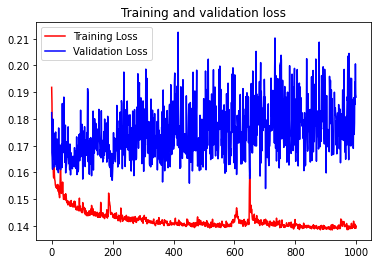

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_upper.history['loss']
val_loss = history_upper.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


# Quantile = 0.05

In [21]:
model_lower = models.Sequential()
model_lower.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_lower.add(layers.Dense(20 ,activation='relu'))
model_lower.add(layers.Dense(1,activation=keras.activations.softsign))
q = 0.05
model_lower.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [22]:
history_lower=model_lower.fit(x_train, y_train, epochs = 1000, batch_size = 4,validation_data=(x_test,y_test),callbacks=[lr_scheduler])

100%|██████████| 101/101 [00:00<00:00, 518.54it/s]


The value of K_z is  4.7064023
Epoch 0 LR = 0.8946379943315865
Epoch 1/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0898 - val_loss: 0.1033


100%|██████████| 101/101 [00:00<00:00, 551.56it/s]

The value of K_z is  4.7064023
Epoch 1 LR = 0.8946379943315865
Epoch 2/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0999

101/101 [==============================] - 0s 2ms/step - loss: 0.0786 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 555.89it/s]

The value of K_z is  4.7064023
Epoch 2 LR = 0.8946379943315865
Epoch 3/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0237

101/101 [==============================] - 0s 2ms/step - loss: 0.0797 - val_loss: 0.0967


100%|██████████| 101/101 [00:00<00:00, 504.31it/s]

The value of K_z is  4.7064023
Epoch 3 LR = 0.8946379943315865
Epoch 4/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0714

101/101 [==============================] - 0s 2ms/step - loss: 0.0744 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 468.35it/s]

The value of K_z is  4.7064023
Epoch 4 LR = 0.8946379943315865
Epoch 5/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0576

101/101 [==============================] - 0s 2ms/step - loss: 0.0690 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 469.44it/s]

The value of K_z is  4.7064023
Epoch 5 LR = 0.8946379943315865
Epoch 6/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0694

101/101 [==============================] - 0s 2ms/step - loss: 0.0684 - val_loss: 0.0906


100%|██████████| 101/101 [00:00<00:00, 550.75it/s]

The value of K_z is  4.7064023
Epoch 6 LR = 0.8946379943315865
Epoch 7/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0334

101/101 [==============================] - 0s 3ms/step - loss: 0.0662 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 515.31it/s]


The value of K_z is  4.7064023
Epoch 7 LR = 0.8946379943315865
Epoch 8/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0737 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 553.07it/s]

The value of K_z is  4.7064023
Epoch 8 LR = 0.8946379943315865
Epoch 9/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1533

101/101 [==============================] - 0s 2ms/step - loss: 0.0692 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 555.39it/s]

The value of K_z is  4.7064023
Epoch 9 LR = 0.8946379943315865
Epoch 10/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0667

101/101 [==============================] - 0s 2ms/step - loss: 0.0651 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 523.41it/s]

The value of K_z is 

 4.7064023
Epoch 10 LR = 0.8946379943315865
Epoch 11/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0665 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 512.26it/s]


The value of K_z is  4.7064023
Epoch 11 LR = 0.8946379943315865
Epoch 12/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0647 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 534.03it/s]

The value of K_z is  4.7064023
Epoch 12 LR = 0.8946379943315865
Epoch 13/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0846


100%|██████████| 101/101 [00:00<00:00, 536.68it/s]

The value of K_z is  4.7064023
Epoch 13 LR = 0.8946379943315865
Epoch 14/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0625 - val_loss: 0.0850


100%|██████████| 101/101 [00:00<00:00, 544.21it/s]

The value of K_z is  4.7064023
Epoch 14 LR = 0.8946379943315865
Epoch 15/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1370

101/101 [==============================] - 0s 2ms/step - loss: 0.0635 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 551.03it/s]

The value of K_z is  4.7064023
Epoch 15 LR = 0.8946379943315865
Epoch 16/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.0619 - val_loss: 0.0890


100%|██████████| 101/101 [00:00<00:00, 540.29it/s]

The value of K_z is  4.7064023
Epoch 16 LR = 0.8946379943315865
Epoch 17/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0264

101/101 [==============================] - 0s 2ms/step - loss: 0.0623 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 544.13it/s]

The value of K_z is  4.7064023
Epoch 17 LR = 0.8946379943315865
Epoch 18/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.0629 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 529.48it/s]

The value of K_z is  4.7064023
Epoch 18 LR = 0.8946379943315865
Epoch 19/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0813


100%|██████████| 101/101 [00:00<00:00, 511.22it/s]

The value of K_z is  4.7064023
Epoch 19 LR = 0.8946379943315865
Epoch 20/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0636

101/101 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0833


100%|██████████| 101/101 [00:00<00:00, 553.73it/s]

The value of K_z is  4.7064023
Epoch 20 LR = 0.8946379943315865
Epoch 21/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1740

101/101 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0896


100%|██████████| 101/101 [00:00<00:00, 548.37it/s]

The value of K_z is  4.7064023
Epoch 21 LR = 0.8946379943315865
Epoch 22/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0984

101/101 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0843


100%|██████████| 101/101 [00:00<00:00, 539.90it/s]

The value of K_z is  4.7064023
Epoch 22 LR = 0.8946379943315865
Epoch 23/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0412

101/101 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 521.37it/s]

The value of K_z is  4.7064023
Epoch 23 LR = 0.8946379943315865


Epoch 24/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0830


100%|██████████| 101/101 [00:00<00:00, 561.58it/s]

The value of K_z is  4.7064023
Epoch 24 LR = 0.8946379943315865
Epoch 25/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1308

101/101 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0823


100%|██████████| 101/101 [00:00<00:00, 511.59it/s]


The value of K_z is  4.7064023
Epoch 25 LR = 0.8946379943315865
Epoch 26/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0844


100%|██████████| 101/101 [00:00<00:00, 538.10it/s]

The value of K_z is  4.7064023
Epoch 26 LR = 0.8946379943315865
Epoch 27/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0232

101/101 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0834


100%|██████████| 101/101 [00:00<00:00, 515.91it/s]


The value of K_z is  4.7064023
Epoch 27 LR = 0.8946379943315865
Epoch 28/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0829


100%|██████████| 101/101 [00:00<00:00, 524.31it/s]

The value of K_z is  4.7064023
Epoch 28 LR = 0.8946379943315865


Epoch 29/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0819


100%|██████████| 101/101 [00:00<00:00, 567.22it/s]

The value of K_z is  4.7064023
Epoch 29 LR = 0.8946379943315865
Epoch 30/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3503

101/101 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0847


100%|██████████| 101/101 [00:00<00:00, 549.64it/s]

The value of K_z is  4.7064023
Epoch 30 LR = 0.8946379943315865
Epoch 31/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0164

101/101 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0814


100%|██████████| 101/101 [00:00<00:00, 566.39it/s]

The value of K_z is  4.7064023
Epoch 31 LR = 0.8946379943315865
Epoch 32/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0640

101/101 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0818


100%|██████████| 101/101 [00:00<00:00, 499.24it/s]

The value of K_z is  4.7064023
Epoch 32 LR = 0.8946379943315865
Epoch 33/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0672

101/101 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 545.61it/s]

The value of K_z is  4.7064023
Epoch 33 LR = 0.8946379943315865
Epoch 34/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0490

101/101 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0820


100%|██████████| 101/101 [00:00<00:00, 529.23it/s]

The value of K_z is  4.7064023
Epoch 34 LR = 0.8946379943315865


Epoch 35/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0807


100%|██████████| 101/101 [00:00<00:00, 539.77it/s]

The value of K_z is  4.7064023
Epoch 35 LR = 0.8946379943315865
Epoch 36/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0286

101/101 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0813


100%|██████████| 101/101 [00:00<00:00, 530.98it/s]

The value of K_z is  4.7064023
Epoch 36 LR = 0.8946379943315865
Epoch 37/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1013

101/101 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0818


100%|██████████| 101/101 [00:00<00:00, 555.71it/s]

The value of K_z is  4.7064023
Epoch 37 LR = 0.8946379943315865
Epoch 38/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1943

101/101 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0819


100%|██████████| 101/101 [00:00<00:00, 588.31it/s]

The value of K_z is  4.7064023
Epoch 38 LR = 0.8946379943315865
Epoch 39/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0141

101/101 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0820


100%|██████████| 101/101 [00:00<00:00, 543.13it/s]

The value of K_z is  4.7064023
Epoch 39 LR = 0.8946379943315865
Epoch 40/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1117

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0818


100%|██████████| 101/101 [00:00<00:00, 522.83it/s]

The value of K_z is  4.7064023
Epoch 40 LR = 0.8946379943315865


Epoch 41/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 556.24it/s]

The value of K_z is  4.7064023
Epoch 41 LR = 0.8946379943315865
Epoch 42/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0147

101/101 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0834


100%|██████████| 101/101 [00:00<00:00, 523.57it/s]


The value of K_z is  4.7064023
Epoch 42 LR = 0.8946379943315865
Epoch 43/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0816


100%|██████████| 101/101 [00:00<00:00, 550.26it/s]

The value of K_z is  4.7064023
Epoch 43 LR = 0.8946379943315865
Epoch 44/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1612

101/101 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0822


100%|██████████| 101/101 [00:00<00:00, 532.86it/s]

The value of K_z is  4.7064023
Epoch 44 LR = 0.8946379943315865


Epoch 45/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0861


100%|██████████| 101/101 [00:00<00:00, 554.79it/s]

The value of K_z is  4.7064023
Epoch 45 LR = 0.8946379943315865
Epoch 46/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0238

101/101 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 509.47it/s]


The value of K_z is  4.7064023
Epoch 46 LR = 0.8946379943315865
Epoch 47/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 524.58it/s]


The value of K_z is  4.7064023
Epoch 47 LR = 0.8946379943315865
Epoch 48/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 536.18it/s]

The value of K_z is  4.7064023
Epoch 48 LR = 0.8946379943315865
Epoch 49/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0237

101/101 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0840


100%|██████████| 101/101 [00:00<00:00, 551.57it/s]

The value of K_z is  4.7064023
Epoch 49 LR = 0.8946379943315865
Epoch 50/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0307

101/101 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 547.49it/s]

The value of K_z is  4.7064023
Epoch 50 LR = 0.8946379943315865
Epoch 51/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0180

101/101 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0831


100%|██████████| 101/101 [00:00<00:00, 522.08it/s]


The value of K_z is  4.7064023
Epoch 51 LR = 0.8946379943315865
Epoch 52/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0841


100%|██████████| 101/101 [00:00<00:00, 562.74it/s]

The value of K_z is  4.7064023
Epoch 52 LR = 0.8946379943315865
Epoch 53/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0154

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0829


100%|██████████| 101/101 [00:00<00:00, 581.63it/s]

The value of K_z is  4.7064023
Epoch 53 LR = 0.8946379943315865
Epoch 54/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0193

101/101 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 528.39it/s]

The value of K_z is  4.7064023
Epoch 54 LR = 0.8946379943315865
Epoch 55/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2495

101/101 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 533.61it/s]

The value of K_z is  4.7064023
Epoch 55 LR = 0.8946379943315865
Epoch 56/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 538.58it/s]

The value of K_z is  4.7064023
Epoch 56 LR = 0.8946379943315865
Epoch 57/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1605

101/101 [==============================] - 0s 3ms/step - loss: 0.0571 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 555.70it/s]

The value of K_z is  4.7064023
Epoch 57 LR = 0.8946379943315865
Epoch 58/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0743

101/101 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0830


100%|██████████| 101/101 [00:00<00:00, 520.19it/s]


The value of K_z is  4.7064023
Epoch 58 LR = 0.8946379943315865
Epoch 59/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 554.01it/s]

The value of K_z is  4.7064023
Epoch 59 LR = 0.8946379943315865
Epoch 60/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2348

101/101 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 534.83it/s]

The value of K_z is  4.7064023
Epoch 60 LR = 0.8946379943315865
Epoch 61/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0828


100%|██████████| 101/101 [00:00<00:00, 530.17it/s]

The value of K_z is  4.7064023
Epoch 61 LR = 0.8946379943315865
Epoch 62/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0146

101/101 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 570.89it/s]

The value of K_z is  4.7064023
Epoch 62 LR = 0.8946379943315865
Epoch 63/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0394

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0855


100%|██████████| 101/101 [00:00<00:00, 555.32it/s]

The value of K_z is  4.7064023
Epoch 63 LR = 0.8946379943315865
Epoch 64/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2274

101/101 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 523.42it/s]

The value of K_z is  4.7064023
Epoch 64 LR = 0.8946379943315865


Epoch 65/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0829


100%|██████████| 101/101 [00:00<00:00, 542.68it/s]

The value of K_z is  4.7064023
Epoch 65 LR = 0.8946379943315865
Epoch 66/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0812

101/101 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0819


100%|██████████| 101/101 [00:00<00:00, 579.53it/s]

The value of K_z is  4.7064023
Epoch 66 LR = 0.8946379943315865
Epoch 67/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 566.29it/s]

The value of K_z is  4.7064023
Epoch 67 LR = 0.8946379943315865
Epoch 68/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0105

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0823


100%|██████████| 101/101 [00:00<00:00, 552.34it/s]

The value of K_z is  4.7064023
Epoch 68 LR = 0.8946379943315865
Epoch 69/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0210

101/101 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0885


100%|██████████| 101/101 [00:00<00:00, 546.56it/s]

The value of K_z is  4.7064023
Epoch 69 LR = 0.8946379943315865
Epoch 70/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0247

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 539.83it/s]

The value of K_z is  4.7064023
Epoch 70 LR = 0.8946379943315865
Epoch 71/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0788

101/101 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0855


100%|██████████| 101/101 [00:00<00:00, 541.94it/s]

The value of K_z is  4.7064023
Epoch 71 LR = 0.8946379943315865
Epoch 72/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0327

101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 508.90it/s]


The value of K_z is  4.7064023
Epoch 72 LR = 0.8946379943315865
Epoch 73/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0840


100%|██████████| 101/101 [00:00<00:00, 535.09it/s]

The value of K_z is  4.7064023
Epoch 73 LR = 0.8946379943315865
Epoch 74/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1378

101/101 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0855


100%|██████████| 101/101 [00:00<00:00, 543.09it/s]

The value of K_z is  4.7064023
Epoch 74 LR = 0.8946379943315865
Epoch 75/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0254

101/101 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0834


100%|██████████| 101/101 [00:00<00:00, 523.59it/s]

The value of K_z is 

 4.7064023
Epoch 75 LR = 0.8946379943315865
Epoch 76/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 513.37it/s]


The value of K_z is  4.7064023
Epoch 76 LR = 0.8946379943315865
Epoch 77/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 518.68it/s]


The value of K_z is  4.7064023
Epoch 77 LR = 0.8946379943315865
Epoch 78/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 557.24it/s]

The value of K_z is  4.7064023
Epoch 78 LR = 0.8946379943315865
Epoch 79/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0239

101/101 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 521.67it/s]

The value of K_z is  4.7064023
Epoch 79 LR = 0.8946379943315865


Epoch 80/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0835


100%|██████████| 101/101 [00:00<00:00, 531.64it/s]

The value of K_z is  4.7064023
Epoch 80 LR = 0.8946379943315865
Epoch 81/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 473.28it/s]

The value of K_z is  4.7064023
Epoch 81 LR = 0.8946379943315865
Epoch 82/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0642

101/101 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 525.26it/s]

The value of K_z is  4.7064023
Epoch 82 LR = 0.8946379943315865


Epoch 83/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 515.78it/s]


The value of K_z is  4.7064023
Epoch 83 LR = 0.8946379943315865
Epoch 84/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0841


100%|██████████| 101/101 [00:00<00:00, 517.38it/s]


The value of K_z is  4.7064023
Epoch 84 LR = 0.8946379943315865
Epoch 85/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 524.18it/s]

The value of K_z is  4.7064023
Epoch 85 LR = 0.8946379943315865


Epoch 86/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 508.41it/s]


The value of K_z is  4.7064023
Epoch 86 LR = 0.8946379943315865
Epoch 87/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0822


100%|██████████| 101/101 [00:00<00:00, 547.44it/s]

The value of K_z is  4.7064023
Epoch 87 LR = 0.8946379943315865
Epoch 88/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0595

101/101 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 535.60it/s]

The value of K_z is  4.7064023
Epoch 88 LR = 0.8946379943315865
Epoch 89/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0996

101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 485.73it/s]

The value of K_z is  4.7064023
Epoch 89 LR = 0.8946379943315865
Epoch 90/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0528

101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 531.93it/s]

The value of K_z is  4.7064023
Epoch 90 LR = 0.8946379943315865
Epoch 91/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0481

101/101 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 533.04it/s]

The value of K_z is  4.7064023
Epoch 91 LR = 0.8946379943315865
Epoch 92/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 553.70it/s]

The value of K_z is  4.7064023
Epoch 92 LR = 0.8946379943315865
Epoch 93/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0205

101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 525.31it/s]

The value of K_z is  4.7064023
Epoch 93 LR = 0.8946379943315865


Epoch 94/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0892


100%|██████████| 101/101 [00:00<00:00, 555.73it/s]

The value of K_z is  4.7064023
Epoch 94 LR = 0.8946379943315865
Epoch 95/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 535.09it/s]

The value of K_z is  4.7064023
Epoch 95 LR = 0.8946379943315865
Epoch 96/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1088

101/101 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 505.00it/s]

The value of K_z is  4.7064023
Epoch 96 LR = 0.8946379943315865
Epoch 97/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0350

101/101 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0887


100%|██████████| 101/101 [00:00<00:00, 558.03it/s]

The value of K_z is  4.7064023
Epoch 97 LR = 0.8946379943315865
Epoch 98/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0166

101/101 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 530.20it/s]

The value of K_z is  4.7064023
Epoch 98 LR = 0.8946379943315865
Epoch 99/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0657

101/101 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 547.22it/s]

The value of K_z is  4.7064023
Epoch 99 LR = 0.8946379943315865
Epoch 100/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0120

101/101 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 531.17it/s]

The value of K_z is  4.7064023
Epoch 100 LR = 0.8946379943315865
Epoch 101/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0231

101/101 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0861


100%|██████████| 101/101 [00:00<00:00, 543.10it/s]

The value of K_z is  4.7064023
Epoch 101 LR = 0.8946379943315865
Epoch 102/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0289

101/101 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0814


100%|██████████| 101/101 [00:00<00:00, 535.79it/s]

The value of K_z is  4.7064023
Epoch 102 LR = 0.8946379943315865
Epoch 103/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0235

101/101 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 545.11it/s]

The value of K_z is  4.7064023
Epoch 103 LR = 0.8946379943315865
Epoch 104/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2240

101/101 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 547.13it/s]

The value of K_z is  4.7064023
Epoch 104 LR = 0.8946379943315865
Epoch 105/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1259

101/101 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 520.29it/s]

The value of K_z is  4.7064023
Epoch 105 LR = 0.8946379943315865


Epoch 106/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 549.48it/s]

The value of K_z is  4.7064023
Epoch 106 LR = 0.8946379943315865
Epoch 107/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0206

101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 564.22it/s]

The value of K_z is  4.7064023
Epoch 107 LR = 0.8946379943315865
Epoch 108/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0304

101/101 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0848


100%|██████████| 101/101 [00:00<00:00, 572.64it/s]

The value of K_z is  4.7064023
Epoch 108 LR = 0.8946379943315865
Epoch 109/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2294

101/101 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0836


100%|██████████| 101/101 [00:00<00:00, 560.90it/s]

The value of K_z is  4.7064023
Epoch 109 LR = 0.8946379943315865
Epoch 110/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0281

101/101 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0829


100%|██████████| 101/101 [00:00<00:00, 543.40it/s]

The value of K_z is  4.7064023
Epoch 110 LR = 0.8946379943315865
Epoch 111/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0044

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0831


100%|██████████| 101/101 [00:00<00:00, 546.32it/s]

The value of K_z is  4.7064023
Epoch 111 LR = 0.8946379943315865
Epoch 112/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0591

101/101 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0847


100%|██████████| 101/101 [00:00<00:00, 515.27it/s]


The value of K_z is  4.7064023
Epoch 112 LR = 0.8946379943315865
Epoch 113/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 560.53it/s]

The value of K_z is  4.7064023
Epoch 113 LR = 0.8946379943315865
Epoch 114/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1171

101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0919


100%|██████████| 101/101 [00:00<00:00, 558.41it/s]

The value of K_z is  4.7064023
Epoch 114 LR = 0.8946379943315865
Epoch 115/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0192

101/101 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 537.74it/s]

The value of K_z is  4.7064023
Epoch 115 LR = 0.8946379943315865
Epoch 116/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0107

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0897


100%|██████████| 101/101 [00:00<00:00, 544.98it/s]

The value of K_z is  4.7064023
Epoch 116 LR = 0.8946379943315865
Epoch 117/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0656

101/101 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0950


100%|██████████| 101/101 [00:00<00:00, 490.48it/s]

The value of K_z is  4.7064023
Epoch 117 LR = 0.8946379943315865
Epoch 118/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0503

101/101 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0820


100%|██████████| 101/101 [00:00<00:00, 560.08it/s]

The value of K_z is  4.7064023
Epoch 118 LR = 0.8946379943315865
Epoch 119/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0171

101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0906


100%|██████████| 101/101 [00:00<00:00, 570.13it/s]

The value of K_z is  4.7064023
Epoch 119 LR = 0.8946379943315865
Epoch 120/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0148

101/101 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0916


100%|██████████| 101/101 [00:00<00:00, 546.83it/s]

The value of K_z is  4.7064023
Epoch 120 LR = 0.8946379943315865
Epoch 121/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0350

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 539.33it/s]

The value of K_z is  4.7064023
Epoch 121 LR = 0.8946379943315865
Epoch 122/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0680

101/101 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0885


100%|██████████| 101/101 [00:00<00:00, 535.59it/s]

The value of K_z is  4.7064023
Epoch 122 LR = 0.8946379943315865
Epoch 123/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0313

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0941


100%|██████████| 101/101 [00:00<00:00, 537.61it/s]

The value of K_z is  4.7064023
Epoch 123 LR = 0.8946379943315865
Epoch 124/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 534.28it/s]

The value of K_z is  4.7064023
Epoch 124 LR = 0.8946379943315865


Epoch 125/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 538.22it/s]

The value of K_z is  4.7064023
Epoch 125 LR = 0.8946379943315865
Epoch 126/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0582

101/101 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0829


100%|██████████| 101/101 [00:00<00:00, 551.62it/s]

The value of K_z is  4.7064023
Epoch 126 LR = 0.8946379943315865
Epoch 127/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0626

101/101 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0941


100%|██████████| 101/101 [00:00<00:00, 538.98it/s]

The value of K_z is  4.7064023
Epoch 127 LR = 0.8946379943315865
Epoch 128/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0253

101/101 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 552.07it/s]

The value of K_z is  4.7064023
Epoch 128 LR = 0.8946379943315865
Epoch 129/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0216

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 524.10it/s]

The value of K_z is  4.7064023
Epoch 129 LR = 0.8946379943315865
Epoch 130/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 546.93it/s]

The value of K_z is  4.7064023
Epoch 130 LR = 0.8946379943315865
Epoch 131/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 504.22it/s]

The value of K_z is  4.7064023
Epoch 131 LR = 0.8946379943315865
Epoch 132/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0498

101/101 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 531.97it/s]

The value of K_z is  4.7064023
Epoch 132 LR = 0.8946379943315865


Epoch 133/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 548.54it/s]

The value of K_z is  4.7064023
Epoch 133 LR = 0.8946379943315865
Epoch 134/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0164

101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0945


100%|██████████| 101/101 [00:00<00:00, 548.10it/s]

The value of K_z is  4.7064023
Epoch 134 LR = 0.8946379943315865
Epoch 135/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2234

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 544.91it/s]

The value of K_z is  4.7064023
Epoch 135 LR = 0.8946379943315865
Epoch 136/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0230

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0957


100%|██████████| 101/101 [00:00<00:00, 553.64it/s]

The value of K_z is  4.7064023
Epoch 136 LR = 0.8946379943315865
Epoch 137/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0616

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 547.21it/s]

The value of K_z is  4.7064023
Epoch 137 LR = 0.8946379943315865
Epoch 138/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0046

101/101 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 486.97it/s]

The value of K_z is  4.7064023
Epoch 138 LR = 0.8946379943315865
Epoch 139/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0557

101/101 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0964


100%|██████████| 101/101 [00:00<00:00, 555.62it/s]

The value of K_z is  4.7064023
Epoch 139 LR = 0.8946379943315865
Epoch 140/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0168

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 543.63it/s]

The value of K_z is  4.7064023
Epoch 140 LR = 0.8946379943315865
Epoch 141/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0188

101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 548.26it/s]

The value of K_z is  4.7064023
Epoch 141 LR = 0.8946379943315865
Epoch 142/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0309

101/101 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 539.77it/s]

The value of K_z is  4.7064023
Epoch 142 LR = 0.8946379943315865
Epoch 143/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0263

101/101 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 525.53it/s]

The value of K_z is  4.7064023
Epoch 143 LR = 0.8946379943315865


Epoch 144/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0957


100%|██████████| 101/101 [00:00<00:00, 541.55it/s]

The value of K_z is  4.7064023
Epoch 144 LR = 0.8946379943315865
Epoch 145/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0227

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 507.74it/s]


The value of K_z is  4.7064023
Epoch 145 LR = 0.8946379943315865
Epoch 146/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 532.50it/s]

The value of K_z is  4.7064023
Epoch 146 LR = 0.8946379943315865
Epoch 147/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 549.20it/s]

The value of K_z is  4.7064023
Epoch 147 LR = 0.8946379943315865
Epoch 148/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0065

101/101 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0941


100%|██████████| 101/101 [00:00<00:00, 532.56it/s]

The value of K_z is  4.7064023
Epoch 148 LR = 0.8946379943315865


Epoch 149/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 546.36it/s]

The value of K_z is  4.7064023
Epoch 149 LR = 0.8946379943315865
Epoch 150/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0372

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 517.84it/s]


The value of K_z is  4.7064023
Epoch 150 LR = 0.8946379943315865
Epoch 151/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 560.28it/s]

The value of K_z is  4.7064023
Epoch 151 LR = 0.8946379943315865
Epoch 152/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0586

101/101 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0971


100%|██████████| 101/101 [00:00<00:00, 511.95it/s]


The value of K_z is  4.7064023
Epoch 152 LR = 0.8946379943315865
Epoch 153/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.0984


100%|██████████| 101/101 [00:00<00:00, 539.34it/s]

The value of K_z is  4.7064023
Epoch 153 LR = 0.8946379943315865
Epoch 154/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0535

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 514.17it/s]


The value of K_z is  4.7064023
Epoch 154 LR = 0.8946379943315865
Epoch 155/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0922


100%|██████████| 101/101 [00:00<00:00, 530.70it/s]

The value of K_z is  4.7064023
Epoch 155 LR = 0.8946379943315865


Epoch 156/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0951


100%|██████████| 101/101 [00:00<00:00, 549.46it/s]

The value of K_z is  4.7064023
Epoch 156 LR = 0.8946379943315865
Epoch 157/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0305

101/101 [==============================] - 0s 3ms/step - loss: 0.0548 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 557.96it/s]

The value of K_z is  4.7064023
Epoch 157 LR = 0.8946379943315865
Epoch 158/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0358

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0919


100%|██████████| 101/101 [00:00<00:00, 536.90it/s]

The value of K_z is  4.7064023
Epoch 158 LR = 0.8946379943315865
Epoch 159/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0564

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 517.02it/s]


The value of K_z is  4.7064023
Epoch 159 LR = 0.8946379943315865
Epoch 160/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 569.17it/s]

The value of K_z is  4.7064023
Epoch 160 LR = 0.8946379943315865
Epoch 161/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0234

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 520.49it/s]


The value of K_z is  4.7064023
Epoch 161 LR = 0.8946379943315865
Epoch 162/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 552.95it/s]

The value of K_z is  4.7064023
Epoch 162 LR = 0.8946379943315865
Epoch 163/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0102

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 527.94it/s]

The value of K_z is  4.7064023
Epoch 163 LR = 0.8946379943315865
Epoch 164/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0966


100%|██████████| 101/101 [00:00<00:00, 471.36it/s]

The value of K_z is  4.7064023
Epoch 164 LR = 0.8946379943315865
Epoch 165/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0511

101/101 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0984


100%|██████████| 101/101 [00:00<00:00, 574.24it/s]

The value of K_z is  4.7064023
Epoch 165 LR = 0.8946379943315865
Epoch 166/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0332

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0924


100%|██████████| 101/101 [00:00<00:00, 547.31it/s]

The value of K_z is  4.7064023
Epoch 166 LR = 0.8946379943315865
Epoch 167/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0929


100%|██████████| 101/101 [00:00<00:00, 530.35it/s]

The value of K_z is  4.7064023
Epoch 167 LR = 0.8946379943315865


Epoch 168/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 577.43it/s]

The value of K_z is  4.7064023
Epoch 168 LR = 0.8946379943315865
Epoch 169/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0314

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0984


100%|██████████| 101/101 [00:00<00:00, 536.29it/s]

The value of K_z is  4.7064023
Epoch 169 LR = 0.8946379943315865
Epoch 170/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0356

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 547.06it/s]

The value of K_z is  4.7064023
Epoch 170 LR = 0.8946379943315865
Epoch 171/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0303

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0929


100%|██████████| 101/101 [00:00<00:00, 504.47it/s]

The value of K_z is  4.7064023
Epoch 171 LR = 0.8946379943315865
Epoch 172/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0413

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 550.35it/s]

The value of K_z is  4.7064023
Epoch 172 LR = 0.8946379943315865
Epoch 173/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0851

101/101 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 529.47it/s]

The value of K_z is  4.7064023
Epoch 173 LR = 0.8946379943315865
Epoch 174/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0192

101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0957


100%|██████████| 101/101 [00:00<00:00, 509.93it/s]


The value of K_z is  4.7064023
Epoch 174 LR = 0.8946379943315865
Epoch 175/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 583.65it/s]

The value of K_z is  4.7064023
Epoch 175 LR = 0.8946379943315865
Epoch 176/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0072

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 543.91it/s]

The value of K_z is  4.7064023
Epoch 176 LR = 0.8946379943315865
Epoch 177/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1254

101/101 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 553.33it/s]

The value of K_z is  4.7064023
Epoch 177 LR = 0.8946379943315865
Epoch 178/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0172

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0904


100%|██████████| 101/101 [00:00<00:00, 503.03it/s]

The value of K_z is  4.7064023
Epoch 178 LR = 0.8946379943315865
Epoch 179/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0525

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 533.77it/s]

The value of K_z is  4.7064023
Epoch 179 LR = 0.8946379943315865
Epoch 180/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0264

101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 531.13it/s]

The value of K_z is  4.7064023
Epoch 180 LR = 0.8946379943315865
Epoch 181/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0910


100%|██████████| 101/101 [00:00<00:00, 554.84it/s]

The value of K_z is  4.7064023
Epoch 181 LR = 0.8946379943315865
Epoch 182/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0730

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 545.72it/s]

The value of K_z is  4.7064023
Epoch 182 LR = 0.8946379943315865
Epoch 183/1000
  1/101 [..............................] - ETA: 0s - loss: 0.4555

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 553.35it/s]

The value of K_z is  4.7064023
Epoch 183 LR = 0.8946379943315865
Epoch 184/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0515

101/101 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 551.90it/s]

The value of K_z is  4.7064023
Epoch 184 LR = 0.8946379943315865
Epoch 185/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0681

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0963


100%|██████████| 101/101 [00:00<00:00, 521.60it/s]

The value of K_z is  4.7064023
Epoch 185 LR = 0.8946379943315865


Epoch 186/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 569.21it/s]

The value of K_z is  4.7064023
Epoch 186 LR = 0.8946379943315865
Epoch 187/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0853

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 559.96it/s]

The value of K_z is  4.7064023
Epoch 187 LR = 0.8946379943315865
Epoch 188/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0113

101/101 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 577.15it/s]

The value of K_z is  4.7064023
Epoch 188 LR = 0.8946379943315865
Epoch 189/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1028

101/101 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0988


100%|██████████| 101/101 [00:00<00:00, 549.74it/s]

The value of K_z is  4.7064023
Epoch 189 LR = 0.8946379943315865
Epoch 190/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0998

101/101 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 512.64it/s]


The value of K_z is  4.7064023
Epoch 190 LR = 0.8946379943315865
Epoch 191/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 535.67it/s]

The value of K_z is  4.7064023
Epoch 191 LR = 0.8946379943315865
Epoch 192/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0231

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 525.46it/s]


The value of K_z is  4.7064023
Epoch 192 LR = 0.8946379943315865
Epoch 193/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0975


100%|██████████| 101/101 [00:00<00:00, 524.19it/s]

The value of K_z is  4.7064023
Epoch 193 LR = 0.8946379943315865


Epoch 194/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 539.92it/s]

The value of K_z is  4.7064023
Epoch 194 LR = 0.8946379943315865
Epoch 195/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0258

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0983


100%|██████████| 101/101 [00:00<00:00, 550.35it/s]

The value of K_z is  4.7064023
Epoch 195 LR = 0.8946379943315865
Epoch 196/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0838

101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0929


100%|██████████| 101/101 [00:00<00:00, 516.84it/s]


The value of K_z is  4.7064023
Epoch 196 LR = 0.8946379943315865
Epoch 197/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 558.88it/s]

The value of K_z is  4.7064023
Epoch 197 LR = 0.8946379943315865
Epoch 198/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1200

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 550.95it/s]

The value of K_z is  4.7064023
Epoch 198 LR = 0.8946379943315865
Epoch 199/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0839

101/101 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.0937


100%|██████████| 101/101 [00:00<00:00, 519.14it/s]


The value of K_z is  4.7064023
Epoch 199 LR = 0.8946379943315865
Epoch 200/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0890


100%|██████████| 101/101 [00:00<00:00, 549.37it/s]

The value of K_z is  4.7064023
Epoch 200 LR = 0.8946379943315865
Epoch 201/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0892

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0998


100%|██████████| 101/101 [00:00<00:00, 548.99it/s]

The value of K_z is  4.7064023
Epoch 201 LR = 0.8946379943315865
Epoch 202/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2407

101/101 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.0935


100%|██████████| 101/101 [00:00<00:00, 548.34it/s]

The value of K_z is  4.7064023
Epoch 202 LR = 0.8946379943315865
Epoch 203/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0939

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0929


100%|██████████| 101/101 [00:00<00:00, 558.75it/s]

The value of K_z is  4.7064023
Epoch 203 LR = 0.8946379943315865
Epoch 204/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1022

101/101 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 519.11it/s]


The value of K_z is  4.7064023
Epoch 204 LR = 0.8946379943315865
Epoch 205/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0948


100%|██████████| 101/101 [00:00<00:00, 538.44it/s]

The value of K_z is  4.7064023
Epoch 205 LR = 0.8946379943315865
Epoch 206/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0253

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 520.07it/s]


The value of K_z is  4.7064023
Epoch 206 LR = 0.8946379943315865
Epoch 207/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0953


100%|██████████| 101/101 [00:00<00:00, 553.17it/s]

The value of K_z is  4.7064023
Epoch 207 LR = 0.8946379943315865
Epoch 208/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0178

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0953


100%|██████████| 101/101 [00:00<00:00, 521.31it/s]


The value of K_z is  4.7064023
Epoch 208 LR = 0.8946379943315865
Epoch 209/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.1004


100%|██████████| 101/101 [00:00<00:00, 545.10it/s]

The value of K_z is  4.7064023
Epoch 209 LR = 0.8946379943315865
Epoch 210/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3053

101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0974


100%|██████████| 101/101 [00:00<00:00, 525.45it/s]

The value of K_z is  4.7064023
Epoch 210 LR = 0.8946379943315865


Epoch 211/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0916


100%|██████████| 101/101 [00:00<00:00, 494.28it/s]

The value of K_z is  4.7064023
Epoch 211 LR = 0.8946379943315865
Epoch 212/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0340

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 558.53it/s]

The value of K_z is  4.7064023
Epoch 212 LR = 0.8946379943315865
Epoch 213/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0933


100%|██████████| 101/101 [00:00<00:00, 510.14it/s]


The value of K_z is  4.7064023
Epoch 213 LR = 0.8946379943315865
Epoch 214/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0526 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 543.41it/s]

The value of K_z is  4.7064023
Epoch 214 LR = 0.8946379943315865
Epoch 215/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0323

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 533.06it/s]

The value of K_z is  4.7064023
Epoch 215 LR = 0.8946379943315865
Epoch 216/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0197

101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 541.21it/s]

The value of K_z is  4.7064023
Epoch 216 LR = 0.8946379943315865
Epoch 217/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0672

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 533.96it/s]

The value of K_z is  4.7064023
Epoch 217 LR = 0.8946379943315865
Epoch 218/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0663

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0958


100%|██████████| 101/101 [00:00<00:00, 527.59it/s]

The value of K_z is  4.7064023
Epoch 218 LR = 0.8946379943315865


Epoch 219/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0972


100%|██████████| 101/101 [00:00<00:00, 545.07it/s]

The value of K_z is  4.7064023
Epoch 219 LR = 0.8946379943315865
Epoch 220/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0936


100%|██████████| 101/101 [00:00<00:00, 519.71it/s]

The value of K_z is  4.7064023
Epoch 220 LR = 0.8946379943315865


Epoch 221/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0985


100%|██████████| 101/101 [00:00<00:00, 560.21it/s]

The value of K_z is  4.7064023
Epoch 221 LR = 0.8946379943315865
Epoch 222/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1657

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0939


100%|██████████| 101/101 [00:00<00:00, 533.40it/s]

The value of K_z is  4.7064023
Epoch 222 LR = 0.8946379943315865


Epoch 223/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 554.31it/s]

The value of K_z is  4.7064023
Epoch 223 LR = 0.8946379943315865
Epoch 224/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0245

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 555.91it/s]

The value of K_z is  4.7064023
Epoch 224 LR = 0.8946379943315865
Epoch 225/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0113

101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0967


100%|██████████| 101/101 [00:00<00:00, 571.51it/s]

The value of K_z is  4.7064023
Epoch 225 LR = 0.8946379943315865
Epoch 226/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1228

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 544.14it/s]

The value of K_z is  4.7064023
Epoch 226 LR = 0.8946379943315865
Epoch 227/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0451

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 545.08it/s]

The value of K_z is  4.7064023
Epoch 227 LR = 0.8946379943315865
Epoch 228/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2007

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0984


100%|██████████| 101/101 [00:00<00:00, 555.25it/s]

The value of K_z is  4.7064023
Epoch 228 LR = 0.8946379943315865
Epoch 229/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0738

101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 539.93it/s]

The value of K_z is  4.7064023
Epoch 229 LR = 0.8946379943315865
Epoch 230/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0122

101/101 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 508.46it/s]


The value of K_z is  4.7064023
Epoch 230 LR = 0.8946379943315865
Epoch 231/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0939


100%|██████████| 101/101 [00:00<00:00, 530.19it/s]

The value of K_z is  4.7064023
Epoch 231 LR = 0.8946379943315865
Epoch 232/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 540.00it/s]

The value of K_z is  4.7064023
Epoch 232 LR = 0.8946379943315865
Epoch 233/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0997


100%|██████████| 101/101 [00:00<00:00, 558.01it/s]

The value of K_z is  4.7064023
Epoch 233 LR = 0.8946379943315865
Epoch 234/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0286

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0898


100%|██████████| 101/101 [00:00<00:00, 559.78it/s]

The value of K_z is  4.7064023
Epoch 234 LR = 0.8946379943315865
Epoch 235/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 568.71it/s]

The value of K_z is  4.7064023
Epoch 235 LR = 0.8946379943315865
Epoch 236/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0118

101/101 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 531.90it/s]

The value of K_z is  4.7064023
Epoch 236 LR = 0.8946379943315865
Epoch 237/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0246

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 522.24it/s]

The value of K_z is  4.7064023
Epoch 237 LR = 0.8946379943315865


Epoch 238/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0968


100%|██████████| 101/101 [00:00<00:00, 560.78it/s]

The value of K_z is  4.7064023
Epoch 238 LR = 0.8946379943315865
Epoch 239/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0150

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 558.67it/s]

The value of K_z is  4.7064023
Epoch 239 LR = 0.8946379943315865
Epoch 240/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 560.30it/s]

The value of K_z is  4.7064023
Epoch 240 LR = 0.8946379943315865
Epoch 241/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 545.21it/s]

The value of K_z is  4.7064023
Epoch 241 LR = 0.8946379943315865
Epoch 242/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0692

101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0975


100%|██████████| 101/101 [00:00<00:00, 523.82it/s]


The value of K_z is  4.7064023
Epoch 242 LR = 0.8946379943315865
Epoch 243/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0954


100%|██████████| 101/101 [00:00<00:00, 529.97it/s]

The value of K_z is  4.7064023
Epoch 243 LR = 0.8946379943315865


Epoch 244/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0895


100%|██████████| 101/101 [00:00<00:00, 520.59it/s]


The value of K_z is  4.7064023
Epoch 244 LR = 0.8946379943315865
Epoch 245/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0903


100%|██████████| 101/101 [00:00<00:00, 549.49it/s]

The value of K_z is  4.7064023
Epoch 245 LR = 0.8946379943315865
Epoch 246/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0072

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0913


100%|██████████| 101/101 [00:00<00:00, 550.43it/s]

The value of K_z is  4.7064023
Epoch 246 LR = 0.8946379943315865
Epoch 247/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 550.79it/s]

The value of K_z is  4.7064023
Epoch 247 LR = 0.8946379943315865
Epoch 248/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1206

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 531.28it/s]

The value of K_z is  4.7064023
Epoch 248 LR = 0.8946379943315865
Epoch 249/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 566.32it/s]

The value of K_z is  4.7064023
Epoch 249 LR = 0.8946379943315865
Epoch 250/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1416

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 554.23it/s]

The value of K_z is  4.7064023
Epoch 250 LR = 0.8946379943315865
Epoch 251/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0516

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 526.00it/s]

The value of K_z is  4.7064023
Epoch 251 LR = 0.8946379943315865


Epoch 252/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0961


100%|██████████| 101/101 [00:00<00:00, 557.96it/s]

The value of K_z is  4.7064023
Epoch 252 LR = 0.8946379943315865
Epoch 253/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0078

101/101 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0954


100%|██████████| 101/101 [00:00<00:00, 515.62it/s]


The value of K_z is  4.7064023
Epoch 253 LR = 0.8946379943315865
Epoch 254/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 529.05it/s]

The value of K_z is  4.7064023
Epoch 254 LR = 0.8946379943315865
Epoch 255/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0973


100%|██████████| 101/101 [00:00<00:00, 503.24it/s]

The value of K_z is  4.7064023
Epoch 255 LR = 0.8946379943315865
Epoch 256/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.0454

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 533.08it/s]

The value of K_z is  4.7064023
Epoch 256 LR = 0.8946379943315865
Epoch 257/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0341

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0964


100%|██████████| 101/101 [00:00<00:00, 550.22it/s]

The value of K_z is  4.7064023
Epoch 257 LR = 0.8946379943315865
Epoch 258/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0123

101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 558.03it/s]

The value of K_z is  4.7064023
Epoch 258 LR = 0.8946379943315865
Epoch 259/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0354

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 540.43it/s]

The value of K_z is  4.7064023
Epoch 259 LR = 0.8946379943315865
Epoch 260/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0959

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 534.17it/s]

The value of K_z is  4.7064023
Epoch 260 LR = 0.8946379943315865
Epoch 261/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0549

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0981


100%|██████████| 101/101 [00:00<00:00, 555.71it/s]

The value of K_z is  4.7064023
Epoch 261 LR = 0.8946379943315865
Epoch 262/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0366

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0957


100%|██████████| 101/101 [00:00<00:00, 517.84it/s]

The value of K_z is  4.7064023
Epoch 262 LR = 0.8946379943315865
Epoch 263/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0222

101/101 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0933


100%|██████████| 101/101 [00:00<00:00, 520.62it/s]

The value of K_z is  4.7064023
Epoch 263 LR = 0.8946379943315865


Epoch 264/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0924


100%|██████████| 101/101 [00:00<00:00, 535.86it/s]

The value of K_z is  4.7064023
Epoch 264 LR = 0.8946379943315865
Epoch 265/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0105

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 528.13it/s]

The value of K_z is  4.7064023
Epoch 265 LR = 0.8946379943315865


Epoch 266/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0972


100%|██████████| 101/101 [00:00<00:00, 525.81it/s]

The value of K_z is  4.7064023
Epoch 266 LR = 0.8946379943315865


Epoch 267/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 543.91it/s]

The value of K_z is  4.7064023
Epoch 267 LR = 0.8946379943315865
Epoch 268/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0152

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0928


100%|██████████| 101/101 [00:00<00:00, 533.32it/s]

The value of K_z is  4.7064023
Epoch 268 LR = 0.8946379943315865
Epoch 269/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1054

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 532.44it/s]

The value of K_z is  4.7064023
Epoch 269 LR = 0.8946379943315865
Epoch 270/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0288

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 525.81it/s]

The value of K_z is  4.7064023
Epoch 270 LR = 0.8946379943315865


Epoch 271/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0908


100%|██████████| 101/101 [00:00<00:00, 540.78it/s]

The value of K_z is  4.7064023
Epoch 271 LR = 0.8946379943315865
Epoch 272/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0485

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0931


100%|██████████| 101/101 [00:00<00:00, 513.65it/s]


The value of K_z is  4.7064023
Epoch 272 LR = 0.8946379943315865
Epoch 273/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 567.32it/s]

The value of K_z is  4.7064023
Epoch 273 LR = 0.8946379943315865
Epoch 274/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0421

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 588.03it/s]

The value of K_z is  4.7064023
Epoch 274 LR = 0.8946379943315865
Epoch 275/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0333

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 554.44it/s]

The value of K_z is  4.7064023
Epoch 275 LR = 0.8946379943315865
Epoch 276/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0533

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0931


100%|██████████| 101/101 [00:00<00:00, 542.73it/s]

The value of K_z is  4.7064023
Epoch 276 LR = 0.8946379943315865
Epoch 277/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0289

101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0951


100%|██████████| 101/101 [00:00<00:00, 526.11it/s]

The value of K_z is  4.7064023
Epoch 277 LR = 0.8946379943315865
Epoch 278/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0192

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 533.19it/s]

The value of K_z is  4.7064023
Epoch 278 LR = 0.8946379943315865
Epoch 279/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1383

101/101 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 561.47it/s]

The value of K_z is  4.7064023
Epoch 279 LR = 0.8946379943315865
Epoch 280/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0688

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 515.19it/s]


The value of K_z is  4.7064023
Epoch 280 LR = 0.8946379943315865
Epoch 281/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 484.66it/s]

The value of K_z is  4.7064023
Epoch 281 LR = 0.8946379943315865
Epoch 282/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0349

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 527.55it/s]

The value of K_z is  4.7064023
Epoch 282 LR = 0.8946379943315865
Epoch 283/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0494

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0916


100%|██████████| 101/101 [00:00<00:00, 475.46it/s]

The value of K_z is  4.7064023
Epoch 283 LR = 0.8946379943315865
Epoch 284/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0526

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 528.56it/s]

The value of K_z is  4.7064023
Epoch 284 LR = 0.8946379943315865
Epoch 285/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0912


100%|██████████| 101/101 [00:00<00:00, 558.23it/s]

The value of K_z is  4.7064023
Epoch 285 LR = 0.8946379943315865
Epoch 286/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 560.09it/s]

The value of K_z is  4.7064023
Epoch 286 LR = 0.8946379943315865
Epoch 287/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0411

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0913


100%|██████████| 101/101 [00:00<00:00, 548.09it/s]

The value of K_z is  4.7064023
Epoch 287 LR = 0.8946379943315865
Epoch 288/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0219

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 534.35it/s]

The value of K_z is  4.7064023
Epoch 288 LR = 0.8946379943315865
Epoch 289/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0788

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0964


100%|██████████| 101/101 [00:00<00:00, 544.19it/s]

The value of K_z is  4.7064023
Epoch 289 LR = 0.8946379943315865
Epoch 290/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0773

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0957


100%|██████████| 101/101 [00:00<00:00, 511.07it/s]


The value of K_z is  4.7064023
Epoch 290 LR = 0.8946379943315865
Epoch 291/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 535.20it/s]

The value of K_z is  4.7064023
Epoch 291 LR = 0.8946379943315865
Epoch 292/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 574.16it/s]

The value of K_z is  4.7064023
Epoch 292 LR = 0.8946379943315865
Epoch 293/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0295

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 573.22it/s]

The value of K_z is  4.7064023
Epoch 293 LR = 0.8946379943315865
Epoch 294/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0454

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 532.64it/s]

The value of K_z is  4.7064023
Epoch 294 LR = 0.8946379943315865
Epoch 295/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0379

101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0964


100%|██████████| 101/101 [00:00<00:00, 533.47it/s]

The value of K_z is  4.7064023
Epoch 295 LR = 0.8946379943315865
Epoch 296/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1858

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0915


100%|██████████| 101/101 [00:00<00:00, 553.16it/s]

The value of K_z is  4.7064023
Epoch 296 LR = 0.8946379943315865
Epoch 297/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0356

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0904


100%|██████████| 101/101 [00:00<00:00, 522.05it/s]


The value of K_z is  4.7064023
Epoch 297 LR = 0.8946379943315865
Epoch 298/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0931


100%|██████████| 101/101 [00:00<00:00, 536.40it/s]

The value of K_z is  4.7064023
Epoch 298 LR = 0.8946379943315865
Epoch 299/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 537.68it/s]

The value of K_z is  4.7064023
Epoch 299 LR = 0.8946379943315865
Epoch 300/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0170

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 531.49it/s]

The value of K_z is  4.7064023
Epoch 300 LR = 0.8946379943315865
Epoch 301/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 508.10it/s]

The value of K_z is  4.7064023
Epoch 301 LR = 0.8946379943315865
Epoch 302/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0475

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 512.63it/s]


The value of K_z is  4.7064023
Epoch 302 LR = 0.8946379943315865
Epoch 303/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 525.06it/s]

The value of K_z is  4.7064023
Epoch 303 LR = 0.8946379943315865


Epoch 304/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0988


100%|██████████| 101/101 [00:00<00:00, 529.15it/s]

The value of K_z is  4.7064023
Epoch 304 LR = 0.8946379943315865


Epoch 305/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 512.01it/s]


The value of K_z is  4.7064023
Epoch 305 LR = 0.8946379943315865
Epoch 306/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0904


100%|██████████| 101/101 [00:00<00:00, 569.21it/s]

The value of K_z is  4.7064023
Epoch 306 LR = 0.8946379943315865
Epoch 307/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0057

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0895


100%|██████████| 101/101 [00:00<00:00, 560.51it/s]

The value of K_z is  4.7064023
Epoch 307 LR = 0.8946379943315865
Epoch 308/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0692

101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 576.74it/s]

The value of K_z is  4.7064023
Epoch 308 LR = 0.8946379943315865
Epoch 309/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0379

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0909


100%|██████████| 101/101 [00:00<00:00, 533.15it/s]

The value of K_z is  4.7064023
Epoch 309 LR = 0.8946379943315865
Epoch 310/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 505.91it/s]

The value of K_z is  4.7064023
Epoch 310 LR = 0.8946379943315865
Epoch 311/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0609

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0909


100%|██████████| 101/101 [00:00<00:00, 560.60it/s]

The value of K_z is  4.7064023
Epoch 311 LR = 0.8946379943315865
Epoch 312/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1243

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0929


100%|██████████| 101/101 [00:00<00:00, 550.53it/s]

The value of K_z is  4.7064023
Epoch 312 LR = 0.8946379943315865
Epoch 313/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0816

101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 547.75it/s]

The value of K_z is  4.7064023
Epoch 313 LR = 0.8946379943315865
Epoch 314/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0619

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0937


100%|██████████| 101/101 [00:00<00:00, 534.17it/s]

The value of K_z is  4.7064023
Epoch 314 LR = 0.8946379943315865
Epoch 315/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0279

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0933


100%|██████████| 101/101 [00:00<00:00, 564.35it/s]

The value of K_z is  4.7064023
Epoch 315 LR = 0.8946379943315865
Epoch 316/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0322

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1000


100%|██████████| 101/101 [00:00<00:00, 513.51it/s]


The value of K_z is  4.7064023
Epoch 316 LR = 0.8946379943315865
Epoch 317/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0968


100%|██████████| 101/101 [00:00<00:00, 513.83it/s]


The value of K_z is  4.7064023
Epoch 317 LR = 0.8946379943315865
Epoch 318/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0971


100%|██████████| 101/101 [00:00<00:00, 544.91it/s]

The value of K_z is  4.7064023
Epoch 318 LR = 0.8946379943315865
Epoch 319/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0211

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 567.48it/s]

The value of K_z is  4.7064023
Epoch 319 LR = 0.8946379943315865
Epoch 320/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1284

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1018


100%|██████████| 101/101 [00:00<00:00, 551.90it/s]

The value of K_z is  4.7064023
Epoch 320 LR = 0.8946379943315865
Epoch 321/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0257

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0981


100%|██████████| 101/101 [00:00<00:00, 544.03it/s]

The value of K_z is  4.7064023
Epoch 321 LR = 0.8946379943315865
Epoch 322/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0124

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0980


100%|██████████| 101/101 [00:00<00:00, 530.00it/s]

The value of K_z is  4.7064023
Epoch 322 LR = 0.8946379943315865


Epoch 323/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 536.26it/s]

The value of K_z is  4.7064023
Epoch 323 LR = 0.8946379943315865
Epoch 324/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0097

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0953


100%|██████████| 101/101 [00:00<00:00, 526.48it/s]

The value of K_z is  4.7064023
Epoch 324 LR = 0.8946379943315865
Epoch 325/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0171

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 548.60it/s]

The value of K_z is  4.7064023
Epoch 325 LR = 0.8946379943315865
Epoch 326/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0683

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 557.23it/s]

The value of K_z is  4.7064023
Epoch 326 LR = 0.8946379943315865
Epoch 327/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0503

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0971


100%|██████████| 101/101 [00:00<00:00, 552.48it/s]

The value of K_z is  4.7064023
Epoch 327 LR = 0.8946379943315865
Epoch 328/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0108

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 564.27it/s]

The value of K_z is  4.7064023
Epoch 328 LR = 0.8946379943315865
Epoch 329/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0208

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 523.52it/s]

The value of K_z is  4.7064023
Epoch 329 LR = 0.8946379943315865


Epoch 330/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 531.43it/s]

The value of K_z is  4.7064023
Epoch 330 LR = 0.8946379943315865
Epoch 331/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0991


100%|██████████| 101/101 [00:00<00:00, 549.41it/s]

The value of K_z is  4.7064023
Epoch 331 LR = 0.8946379943315865
Epoch 332/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0027

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 537.98it/s]

The value of K_z is  4.7064023
Epoch 332 LR = 0.8946379943315865
Epoch 333/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0934


100%|██████████| 101/101 [00:00<00:00, 540.42it/s]

The value of K_z is  4.7064023
Epoch 333 LR = 0.8946379943315865
Epoch 334/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1386

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 553.88it/s]

The value of K_z is  4.7064023
Epoch 334 LR = 0.8946379943315865
Epoch 335/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0135

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 520.73it/s]


The value of K_z is  4.7064023
Epoch 335 LR = 0.8946379943315865
Epoch 336/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0939


100%|██████████| 101/101 [00:00<00:00, 522.77it/s]

The value of K_z is  4.7064023
Epoch 336 LR = 0.8946379943315865


Epoch 337/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0945


100%|██████████| 101/101 [00:00<00:00, 518.35it/s]


The value of K_z is  4.7064023
Epoch 337 LR = 0.8946379943315865
Epoch 338/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0963


100%|██████████| 101/101 [00:00<00:00, 525.81it/s]


The value of K_z is  4.7064023
Epoch 338 LR = 0.8946379943315865
Epoch 339/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 543.97it/s]

The value of K_z is  4.7064023
Epoch 339 LR = 0.8946379943315865
Epoch 340/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0457

101/101 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0905


100%|██████████| 101/101 [00:00<00:00, 549.51it/s]

The value of K_z is  4.7064023
Epoch 340 LR = 0.8946379943315865
Epoch 341/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0889


100%|██████████| 101/101 [00:00<00:00, 556.06it/s]

The value of K_z is  4.7064023
Epoch 341 LR = 0.8946379943315865
Epoch 342/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0143

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0902


100%|██████████| 101/101 [00:00<00:00, 557.90it/s]

The value of K_z is  4.7064023
Epoch 342 LR = 0.8946379943315865
Epoch 343/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0473

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0888


100%|██████████| 101/101 [00:00<00:00, 539.66it/s]

The value of K_z is  4.7064023
Epoch 343 LR = 0.8946379943315865
Epoch 344/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0123

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0893


100%|██████████| 101/101 [00:00<00:00, 536.05it/s]

The value of K_z is  4.7064023
Epoch 344 LR = 0.8946379943315865
Epoch 345/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0302

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0895


100%|██████████| 101/101 [00:00<00:00, 536.89it/s]

The value of K_z is  4.7064023
Epoch 345 LR = 0.8946379943315865
Epoch 346/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0106

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0908


100%|██████████| 101/101 [00:00<00:00, 552.69it/s]

The value of K_z is  4.7064023
Epoch 346 LR = 0.8946379943315865
Epoch 347/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0062

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 528.41it/s]

The value of K_z is  4.7064023
Epoch 347 LR = 0.8946379943315865


Epoch 348/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0924


100%|██████████| 101/101 [00:00<00:00, 535.28it/s]

The value of K_z is  4.7064023
Epoch 348 LR = 0.8946379943315865


Epoch 349/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0950


100%|██████████| 101/101 [00:00<00:00, 551.04it/s]

The value of K_z is  4.7064023
Epoch 349 LR = 0.8946379943315865
Epoch 350/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0063

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0945


100%|██████████| 101/101 [00:00<00:00, 514.53it/s]


The value of K_z is  4.7064023
Epoch 350 LR = 0.8946379943315865
Epoch 351/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0931


100%|██████████| 101/101 [00:00<00:00, 514.93it/s]


The value of K_z is  4.7064023
Epoch 351 LR = 0.8946379943315865
Epoch 352/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 537.74it/s]

The value of K_z is  4.7064023
Epoch 352 LR = 0.8946379943315865
Epoch 353/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0174

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 544.34it/s]

The value of K_z is  4.7064023
Epoch 353 LR = 0.8946379943315865
Epoch 354/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0583

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0971


100%|██████████| 101/101 [00:00<00:00, 515.55it/s]


The value of K_z is  4.7064023
Epoch 354 LR = 0.8946379943315865
Epoch 355/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 551.14it/s]

The value of K_z is  4.7064023
Epoch 355 LR = 0.8946379943315865
Epoch 356/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0713

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 547.33it/s]

The value of K_z is  4.7064023
Epoch 356 LR = 0.8946379943315865
Epoch 357/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1200

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0966


100%|██████████| 101/101 [00:00<00:00, 529.47it/s]

The value of K_z is  4.7064023
Epoch 357 LR = 0.8946379943315865


Epoch 358/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 548.80it/s]

The value of K_z is  4.7064023
Epoch 358 LR = 0.8946379943315865
Epoch 359/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0569

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0962


100%|██████████| 101/101 [00:00<00:00, 545.61it/s]

The value of K_z is  4.7064023
Epoch 359 LR = 0.8946379943315865
Epoch 360/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1284

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 546.10it/s]

The value of K_z is  4.7064023
Epoch 360 LR = 0.8946379943315865
Epoch 361/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0974


100%|██████████| 101/101 [00:00<00:00, 535.06it/s]

The value of K_z is  4.7064023
Epoch 361 LR = 0.8946379943315865
Epoch 362/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0933


100%|██████████| 101/101 [00:00<00:00, 558.16it/s]

The value of K_z is  4.7064023
Epoch 362 LR = 0.8946379943315865
Epoch 363/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0370

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0948


100%|██████████| 101/101 [00:00<00:00, 535.41it/s]

The value of K_z is  4.7064023
Epoch 363 LR = 0.8946379943315865
Epoch 364/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0626

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0963


100%|██████████| 101/101 [00:00<00:00, 515.12it/s]


The value of K_z is  4.7064023
Epoch 364 LR = 0.8946379943315865
Epoch 365/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0943


100%|██████████| 101/101 [00:00<00:00, 532.61it/s]

The value of K_z is  4.7064023
Epoch 365 LR = 0.8946379943315865
Epoch 366/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0893

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0963


100%|██████████| 101/101 [00:00<00:00, 539.89it/s]

The value of K_z is  4.7064023
Epoch 366 LR = 0.8946379943315865
Epoch 367/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0956


100%|██████████| 101/101 [00:00<00:00, 531.98it/s]

The value of K_z is  4.7064023
Epoch 367 LR = 0.8946379943315865
Epoch 368/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0552

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0906


100%|██████████| 101/101 [00:00<00:00, 552.95it/s]

The value of K_z is  4.7064023
Epoch 368 LR = 0.8946379943315865
Epoch 369/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0135

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 541.96it/s]

The value of K_z is  4.7064023
Epoch 369 LR = 0.8946379943315865
Epoch 370/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0297

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 523.50it/s]


The value of K_z is  4.7064023
Epoch 370 LR = 0.8946379943315865
Epoch 371/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 519.48it/s]


The value of K_z is  4.7064023
Epoch 371 LR = 0.8946379943315865
Epoch 372/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 544.15it/s]

The value of K_z is  4.7064023
Epoch 372 LR = 0.8946379943315865
Epoch 373/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0448

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 541.36it/s]

The value of K_z is  4.7064023
Epoch 373 LR = 0.8946379943315865
Epoch 374/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1726

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0966


100%|██████████| 101/101 [00:00<00:00, 543.85it/s]

The value of K_z is  4.7064023
Epoch 374 LR = 0.8946379943315865
Epoch 375/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0230

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0952


100%|██████████| 101/101 [00:00<00:00, 568.92it/s]

The value of K_z is  4.7064023
Epoch 375 LR = 0.8946379943315865
Epoch 376/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0780

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0952


100%|██████████| 101/101 [00:00<00:00, 513.04it/s]


The value of K_z is  4.7064023
Epoch 376 LR = 0.8946379943315865
Epoch 377/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0939


100%|██████████| 101/101 [00:00<00:00, 534.77it/s]

The value of K_z is  4.7064023
Epoch 377 LR = 0.8946379943315865
Epoch 378/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0253

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0936


100%|██████████| 101/101 [00:00<00:00, 510.11it/s]


The value of K_z is  4.7064023
Epoch 378 LR = 0.8946379943315865
Epoch 379/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0936


100%|██████████| 101/101 [00:00<00:00, 519.66it/s]


The value of K_z is  4.7064023
Epoch 379 LR = 0.8946379943315865
Epoch 380/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0974


100%|██████████| 101/101 [00:00<00:00, 548.56it/s]

The value of K_z is  4.7064023
Epoch 380 LR = 0.8946379943315865
Epoch 381/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0185

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0985


100%|██████████| 101/101 [00:00<00:00, 538.72it/s]

The value of K_z is  4.7064023
Epoch 381 LR = 0.8946379943315865
Epoch 382/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1652

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0961


100%|██████████| 101/101 [00:00<00:00, 539.70it/s]

The value of K_z is  4.7064023
Epoch 382 LR = 0.8946379943315865
Epoch 383/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1757

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 517.62it/s]


The value of K_z is  4.7064023
Epoch 383 LR = 0.8946379943315865
Epoch 384/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 571.54it/s]

The value of K_z is  4.7064023
Epoch 384 LR = 0.8946379943315865
Epoch 385/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0220

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0968


100%|██████████| 101/101 [00:00<00:00, 576.10it/s]

The value of K_z is  4.7064023
Epoch 385 LR = 0.8946379943315865
Epoch 386/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1585

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 555.89it/s]

The value of K_z is  4.7064023
Epoch 386 LR = 0.8946379943315865
Epoch 387/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0171

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 554.42it/s]

The value of K_z is  4.7064023
Epoch 387 LR = 0.8946379943315865
Epoch 388/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2837

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 550.02it/s]

The value of K_z is  4.7064023
Epoch 388 LR = 0.8946379943315865
Epoch 389/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0104

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1004


100%|██████████| 101/101 [00:00<00:00, 537.91it/s]

The value of K_z is  4.7064023
Epoch 389 LR = 0.8946379943315865
Epoch 390/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0333

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0965


100%|██████████| 101/101 [00:00<00:00, 490.24it/s]

The value of K_z is  4.7064023
Epoch 390 LR = 0.8946379943315865
Epoch 391/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0467

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 572.32it/s]

The value of K_z is  4.7064023
Epoch 391 LR = 0.8946379943315865
Epoch 392/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0959


100%|██████████| 101/101 [00:00<00:00, 574.59it/s]

The value of K_z is  4.7064023
Epoch 392 LR = 0.8946379943315865
Epoch 393/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0126

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 522.98it/s]


The value of K_z is  4.7064023
Epoch 393 LR = 0.8946379943315865
Epoch 394/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0990


100%|██████████| 101/101 [00:00<00:00, 522.49it/s]

The value of K_z is  4.7064023
Epoch 394 LR = 0.8946379943315865


Epoch 395/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0989


100%|██████████| 101/101 [00:00<00:00, 510.55it/s]


The value of K_z is  4.7064023
Epoch 395 LR = 0.8946379943315865
Epoch 396/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0988


100%|██████████| 101/101 [00:00<00:00, 558.58it/s]

The value of K_z is  4.7064023
Epoch 396 LR = 0.8946379943315865
Epoch 397/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0785

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0958


100%|██████████| 101/101 [00:00<00:00, 524.90it/s]

The value of K_z is  4.7064023
Epoch 397 LR = 0.8946379943315865


Epoch 398/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0988


100%|██████████| 101/101 [00:00<00:00, 548.06it/s]

The value of K_z is  4.7064023
Epoch 398 LR = 0.8946379943315865
Epoch 399/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0223

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1031


100%|██████████| 101/101 [00:00<00:00, 557.24it/s]

The value of K_z is  4.7064023
Epoch 399 LR = 0.8946379943315865
Epoch 400/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0323

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1026


100%|██████████| 101/101 [00:00<00:00, 518.37it/s]

The value of K_z is  4.7064023
Epoch 400 LR = 0.8946379943315865


Epoch 401/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.1013


100%|██████████| 101/101 [00:00<00:00, 551.24it/s]

The value of K_z is  4.7064023
Epoch 401 LR = 0.8946379943315865
Epoch 402/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0290

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0989


100%|██████████| 101/101 [00:00<00:00, 543.31it/s]

The value of K_z is  4.7064023
Epoch 402 LR = 0.8946379943315865
Epoch 403/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0067

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1018


100%|██████████| 101/101 [00:00<00:00, 545.85it/s]

The value of K_z is  4.7064023
Epoch 403 LR = 0.8946379943315865
Epoch 404/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1357

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0980


100%|██████████| 101/101 [00:00<00:00, 538.51it/s]

The value of K_z is  4.7064023
Epoch 404 LR = 0.8946379943315865
Epoch 405/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0999


100%|██████████| 101/101 [00:00<00:00, 519.61it/s]


The value of K_z is  4.7064023
Epoch 405 LR = 0.8946379943315865
Epoch 406/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1028


100%|██████████| 101/101 [00:00<00:00, 534.91it/s]

The value of K_z is  4.7064023
Epoch 406 LR = 0.8946379943315865
Epoch 407/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0060

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1021


100%|██████████| 101/101 [00:00<00:00, 531.97it/s]

The value of K_z is  4.7064023
Epoch 407 LR = 0.8946379943315865
Epoch 408/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1194

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0998


100%|██████████| 101/101 [00:00<00:00, 543.57it/s]

The value of K_z is  4.7064023
Epoch 408 LR = 0.8946379943315865
Epoch 409/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3109

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 532.64it/s]

The value of K_z is  4.7064023
Epoch 409 LR = 0.8946379943315865
Epoch 410/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0085

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.1009


100%|██████████| 101/101 [00:00<00:00, 549.32it/s]

The value of K_z is  4.7064023
Epoch 410 LR = 0.8946379943315865
Epoch 411/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0982


100%|██████████| 101/101 [00:00<00:00, 535.24it/s]

The value of K_z is  4.7064023
Epoch 411 LR = 0.8946379943315865


Epoch 412/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 557.81it/s]

The value of K_z is  4.7064023
Epoch 412 LR = 0.8946379943315865
Epoch 413/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1689

101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1038


100%|██████████| 101/101 [00:00<00:00, 554.54it/s]

The value of K_z is  4.7064023
Epoch 413 LR = 0.8946379943315865
Epoch 414/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1299

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1023


100%|██████████| 101/101 [00:00<00:00, 493.00it/s]

The value of K_z is  4.7064023
Epoch 414 LR = 0.8946379943315865
Epoch 415/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0515

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0987


100%|██████████| 101/101 [00:00<00:00, 486.15it/s]

The value of K_z is  4.7064023
Epoch 415 LR = 0.8946379943315865
Epoch 416/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.0450

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1023


100%|██████████| 101/101 [00:00<00:00, 477.72it/s]

The value of K_z is  4.7064023
Epoch 416 LR = 0.8946379943315865
Epoch 417/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.0580

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1061


100%|██████████| 101/101 [00:00<00:00, 515.28it/s]


The value of K_z is  4.7064023
Epoch 417 LR = 0.8946379943315865
Epoch 418/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1038


100%|██████████| 101/101 [00:00<00:00, 515.72it/s]


The value of K_z is  4.7064023
Epoch 418 LR = 0.8946379943315865
Epoch 419/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.1023


100%|██████████| 101/101 [00:00<00:00, 524.63it/s]

The value of K_z is  4.7064023
Epoch 419 LR = 0.8946379943315865


Epoch 420/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1039


100%|██████████| 101/101 [00:00<00:00, 503.47it/s]

The value of K_z is  4.7064023
Epoch 420 LR = 0.8946379943315865
Epoch 421/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0570

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1065


100%|██████████| 101/101 [00:00<00:00, 479.58it/s]

The value of K_z is  4.7064023
Epoch 421 LR = 0.8946379943315865
Epoch 422/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0482

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.1025


100%|██████████| 101/101 [00:00<00:00, 496.38it/s]

The value of K_z is  4.7064023
Epoch 422 LR = 0.8946379943315865
Epoch 423/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0529

101/101 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 482.33it/s]

The value of K_z is  4.7064023
Epoch 423 LR = 0.8946379943315865
Epoch 424/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0496

101/101 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 512.17it/s]


The value of K_z is  4.7064023
Epoch 424 LR = 0.8946379943315865
Epoch 425/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0954


100%|██████████| 101/101 [00:00<00:00, 490.70it/s]

The value of K_z is  4.7064023
Epoch 425 LR = 0.8946379943315865
Epoch 426/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0424

101/101 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.1007


100%|██████████| 101/101 [00:00<00:00, 505.16it/s]

The value of K_z is  4.7064023
Epoch 426 LR = 0.8946379943315865
Epoch 427/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0553

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.1042


100%|██████████| 101/101 [00:00<00:00, 504.90it/s]

The value of K_z is  4.7064023
Epoch 427 LR = 0.8946379943315865
Epoch 428/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0600

101/101 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.1054


100%|██████████| 101/101 [00:00<00:00, 527.98it/s]

The value of K_z is  4.7064023
Epoch 428 LR = 0.8946379943315865


Epoch 429/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 545.22it/s]

The value of K_z is  4.7064023
Epoch 429 LR = 0.8946379943315865
Epoch 430/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0145

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1050


100%|██████████| 101/101 [00:00<00:00, 541.51it/s]

The value of K_z is  4.7064023
Epoch 430 LR = 0.8946379943315865
Epoch 431/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0512

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1039


100%|██████████| 101/101 [00:00<00:00, 537.34it/s]

The value of K_z is  4.7064023
Epoch 431 LR = 0.8946379943315865
Epoch 432/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0997


100%|██████████| 101/101 [00:00<00:00, 529.19it/s]

The value of K_z is  4.7064023
Epoch 432 LR = 0.8946379943315865
Epoch 433/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0255

101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 530.27it/s]

The value of K_z is  4.7064023
Epoch 433 LR = 0.8946379943315865
Epoch 434/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0989


100%|██████████| 101/101 [00:00<00:00, 521.91it/s]

The value of K_z is  4.7064023
Epoch 434 LR = 0.8946379943315865


Epoch 435/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0998


100%|██████████| 101/101 [00:00<00:00, 549.30it/s]

The value of K_z is  4.7064023
Epoch 435 LR = 0.8946379943315865
Epoch 436/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0403

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.1022


100%|██████████| 101/101 [00:00<00:00, 548.86it/s]

The value of K_z is  4.7064023
Epoch 436 LR = 0.8946379943315865
Epoch 437/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0082

101/101 [==============================] - 0s 3ms/step - loss: 0.0526 - val_loss: 0.0991


100%|██████████| 101/101 [00:00<00:00, 542.03it/s]

The value of K_z is  4.7064023
Epoch 437 LR = 0.8946379943315865
Epoch 438/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0246

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.1042


100%|██████████| 101/101 [00:00<00:00, 556.40it/s]

The value of K_z is  4.7064023
Epoch 438 LR = 0.8946379943315865
Epoch 439/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1255

101/101 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0950


100%|██████████| 101/101 [00:00<00:00, 546.82it/s]

The value of K_z is  4.7064023
Epoch 439 LR = 0.8946379943315865
Epoch 440/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1019

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0967


100%|██████████| 101/101 [00:00<00:00, 522.53it/s]

The value of K_z is  4.7064023
Epoch 440 LR = 0.8946379943315865


Epoch 441/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 526.04it/s]

The value of K_z is  4.7064023
Epoch 441 LR = 0.8946379943315865


Epoch 442/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 553.65it/s]

The value of K_z is  4.7064023
Epoch 442 LR = 0.8946379943315865
Epoch 443/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 537.99it/s]

The value of K_z is  4.7064023
Epoch 443 LR = 0.8946379943315865
Epoch 444/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1537

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0989


100%|██████████| 101/101 [00:00<00:00, 521.44it/s]

The value of K_z is  4.7064023
Epoch 444 LR = 0.8946379943315865


Epoch 445/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 524.23it/s]

The value of K_z is  4.7064023
Epoch 445 LR = 0.8946379943315865


Epoch 446/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0980


100%|██████████| 101/101 [00:00<00:00, 524.26it/s]


The value of K_z is  4.7064023
Epoch 446 LR = 0.8946379943315865
Epoch 447/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0956


100%|██████████| 101/101 [00:00<00:00, 555.28it/s]

The value of K_z is  4.7064023
Epoch 447 LR = 0.8946379943315865
Epoch 448/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0390

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0940


100%|██████████| 101/101 [00:00<00:00, 521.97it/s]

The value of K_z is  4.7064023
Epoch 448 LR = 0.8946379943315865


Epoch 449/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 552.25it/s]

The value of K_z is  4.7064023
Epoch 449 LR = 0.8946379943315865
Epoch 450/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0255

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1037


100%|██████████| 101/101 [00:00<00:00, 512.11it/s]


The value of K_z is  4.7064023
Epoch 450 LR = 0.8946379943315865
Epoch 451/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0997


100%|██████████| 101/101 [00:00<00:00, 519.36it/s]


The value of K_z is  4.7064023
Epoch 451 LR = 0.8946379943315865
Epoch 452/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0986


100%|██████████| 101/101 [00:00<00:00, 551.96it/s]

The value of K_z is  4.7064023
Epoch 452 LR = 0.8946379943315865
Epoch 453/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0398

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1019


100%|██████████| 101/101 [00:00<00:00, 539.23it/s]

The value of K_z is  4.7064023
Epoch 453 LR = 0.8946379943315865
Epoch 454/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0052

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0999


100%|██████████| 101/101 [00:00<00:00, 526.76it/s]

The value of K_z is  4.7064023
Epoch 454 

LR = 0.8946379943315865
Epoch 455/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.1000


100%|██████████| 101/101 [00:00<00:00, 502.66it/s]

The value of K_z is  4.7064023
Epoch 455 LR = 0.8946379943315865
Epoch 456/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0451

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1033


100%|██████████| 101/101 [00:00<00:00, 527.76it/s]

The value of K_z is  4.7064023
Epoch 456 LR = 0.8946379943315865


Epoch 457/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1071


100%|██████████| 101/101 [00:00<00:00, 553.45it/s]

The value of K_z is  4.7064023
Epoch 457 LR = 0.8946379943315865
Epoch 458/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0204

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1035


100%|██████████| 101/101 [00:00<00:00, 551.47it/s]

The value of K_z is  4.7064023
Epoch 458 LR = 0.8946379943315865
Epoch 459/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0433

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1028


100%|██████████| 101/101 [00:00<00:00, 494.57it/s]

The value of K_z is  4.7064023
Epoch 459 LR = 0.8946379943315865
Epoch 460/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0376

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1012


100%|██████████| 101/101 [00:00<00:00, 529.10it/s]

The value of K_z is  4.7064023
Epoch 460 LR =

 0.8946379943315865
Epoch 461/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1049


100%|██████████| 101/101 [00:00<00:00, 531.42it/s]

The value of K_z is  4.7064023
Epoch 461 LR = 0.8946379943315865


Epoch 462/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1002


100%|██████████| 101/101 [00:00<00:00, 509.14it/s]


The value of K_z is  4.7064023
Epoch 462 LR = 0.8946379943315865
Epoch 463/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0999


100%|██████████| 101/101 [00:00<00:00, 547.22it/s]

The value of K_z is  4.7064023
Epoch 463 LR = 0.8946379943315865
Epoch 464/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0114

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1030


100%|██████████| 101/101 [00:00<00:00, 556.14it/s]

The value of K_z is  4.7064023
Epoch 464 LR = 0.8946379943315865
Epoch 465/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0049

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 548.52it/s]

The value of K_z is  4.7064023
Epoch 465 LR = 0.8946379943315865
Epoch 466/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0367

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1048


100%|██████████| 101/101 [00:00<00:00, 538.48it/s]

The value of K_z is  4.7064023
Epoch 466 LR = 0.8946379943315865
Epoch 467/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0236

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 527.70it/s]

The value of K_z is  4.7064023
Epoch 467 LR = 0.8946379943315865


Epoch 468/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1048


100%|██████████| 101/101 [00:00<00:00, 547.31it/s]

The value of K_z is  4.7064023
Epoch 468 LR = 0.8946379943315865
Epoch 469/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1510

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1030


100%|██████████| 101/101 [00:00<00:00, 519.69it/s]

The value of K_z is  4.7064023
Epoch 469 LR = 0.8946379943315865


Epoch 470/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1046


100%|██████████| 101/101 [00:00<00:00, 542.92it/s]

The value of K_z is  4.7064023
Epoch 470 LR = 0.8946379943315865
Epoch 471/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1046


100%|██████████| 101/101 [00:00<00:00, 555.73it/s]

The value of K_z is  4.7064023
Epoch 471 LR = 0.8946379943315865
Epoch 472/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1021


100%|██████████| 101/101 [00:00<00:00, 534.40it/s]

The value of K_z is  4.7064023
Epoch 472 LR = 0.8946379943315865
Epoch 473/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 542.53it/s]

The value of K_z is  4.7064023
Epoch 473 LR = 0.8946379943315865
Epoch 474/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1025


100%|██████████| 101/101 [00:00<00:00, 505.53it/s]

The value of K_z is  4.7064023
Epoch 474 LR = 0.8946379943315865
Epoch 475/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0363

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1037


100%|██████████| 101/101 [00:00<00:00, 544.49it/s]

The value of K_z is  4.7064023
Epoch 475 LR = 0.8946379943315865
Epoch 476/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0185

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1047


100%|██████████| 101/101 [00:00<00:00, 508.88it/s]


The value of K_z is  4.7064023
Epoch 476 LR = 0.8946379943315865
Epoch 477/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1028


100%|██████████| 101/101 [00:00<00:00, 526.29it/s]


The value of K_z is  4.7064023
Epoch 477 LR = 0.8946379943315865
Epoch 478/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1034


100%|██████████| 101/101 [00:00<00:00, 518.79it/s]


The value of K_z is  4.7064023
Epoch 478 LR = 0.8946379943315865
Epoch 479/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1028


100%|██████████| 101/101 [00:00<00:00, 540.02it/s]

The value of K_z is  4.7064023
Epoch 479 LR = 0.8946379943315865
Epoch 480/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1025


100%|██████████| 101/101 [00:00<00:00, 557.88it/s]

The value of K_z is  4.7064023
Epoch 480 LR = 0.8946379943315865
Epoch 481/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0101

101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1071


100%|██████████| 101/101 [00:00<00:00, 536.45it/s]

The value of K_z is  4.7064023
Epoch 481 LR = 0.8946379943315865


Epoch 482/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0989


100%|██████████| 101/101 [00:00<00:00, 558.32it/s]

The value of K_z is  4.7064023
Epoch 482 LR = 0.8946379943315865
Epoch 483/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 505.43it/s]

The value of K_z is  4.7064023
Epoch 483 LR = 0.8946379943315865
Epoch 484/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0565

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 537.07it/s]

The value of K_z is  4.7064023
Epoch 484 LR = 0.8946379943315865
Epoch 485/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0965


100%|██████████| 101/101 [00:00<00:00, 508.29it/s]

The value of K_z is  4.7064023
Epoch 485 LR = 0.8946379943315865
Epoch 486/1000
 24/101 [======>.......................] - ETA: 0s - loss: 0.0440

101/101 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.1014


100%|██████████| 101/101 [00:00<00:00, 504.32it/s]

The value of K_z is  4.7064023
Epoch 486 LR = 0.8946379943315865
Epoch 487/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.0657

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 466.35it/s]

The value of K_z is  4.7064023
Epoch 487 LR = 0.8946379943315865
Epoch 488/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0450

101/101 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.0973


100%|██████████| 101/101 [00:00<00:00, 498.33it/s]

The value of K_z is  4.7064023
Epoch 488 LR = 0.8946379943315865
Epoch 489/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0438

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0953


100%|██████████| 101/101 [00:00<00:00, 493.21it/s]

The value of K_z is  4.7064023
Epoch 489 LR = 0.8946379943315865
Epoch 490/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0535

101/101 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 516.56it/s]


The value of K_z is  4.7064023
Epoch 490 LR = 0.8946379943315865
Epoch 491/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 535.67it/s]

The value of K_z is  4.7064023
Epoch 491 LR = 0.8946379943315865
Epoch 492/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0742

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 457.64it/s]

The value of K_z is  4.7064023
Epoch 492 LR = 0.8946379943315865
Epoch 493/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0436

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 471.79it/s]

The value of K_z is  4.7064023
Epoch 493 LR = 0.8946379943315865
Epoch 494/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0432

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0979


100%|██████████| 101/101 [00:00<00:00, 463.96it/s]

The value of K_z is  4.7064023
Epoch 494 LR = 0.8946379943315865
Epoch 495/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0525

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1001


100%|██████████| 101/101 [00:00<00:00, 512.54it/s]

The value of K_z is  4.7064023
Epoch 495 LR = 0.8946379943315865
Epoch 496/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0092

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0987


100%|██████████| 101/101 [00:00<00:00, 503.99it/s]

The value of K_z is  4.7064023
Epoch 496 LR = 0.8946379943315865
Epoch 497/1000
 24/101 [======>.......................] - ETA: 0s - loss: 0.0439

101/101 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 504.80it/s]

The value of K_z is  4.7064023
Epoch 497 LR = 0.8946379943315865
Epoch 498/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0547

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1011


100%|██████████| 101/101 [00:00<00:00, 523.57it/s]


The value of K_z is  4.7064023
Epoch 498 LR = 0.8946379943315865
Epoch 499/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.1007


100%|██████████| 101/101 [00:00<00:00, 533.04it/s]

The value of K_z is  4.7064023
Epoch 499 LR = 0.8946379943315865


Epoch 500/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 504.57it/s]

The value of K_z is  4.7064023
Epoch 500 LR = 0.8946379943315865
Epoch 501/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0439

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0954


100%|██████████| 101/101 [00:00<00:00, 480.70it/s]

The value of K_z is  4.7064023
Epoch 501 LR = 0.8946379943315865
Epoch 502/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0465

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1027


100%|██████████| 101/101 [00:00<00:00, 485.70it/s]

The value of K_z is  4.7064023
Epoch 502 LR = 0.8946379943315865
Epoch 503/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0440

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0965


100%|██████████| 101/101 [00:00<00:00, 453.71it/s]

The value of K_z is  4.7064023
Epoch 503 LR = 0.8946379943315865
Epoch 504/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0422

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0990


100%|██████████| 101/101 [00:00<00:00, 517.99it/s]


The value of K_z is  4.7064023
Epoch 504 LR = 0.8946379943315865
Epoch 505/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 502.98it/s]

The value of K_z is  4.7064023
Epoch 505 LR = 0.8946379943315865
Epoch 506/1000
 25/101 [======>.......................] - ETA: 0s - loss: 0.0479

101/101 [==============================] - 0s 3ms/step - loss: 0.0511 - val_loss: 0.1006


100%|██████████| 101/101 [00:00<00:00, 509.61it/s]


The value of K_z is  4.7064023
Epoch 506 LR = 0.8946379943315865
Epoch 507/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 501.91it/s]

The value of K_z is  4.7064023
Epoch 507 LR = 0.8946379943315865
Epoch 508/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0681

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0970


100%|██████████| 101/101 [00:00<00:00, 547.12it/s]

The value of K_z is  4.7064023
Epoch 508 LR = 0.8946379943315865
Epoch 509/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0214

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0985


100%|██████████| 101/101 [00:00<00:00, 543.45it/s]

The value of K_z is  4.7064023
Epoch 509 LR = 0.8946379943315865
Epoch 510/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0975

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0961


100%|██████████| 101/101 [00:00<00:00, 514.32it/s]

The value of K_z is  4.7064023
Epoch 510 LR = 0.8946379943315865
Epoch 511/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0405

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0966


100%|██████████| 101/101 [00:00<00:00, 554.76it/s]

The value of K_z is  4.7064023
Epoch 511 LR = 0.8946379943315865
Epoch 512/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1014


100%|██████████| 101/101 [00:00<00:00, 520.61it/s]


The value of K_z is  4.7064023
Epoch 512 LR = 0.8946379943315865
Epoch 513/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0962


100%|██████████| 101/101 [00:00<00:00, 560.39it/s]

The value of K_z is  4.7064023
Epoch 513 LR = 0.8946379943315865
Epoch 514/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0873

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1000


100%|██████████| 101/101 [00:00<00:00, 529.54it/s]

The value of K_z is  4.7064023
Epoch 514 LR = 0.8946379943315865


Epoch 515/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0994


100%|██████████| 101/101 [00:00<00:00, 531.94it/s]

The value of K_z is  4.7064023
Epoch 515 LR = 0.8946379943315865
Epoch 516/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0200

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1025


100%|██████████| 101/101 [00:00<00:00, 533.26it/s]

The value of K_z is  4.7064023
Epoch 516 LR = 0.8946379943315865
Epoch 517/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2074

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0983


100%|██████████| 101/101 [00:00<00:00, 522.13it/s]


The value of K_z is  4.7064023
Epoch 517 LR = 0.8946379943315865
Epoch 518/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0959


100%|██████████| 101/101 [00:00<00:00, 537.13it/s]

The value of K_z is  4.7064023
Epoch 518 LR = 0.8946379943315865
Epoch 519/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0188

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1008


100%|██████████| 101/101 [00:00<00:00, 533.52it/s]

The value of K_z is  4.7064023
Epoch 519 LR = 0.8946379943315865
Epoch 520/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0210

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0996


100%|██████████| 101/101 [00:00<00:00, 534.59it/s]

The value of K_z is  4.7064023
Epoch 520 LR = 0.8946379943315865
Epoch 521/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0995


100%|██████████| 101/101 [00:00<00:00, 539.31it/s]

The value of K_z is  4.7064023
Epoch 521 LR = 0.8946379943315865
Epoch 522/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0180

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1029


100%|██████████| 101/101 [00:00<00:00, 545.88it/s]

The value of K_z is  4.7064023
Epoch 522 LR = 0.8946379943315865
Epoch 523/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0569

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1049


100%|██████████| 101/101 [00:00<00:00, 541.17it/s]

The value of K_z is  4.7064023
Epoch 523 LR = 0.8946379943315865
Epoch 524/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0399

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.1003


100%|██████████| 101/101 [00:00<00:00, 529.97it/s]

The value of K_z is  4.7064023
Epoch 524 LR = 0.8946379943315865
Epoch 525/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0990


100%|██████████| 101/101 [00:00<00:00, 530.44it/s]

The value of K_z is  4.7064023
Epoch 525 LR = 0.8946379943315865
Epoch 526/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0268

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 492.38it/s]

The value of K_z is  4.7064023
Epoch 526 LR = 0.8946379943315865
Epoch 527/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0439

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0988


100%|██████████| 101/101 [00:00<00:00, 525.86it/s]

The value of K_z is  4.7064023
Epoch 527 LR = 0.8946379943315865


Epoch 528/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1038


100%|██████████| 101/101 [00:00<00:00, 513.69it/s]


The value of K_z is  4.7064023
Epoch 528 LR = 0.8946379943315865
Epoch 529/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.0991


100%|██████████| 101/101 [00:00<00:00, 556.57it/s]

The value of K_z is  4.7064023
Epoch 529 LR = 0.8946379943315865
Epoch 530/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1096

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0985


100%|██████████| 101/101 [00:00<00:00, 554.98it/s]

The value of K_z is  4.7064023
Epoch 530 LR = 0.8946379943315865
Epoch 531/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1399

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 519.72it/s]


The value of K_z is  4.7064023
Epoch 531 LR = 0.8946379943315865
Epoch 532/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0976


100%|██████████| 101/101 [00:00<00:00, 541.16it/s]

The value of K_z is  4.7064023
Epoch 532 LR = 0.8946379943315865
Epoch 533/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0144

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0958


100%|██████████| 101/101 [00:00<00:00, 507.71it/s]

The value of K_z is  4.7064023
Epoch 533 LR = 0.8946379943315865
Epoch 534/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0680

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 535.71it/s]

The value of K_z is  4.7064023
Epoch 534 LR = 0.8946379943315865
Epoch 535/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0982


100%|██████████| 101/101 [00:00<00:00, 528.99it/s]

The value of K_z is  4.7064023
Epoch 535 LR = 0.8946379943315865


Epoch 536/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0965


100%|██████████| 101/101 [00:00<00:00, 544.61it/s]

The value of K_z is  4.7064023
Epoch 536 LR = 0.8946379943315865
Epoch 537/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1197

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0990


100%|██████████| 101/101 [00:00<00:00, 531.50it/s]


The value of K_z is  4.7064023
Epoch 537 LR = 0.8946379943315865
Epoch 538/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1016


100%|██████████| 101/101 [00:00<00:00, 513.08it/s]


The value of K_z is  4.7064023
Epoch 538 LR = 0.8946379943315865
Epoch 539/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1048


100%|██████████| 101/101 [00:00<00:00, 531.75it/s]

The value of K_z is  4.7064023
Epoch 539 LR = 0.8946379943315865
Epoch 540/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1027


100%|██████████| 101/101 [00:00<00:00, 526.57it/s]

The value of K_z is  4.7064023
Epoch 540 LR = 0.8946379943315865
Epoch 541/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1048


100%|██████████| 101/101 [00:00<00:00, 526.52it/s]


The value of K_z is  4.7064023
Epoch 541 LR = 0.8946379943315865
Epoch 542/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1007


100%|██████████| 101/101 [00:00<00:00, 501.05it/s]

The value of K_z is  4.7064023
Epoch 542 LR = 0.8946379943315865
Epoch 543/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0345

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1026


100%|██████████| 101/101 [00:00<00:00, 520.77it/s]

The value of K_z is  4.7064023
Epoch 543 LR = 0.8946379943315865


Epoch 544/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0996


100%|██████████| 101/101 [00:00<00:00, 516.96it/s]


The value of K_z is  4.7064023
Epoch 544 LR = 0.8946379943315865
Epoch 545/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1019


100%|██████████| 101/101 [00:00<00:00, 538.70it/s]

The value of K_z is  4.7064023
Epoch 545 LR = 0.8946379943315865
Epoch 546/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0512

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1042


100%|██████████| 101/101 [00:00<00:00, 541.52it/s]

The value of K_z is  4.7064023
Epoch 546 LR = 0.8946379943315865
Epoch 547/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0116

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0908


100%|██████████| 101/101 [00:00<00:00, 517.61it/s]

The value of K_z is  4.7064023
Epoch 547 LR = 0.8946379943315865
Epoch 548/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0260

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 541.26it/s]

The value of K_z is  4.7064023
Epoch 548 LR = 0.8946379943315865
Epoch 549/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0473

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 527.74it/s]

The value of K_z is  4.7064023
Epoch 549 LR = 0.8946379943315865


Epoch 550/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0950


100%|██████████| 101/101 [00:00<00:00, 554.34it/s]

The value of K_z is  4.7064023
Epoch 550 LR = 0.8946379943315865
Epoch 551/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0398

101/101 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0947


100%|██████████| 101/101 [00:00<00:00, 552.20it/s]

The value of K_z is  4.7064023
Epoch 551 LR = 0.8946379943315865
Epoch 552/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0887


100%|██████████| 101/101 [00:00<00:00, 552.04it/s]

The value of K_z is  4.7064023
Epoch 552 LR = 0.8946379943315865
Epoch 553/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1068

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0902


100%|██████████| 101/101 [00:00<00:00, 536.02it/s]

The value of K_z is  4.7064023
Epoch 553 LR = 0.8946379943315865
Epoch 554/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0084

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 510.37it/s]


The value of K_z is  4.7064023
Epoch 554 LR = 0.8946379943315865
Epoch 555/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 539.11it/s]

The value of K_z is  4.7064023
Epoch 555 LR = 0.8946379943315865
Epoch 556/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0124

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0919


100%|██████████| 101/101 [00:00<00:00, 525.19it/s]

The value of K_z is  4.7064023
Epoch 556 LR = 0.8946379943315865


Epoch 557/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.0912


100%|██████████| 101/101 [00:00<00:00, 548.68it/s]

The value of K_z is  4.7064023
Epoch 557 LR = 0.8946379943315865
Epoch 558/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0118

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0912


100%|██████████| 101/101 [00:00<00:00, 486.08it/s]

The value of K_z is  4.7064023
Epoch 558 LR = 0.8946379943315865
Epoch 559/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0484

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 544.14it/s]

The value of K_z is  4.7064023
Epoch 559 LR = 0.8946379943315865
Epoch 560/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0242

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 554.80it/s]

The value of K_z is  4.7064023
Epoch 560 LR = 0.8946379943315865
Epoch 561/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0549

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 534.70it/s]

The value of K_z is  4.7064023
Epoch 561 LR = 0.8946379943315865
Epoch 562/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0093

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0953


100%|██████████| 101/101 [00:00<00:00, 539.32it/s]

The value of K_z is  4.7064023
Epoch 562 LR = 0.8946379943315865
Epoch 563/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0580

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0902


100%|██████████| 101/101 [00:00<00:00, 554.35it/s]

The value of K_z is  4.7064023
Epoch 563 LR = 0.8946379943315865
Epoch 564/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0991

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0937


100%|██████████| 101/101 [00:00<00:00, 551.69it/s]

The value of K_z is  4.7064023
Epoch 564 LR = 0.8946379943315865
Epoch 565/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0099

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0950


100%|██████████| 101/101 [00:00<00:00, 556.76it/s]

The value of K_z is  4.7064023
Epoch 565 LR = 0.8946379943315865
Epoch 566/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0531

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1015


100%|██████████| 101/101 [00:00<00:00, 531.49it/s]

The value of K_z is  4.7064023
Epoch 566 LR = 0.8946379943315865


Epoch 567/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0996


100%|██████████| 101/101 [00:00<00:00, 545.00it/s]

The value of K_z is  4.7064023
Epoch 567 LR = 0.8946379943315865
Epoch 568/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0359

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.1023


100%|██████████| 101/101 [00:00<00:00, 528.82it/s]

The value of K_z is  4.7064023
Epoch 568 LR = 0.8946379943315865


Epoch 569/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1006


100%|██████████| 101/101 [00:00<00:00, 542.01it/s]

The value of K_z is  4.7064023
Epoch 569 LR = 0.8946379943315865
Epoch 570/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1173

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1087


100%|██████████| 101/101 [00:00<00:00, 505.24it/s]

The value of K_z is  4.7064023
Epoch 570 LR = 0.8946379943315865
Epoch 571/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0502

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1019


100%|██████████| 101/101 [00:00<00:00, 537.12it/s]

The value of K_z is  4.7064023
Epoch 571 LR = 0.8946379943315865


Epoch 572/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 538.98it/s]

The value of K_z is  4.7064023
Epoch 572 LR = 0.8946379943315865
Epoch 573/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0997


100%|██████████| 101/101 [00:00<00:00, 528.92it/s]

The value of K_z is  4.7064023
Epoch 573 LR = 0.8946379943315865
Epoch 574/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0932


100%|██████████| 101/101 [00:00<00:00, 550.73it/s]

The value of K_z is  4.7064023
Epoch 574 LR = 0.8946379943315865
Epoch 575/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0060

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0964


100%|██████████| 101/101 [00:00<00:00, 534.62it/s]

The value of K_z is  4.7064023
Epoch 575 LR = 0.8946379943315865
Epoch 576/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1666

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1040


100%|██████████| 101/101 [00:00<00:00, 525.41it/s]

The value of K_z is  4.7064023
Epoch 576 LR = 0.8946379943315865
Epoch 577/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0978


100%|██████████| 101/101 [00:00<00:00, 552.59it/s]

The value of K_z is  4.7064023
Epoch 577 LR = 0.8946379943315865
Epoch 578/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0245

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1021


100%|██████████| 101/101 [00:00<00:00, 553.37it/s]

The value of K_z is  4.7064023
Epoch 578 LR = 0.8946379943315865
Epoch 579/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0148

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1044


100%|██████████| 101/101 [00:00<00:00, 536.21it/s]

The value of K_z is  4.7064023
Epoch 579 LR = 0.8946379943315865
Epoch 580/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0164

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1032


100%|██████████| 101/101 [00:00<00:00, 503.98it/s]

The value of K_z is  4.7064023
Epoch 580 LR = 0.8946379943315865
Epoch 581/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0612

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1066


100%|██████████| 101/101 [00:00<00:00, 550.07it/s]

The value of K_z is  4.7064023
Epoch 581 LR = 0.8946379943315865
Epoch 582/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0277

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1000


100%|██████████| 101/101 [00:00<00:00, 535.73it/s]

The value of K_z is  4.7064023
Epoch 582 LR = 0.8946379943315865
Epoch 583/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0065

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1009


100%|██████████| 101/101 [00:00<00:00, 545.11it/s]

The value of K_z is  4.7064023
Epoch 583 LR = 0.8946379943315865
Epoch 584/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0290

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1003


100%|██████████| 101/101 [00:00<00:00, 516.39it/s]


The value of K_z is  4.7064023
Epoch 584 LR = 0.8946379943315865
Epoch 585/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0983


100%|██████████| 101/101 [00:00<00:00, 552.78it/s]

The value of K_z is  4.7064023
Epoch 585 LR = 0.8946379943315865
Epoch 586/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1561

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1001


100%|██████████| 101/101 [00:00<00:00, 530.52it/s]

The value of K_z is  4.7064023
Epoch 586 LR = 0.8946379943315865


Epoch 587/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0981


100%|██████████| 101/101 [00:00<00:00, 522.83it/s]

The value of K_z is  4.7064023
Epoch 587 LR = 0.8946379943315865


Epoch 588/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1078


100%|██████████| 101/101 [00:00<00:00, 542.71it/s]

The value of K_z is  4.7064023
Epoch 588 LR = 0.8946379943315865
Epoch 589/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1327

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1016


100%|██████████| 101/101 [00:00<00:00, 540.97it/s]

The value of K_z is  4.7064023
Epoch 589 LR = 0.8946379943315865
Epoch 590/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0426

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1015


100%|██████████| 101/101 [00:00<00:00, 523.51it/s]

The value of K_z is  4.7064023
Epoch 

590 LR = 0.8946379943315865
Epoch 591/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1021


100%|██████████| 101/101 [00:00<00:00, 538.72it/s]

The value of K_z is  4.7064023
Epoch 591 LR = 0.8946379943315865


Epoch 592/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1047


100%|██████████| 101/101 [00:00<00:00, 528.22it/s]

The value of K_z is  4.7064023
Epoch 592 LR = 0.8946379943315865


Epoch 593/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1028


100%|██████████| 101/101 [00:00<00:00, 544.80it/s]

The value of K_z is  4.7064023
Epoch 593 LR = 0.8946379943315865
Epoch 594/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0121

101/101 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1064


100%|██████████| 101/101 [00:00<00:00, 526.70it/s]

The value of K_z is  4.7064023
Epoch 594 LR = 0.8946379943315865


Epoch 595/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1031


100%|██████████| 101/101 [00:00<00:00, 549.02it/s]

The value of K_z is  4.7064023
Epoch 595 LR = 0.8946379943315865
Epoch 596/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0221

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1045


100%|██████████| 101/101 [00:00<00:00, 549.98it/s]

The value of K_z is  4.7064023
Epoch 596 LR = 0.8946379943315865
Epoch 597/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0045

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1030


100%|██████████| 101/101 [00:00<00:00, 540.73it/s]

The value of K_z is  4.7064023
Epoch 597 LR = 0.8946379943315865
Epoch 598/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0029

101/101 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.1010


100%|██████████| 101/101 [00:00<00:00, 546.79it/s]

The value of K_z is  4.7064023
Epoch 598 LR = 0.8946379943315865
Epoch 599/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1040


100%|██████████| 101/101 [00:00<00:00, 527.76it/s]

The value of K_z is  4.7064023
Epoch 599 LR = 0.8946379943315865


Epoch 600/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1053


100%|██████████| 101/101 [00:00<00:00, 526.13it/s]

The value of K_z is  4.7064023
Epoch 600 LR = 0.8946379943315865
Epoch 601/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0301

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1158


100%|██████████| 101/101 [00:00<00:00, 524.50it/s]


The value of K_z is  4.7064023
Epoch 601 LR = 0.8946379943315865
Epoch 602/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0969


100%|██████████| 101/101 [00:00<00:00, 554.42it/s]

The value of K_z is  4.7064023
Epoch 602 LR = 0.8946379943315865
Epoch 603/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0314

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0955


100%|██████████| 101/101 [00:00<00:00, 527.06it/s]

The value of K_z is  4.7064023
Epoch 603 LR = 0.8946379943315865


Epoch 604/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0983


100%|██████████| 101/101 [00:00<00:00, 528.96it/s]

The value of K_z is  4.7064023
Epoch 604 LR = 0.8946379943315865
Epoch 605/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.1018


100%|██████████| 101/101 [00:00<00:00, 509.36it/s]


The value of K_z is  4.7064023
Epoch 605 LR = 0.8946379943315865
Epoch 606/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1048


100%|██████████| 101/101 [00:00<00:00, 541.69it/s]

The value of K_z is  4.7064023
Epoch 606 LR = 0.8946379943315865
Epoch 607/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1272

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0963


100%|██████████| 101/101 [00:00<00:00, 524.80it/s]

The value of K_z is  4.7064023
Epoch 607 LR = 0.8946379943315865


Epoch 608/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1013


100%|██████████| 101/101 [00:00<00:00, 513.07it/s]


The value of K_z is  4.7064023
Epoch 608 LR = 0.8946379943315865
Epoch 609/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0979


100%|██████████| 101/101 [00:00<00:00, 531.41it/s]

The value of K_z is  4.7064023
Epoch 609 LR = 0.8946379943315865
Epoch 610/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0310

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1018


100%|██████████| 101/101 [00:00<00:00, 493.30it/s]

The value of K_z is  4.7064023
Epoch 610 LR = 0.8946379943315865
Epoch 611/1000
 26/101 [======>.......................] - ETA: 0s - loss: 0.0421

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1040


100%|██████████| 101/101 [00:00<00:00, 563.06it/s]

The value of K_z is  4.7064023
Epoch 611 LR = 0.8946379943315865
Epoch 612/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0407

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1015


100%|██████████| 101/101 [00:00<00:00, 534.32it/s]

The value of K_z is  4.7064023
Epoch 612 LR = 0.8946379943315865
Epoch 613/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0252

101/101 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.1064


100%|██████████| 101/101 [00:00<00:00, 556.53it/s]

The value of K_z is  4.7064023
Epoch 613 LR = 0.8946379943315865
Epoch 614/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1614

101/101 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1022


100%|██████████| 101/101 [00:00<00:00, 525.26it/s]

The value of K_z is  4.7064023
Epoch 614 LR = 0.8946379943315865


Epoch 615/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1075


100%|██████████| 101/101 [00:00<00:00, 511.12it/s]


The value of K_z is  4.7064023
Epoch 615 LR = 0.8946379943315865
Epoch 616/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1089


100%|██████████| 101/101 [00:00<00:00, 559.79it/s]

The value of K_z is  4.7064023
Epoch 616 LR = 0.8946379943315865
Epoch 617/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0554

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1085


100%|██████████| 101/101 [00:00<00:00, 570.27it/s]

The value of K_z is  4.7064023
Epoch 617 LR = 0.8946379943315865
Epoch 618/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0072

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.1015


100%|██████████| 101/101 [00:00<00:00, 560.64it/s]

The value of K_z is  4.7064023
Epoch 618 LR = 0.8946379943315865
Epoch 619/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0993


100%|██████████| 101/101 [00:00<00:00, 516.69it/s]


The value of K_z is  4.7064023
Epoch 619 LR = 0.8946379943315865
Epoch 620/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1020


100%|██████████| 101/101 [00:00<00:00, 510.42it/s]


The value of K_z is  4.7064023
Epoch 620 LR = 0.8946379943315865
Epoch 621/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1043


100%|██████████| 101/101 [00:00<00:00, 526.20it/s]

The value of K_z is  4.7064023
Epoch 621 LR = 0.8946379943315865
Epoch 622/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1022


100%|██████████| 101/101 [00:00<00:00, 535.34it/s]

The value of K_z is  4.7064023
Epoch 622 LR = 0.8946379943315865
Epoch 623/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0100

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1019


100%|██████████| 101/101 [00:00<00:00, 531.13it/s]

The value of K_z is  4.7064023
Epoch 623 LR = 0.8946379943315865
Epoch 624/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1038


100%|██████████| 101/101 [00:00<00:00, 548.27it/s]

The value of K_z is  4.7064023
Epoch 624 LR = 0.8946379943315865
Epoch 625/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0095

101/101 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.0986


100%|██████████| 101/101 [00:00<00:00, 548.30it/s]

The value of K_z is  4.7064023
Epoch 625 LR = 0.8946379943315865
Epoch 626/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0062

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0975


100%|██████████| 101/101 [00:00<00:00, 546.89it/s]

The value of K_z is  4.7064023
Epoch 626 LR = 0.8946379943315865
Epoch 627/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0316

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0984


100%|██████████| 101/101 [00:00<00:00, 536.51it/s]

The value of K_z is  4.7064023
Epoch 627 LR = 0.8946379943315865
Epoch 628/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0392

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0994


100%|██████████| 101/101 [00:00<00:00, 540.86it/s]

The value of K_z is  4.7064023
Epoch 628 LR = 0.8946379943315865
Epoch 629/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0355

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1039


100%|██████████| 101/101 [00:00<00:00, 565.19it/s]

The value of K_z is  4.7064023
Epoch 629 LR = 0.8946379943315865
Epoch 630/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1067

101/101 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.0986


100%|██████████| 101/101 [00:00<00:00, 535.69it/s]

The value of K_z is  4.7064023
Epoch 630 LR = 0.8946379943315865


Epoch 631/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1014


100%|██████████| 101/101 [00:00<00:00, 540.88it/s]

The value of K_z is  4.7064023
Epoch 631 LR = 0.8946379943315865
Epoch 632/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0742

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.1031


100%|██████████| 101/101 [00:00<00:00, 558.64it/s]

The value of K_z is  4.7064023
Epoch 632 LR = 0.8946379943315865
Epoch 633/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0371

101/101 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0811


100%|██████████| 101/101 [00:00<00:00, 529.96it/s]

The value of K_z is  4.7064023
Epoch 633 LR = 0.8946379943315865
Epoch 634/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0819


100%|██████████| 101/101 [00:00<00:00, 534.99it/s]

The value of K_z is  4.7064023
Epoch 634 LR = 0.8946379943315865
Epoch 635/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0480

101/101 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0824


100%|██████████| 101/101 [00:00<00:00, 534.33it/s]

The value of K_z is  4.7064023
Epoch 635 LR = 0.8946379943315865
Epoch 636/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0828


100%|██████████| 101/101 [00:00<00:00, 505.99it/s]

The value of K_z is  4.7064023
Epoch 636 LR = 0.8946379943315865
Epoch 637/1000
 24/101 [======>.......................] - ETA: 0s - loss: 0.0413

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 547.14it/s]

The value of K_z is  4.7064023
Epoch 637 LR = 0.8946379943315865
Epoch 638/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0324

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0851


100%|██████████| 101/101 [00:00<00:00, 549.93it/s]

The value of K_z is  4.7064023
Epoch 638 LR = 0.8946379943315865
Epoch 639/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0181

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0838


100%|██████████| 101/101 [00:00<00:00, 543.71it/s]

The value of K_z is  4.7064023
Epoch 639 LR = 0.8946379943315865
Epoch 640/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0846


100%|██████████| 101/101 [00:00<00:00, 549.58it/s]

The value of K_z is  4.7064023
Epoch 640 LR = 0.8946379943315865
Epoch 641/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0130

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0851


100%|██████████| 101/101 [00:00<00:00, 549.40it/s]

The value of K_z is  4.7064023
Epoch 641 LR = 0.8946379943315865
Epoch 642/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0045

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 577.62it/s]

The value of K_z is  4.7064023
Epoch 642 LR = 0.8946379943315865
Epoch 643/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0456

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0841


100%|██████████| 101/101 [00:00<00:00, 535.79it/s]

The value of K_z is  4.7064023
Epoch 643 LR = 0.8946379943315865
Epoch 644/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 522.92it/s]

The value of K_z is  4.7064023
Epoch 644 LR = 0.8946379943315865


Epoch 645/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0818


100%|██████████| 101/101 [00:00<00:00, 528.32it/s]

The value of K_z is  4.7064023
Epoch 645 LR = 0.8946379943315865


Epoch 646/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0827


100%|██████████| 101/101 [00:00<00:00, 521.91it/s]

The value of K_z is  4.7064023
Epoch 646 LR = 0.8946379943315865


Epoch 647/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 523.29it/s]

The value of K_z is  4.7064023
Epoch 647 LR = 0.8946379943315865


Epoch 648/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 523.49it/s]

The value of K_z is  4.7064023
Epoch 648 LR = 0.8946379943315865


Epoch 649/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 522.58it/s]

The value of K_z is  4.7064023
Epoch 649 LR = 0.8946379943315865


Epoch 650/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 524.36it/s]


The value of K_z is  4.7064023
Epoch 650 LR = 0.8946379943315865
Epoch 651/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0850


100%|██████████| 101/101 [00:00<00:00, 512.93it/s]


The value of K_z is  4.7064023
Epoch 651 LR = 0.8946379943315865
Epoch 652/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 548.08it/s]

The value of K_z is  4.7064023
Epoch 652 LR = 0.8946379943315865
Epoch 653/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0262

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 544.42it/s]

The value of K_z is  4.7064023
Epoch 653 LR = 0.8946379943315865
Epoch 654/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1355

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0889


100%|██████████| 101/101 [00:00<00:00, 549.71it/s]

The value of K_z is  4.7064023
Epoch 654 LR = 0.8946379943315865
Epoch 655/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0881

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 514.52it/s]


The value of K_z is  4.7064023
Epoch 655 LR = 0.8946379943315865
Epoch 656/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0902


100%|██████████| 101/101 [00:00<00:00, 519.00it/s]


The value of K_z is  4.7064023
Epoch 656 LR = 0.8946379943315865
Epoch 657/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0879


100%|██████████| 101/101 [00:00<00:00, 520.72it/s]


The value of K_z is  4.7064023
Epoch 657 LR = 0.8946379943315865
Epoch 658/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0862


100%|██████████| 101/101 [00:00<00:00, 508.37it/s]


The value of K_z is  4.7064023
Epoch 658 LR = 0.8946379943315865
Epoch 659/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0868


100%|██████████| 101/101 [00:00<00:00, 519.05it/s]


The value of K_z is  4.7064023
Epoch 659 LR = 0.8946379943315865
Epoch 660/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0821


100%|██████████| 101/101 [00:00<00:00, 541.39it/s]

The value of K_z is  4.7064023
Epoch 660 LR = 0.8946379943315865
Epoch 661/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0130

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 537.95it/s]

The value of K_z is  4.7064023
Epoch 661 LR = 0.8946379943315865
Epoch 662/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0841


100%|██████████| 101/101 [00:00<00:00, 507.09it/s]


The value of K_z is  4.7064023
Epoch 662 LR = 0.8946379943315865
Epoch 663/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0844


100%|██████████| 101/101 [00:00<00:00, 525.29it/s]

The value of K_z is  4.7064023
Epoch 663 LR = 0.8946379943315865
Epoch 664/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0888


100%|██████████| 101/101 [00:00<00:00, 529.71it/s]

The value of K_z is  4.7064023
Epoch 664 LR = 0.8946379943315865
Epoch 665/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0133

101/101 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0838


100%|██████████| 101/101 [00:00<00:00, 527.50it/s]

The value of K_z is  4.7064023
Epoch 665 LR = 0.8946379943315865


Epoch 666/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 522.50it/s]

The value of K_z is 

 4.7064023
Epoch 666 LR = 0.8946379943315865
Epoch 667/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0832


100%|██████████| 101/101 [00:00<00:00, 541.85it/s]

The value of K_z is  4.7064023
Epoch 667 LR = 0.8946379943315865
Epoch 668/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0592

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0848


100%|██████████| 101/101 [00:00<00:00, 523.52it/s]

The value of K_z is  4.7064023
Epoch 668 LR = 0.8946379943315865


Epoch 669/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 534.85it/s]

The value of K_z is  4.7064023
Epoch 669 LR = 0.8946379943315865


Epoch 670/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0843


100%|██████████| 101/101 [00:00<00:00, 532.99it/s]

The value of K_z is  4.7064023
Epoch 670 LR = 0.8946379943315865


Epoch 671/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 521.18it/s]


The value of K_z is  4.7064023
Epoch 671 LR = 0.8946379943315865
Epoch 672/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 510.00it/s]

The value of K_z is  4.7064023
Epoch 672 LR = 0.8946379943315865
Epoch 673/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0470

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0892


100%|██████████| 101/101 [00:00<00:00, 541.57it/s]

The value of K_z is  4.7064023
Epoch 673 LR = 0.8946379943315865
Epoch 674/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0150

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0887


100%|██████████| 101/101 [00:00<00:00, 545.88it/s]

The value of K_z is  4.7064023
Epoch 674 LR = 0.8946379943315865
Epoch 675/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0184

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0868


100%|██████████| 101/101 [00:00<00:00, 543.35it/s]

The value of K_z is  4.7064023
Epoch 675 LR = 0.8946379943315865
Epoch 676/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 526.08it/s]

The value of K_z is  4.7064023
Epoch 676 LR = 0.8946379943315865


Epoch 677/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 530.56it/s]

The value of K_z is  4.7064023
Epoch 677 LR = 0.8946379943315865


Epoch 678/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 504.48it/s]

The value of K_z is  4.7064023
Epoch 678 LR = 0.8946379943315865
Epoch 679/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0397

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 522.98it/s]

The value of K_z is  4.7064023
Epoch 679 LR = 0.8946379943315865


Epoch 680/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 551.63it/s]

The value of K_z is  4.7064023
Epoch 680 LR = 0.8946379943315865
Epoch 681/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0433

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 554.95it/s]

The value of K_z is  4.7064023
Epoch 681 LR = 0.8946379943315865
Epoch 682/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0121

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 518.98it/s]

The value of K_z is  4.7064023
Epoch 682 LR = 0.8946379943315865


Epoch 683/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0851


100%|██████████| 101/101 [00:00<00:00, 510.00it/s]


The value of K_z is  4.7064023
Epoch 683 LR = 0.8946379943315865
Epoch 684/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 547.78it/s]

The value of K_z is  4.7064023
Epoch 684 LR = 0.8946379943315865
Epoch 685/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0125

101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0818


100%|██████████| 101/101 [00:00<00:00, 531.17it/s]

The value of K_z is  4.7064023
Epoch 685 LR = 0.8946379943315865
Epoch 686/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0617

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 537.36it/s]

The value of K_z is  4.7064023
Epoch 686 LR = 0.8946379943315865
Epoch 687/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1380

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 580.84it/s]

The value of K_z is  4.7064023
Epoch 687 LR = 0.8946379943315865
Epoch 688/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2490

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0880


100%|██████████| 101/101 [00:00<00:00, 521.32it/s]

The value of K_z is  4.7064023
Epoch 688 LR = 0.8946379943315865


Epoch 689/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0835


100%|██████████| 101/101 [00:00<00:00, 536.04it/s]

The value of K_z is  4.7064023
Epoch 689 LR = 0.8946379943315865
Epoch 690/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 540.90it/s]

The value of K_z is  4.7064023
Epoch 690 LR = 0.8946379943315865
Epoch 691/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0085

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 538.03it/s]

The value of K_z is  4.7064023
Epoch 691 LR = 0.8946379943315865
Epoch 692/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0360

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 543.52it/s]

The value of K_z is  4.7064023
Epoch 692 LR = 0.8946379943315865
Epoch 693/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0345

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 534.08it/s]

The value of K_z is  4.7064023
Epoch 693 LR = 0.8946379943315865


Epoch 694/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 515.99it/s]


The value of K_z is  4.7064023
Epoch 694 LR = 0.8946379943315865
Epoch 695/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 549.29it/s]

The value of K_z is  4.7064023
Epoch 695 LR = 0.8946379943315865
Epoch 696/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0059

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 554.49it/s]

The value of K_z is  4.7064023
Epoch 696 LR = 0.8946379943315865
Epoch 697/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1625

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 532.62it/s]

The value of K_z is  4.7064023
Epoch 697 LR = 0.8946379943315865


Epoch 698/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 524.61it/s]

The value of K_z is  4.7064023
Epoch 698 LR = 0.8946379943315865


Epoch 699/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0887


100%|██████████| 101/101 [00:00<00:00, 551.81it/s]

The value of K_z is  4.7064023
Epoch 699 LR = 0.8946379943315865
Epoch 700/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0029

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0898


100%|██████████| 101/101 [00:00<00:00, 527.29it/s]

The value of K_z is  4.7064023
Epoch 700 LR = 0.8946379943315865
Epoch 701/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0361

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0928


100%|██████████| 101/101 [00:00<00:00, 550.99it/s]

The value of K_z is  4.7064023
Epoch 701 LR = 0.8946379943315865
Epoch 702/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0124

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0879


100%|██████████| 101/101 [00:00<00:00, 540.21it/s]

The value of K_z is  4.7064023
Epoch 702 LR = 0.8946379943315865
Epoch 703/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0397

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0844


100%|██████████| 101/101 [00:00<00:00, 539.71it/s]

The value of K_z is  4.7064023
Epoch 703 LR = 0.8946379943315865
Epoch 704/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1332

101/101 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0831


100%|██████████| 101/101 [00:00<00:00, 524.68it/s]

The value of K_z is  4.7064023
Epoch 

704 LR = 0.8946379943315865
Epoch 705/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 530.41it/s]

The value of K_z is  4.7064023
Epoch 705 LR = 0.8946379943315865
Epoch 706/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 527.51it/s]

The value of K_z is  4.7064023
Epoch 706 LR = 0.8946379943315865


Epoch 707/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 523.11it/s]

The value of K_z is  4.7064023
Epoch 707 LR = 0.8946379943315865


Epoch 708/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 532.97it/s]

The value of K_z is  4.7064023
Epoch 708 LR = 0.8946379943315865
Epoch 709/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0777

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0924


100%|██████████| 101/101 [00:00<00:00, 558.13it/s]

The value of K_z is  4.7064023
Epoch 709 LR = 0.8946379943315865
Epoch 710/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0136

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0873


100%|██████████| 101/101 [00:00<00:00, 541.86it/s]

The value of K_z is  4.7064023
Epoch 710 LR = 0.8946379943315865
Epoch 711/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0688

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0839


100%|██████████| 101/101 [00:00<00:00, 506.74it/s]

The value of K_z is  4.7064023
Epoch 711 LR = 0.8946379943315865
Epoch 712/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0516

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 516.92it/s]


The value of K_z is  4.7064023
Epoch 712 LR = 0.8946379943315865
Epoch 713/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 544.50it/s]

The value of K_z is  4.7064023
Epoch 713 LR = 0.8946379943315865
Epoch 714/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0161

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0935


100%|██████████| 101/101 [00:00<00:00, 505.90it/s]

The value of K_z is  4.7064023
Epoch 714 LR = 0.8946379943315865
Epoch 715/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0584

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0915


100%|██████████| 101/101 [00:00<00:00, 533.53it/s]

The value of K_z is  4.7064023
Epoch 715 LR = 0.8946379943315865
Epoch 716/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 515.42it/s]


The value of K_z is  4.7064023
Epoch 716 LR = 0.8946379943315865
Epoch 717/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 541.53it/s]

The value of K_z is  4.7064023
Epoch 717 LR = 0.8946379943315865
Epoch 718/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0449

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 524.66it/s]


The value of K_z is  4.7064023
Epoch 718 LR = 0.8946379943315865
Epoch 719/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0888


100%|██████████| 101/101 [00:00<00:00, 535.99it/s]

The value of K_z is  4.7064023
Epoch 719 LR = 0.8946379943315865
Epoch 720/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 553.44it/s]

The value of K_z is  4.7064023
Epoch 720 LR = 0.8946379943315865
Epoch 721/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0230

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 531.20it/s]

The value of K_z is  4.7064023
Epoch 721 LR = 0.8946379943315865


Epoch 722/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 544.06it/s]

The value of K_z is  4.7064023
Epoch 722 LR = 0.8946379943315865
Epoch 723/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1679

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 494.70it/s]

The value of K_z is  4.7064023
Epoch 723 LR = 0.8946379943315865
Epoch 724/1000
 25/101 [======>.......................] - ETA: 0s - loss: 0.0475

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0836


100%|██████████| 101/101 [00:00<00:00, 562.24it/s]

The value of K_z is  4.7064023
Epoch 724 LR = 0.8946379943315865
Epoch 725/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0172

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 521.00it/s]


The value of K_z is  4.7064023
Epoch 725 LR = 0.8946379943315865
Epoch 726/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 541.95it/s]

The value of K_z is  4.7064023
Epoch 726 LR = 0.8946379943315865
Epoch 727/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0344

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0873


100%|██████████| 101/101 [00:00<00:00, 522.84it/s]

The value of K_z is  4.7064023
Epoch 727 LR = 0.8946379943315865


Epoch 728/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0885


100%|██████████| 101/101 [00:00<00:00, 525.48it/s]

The value of K_z is  4.7064023
Epoch 728 LR = 0.8946379943315865


Epoch 729/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 530.87it/s]

The value of K_z is  4.7064023
Epoch 729 LR = 0.8946379943315865
Epoch 730/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 518.05it/s]


The value of K_z is  4.7064023
Epoch 730 LR = 0.8946379943315865
Epoch 731/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 540.94it/s]

The value of K_z is  4.7064023
Epoch 731 LR = 0.8946379943315865
Epoch 732/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0169

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 499.46it/s]

The value of K_z is  4.7064023
Epoch 732 LR = 0.8946379943315865
Epoch 733/1000
 25/101 [======>.......................] - ETA: 0s - loss: 0.0473

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0873


100%|██████████| 101/101 [00:00<00:00, 543.60it/s]

The value of K_z is  4.7064023
Epoch 733 LR = 0.8946379943315865
Epoch 734/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0924


100%|██████████| 101/101 [00:00<00:00, 519.71it/s]


The value of K_z is  4.7064023
Epoch 734 LR = 0.8946379943315865
Epoch 735/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0911


100%|██████████| 101/101 [00:00<00:00, 511.51it/s]


The value of K_z is  4.7064023
Epoch 735 LR = 0.8946379943315865
Epoch 736/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0872


100%|██████████| 101/101 [00:00<00:00, 529.69it/s]

The value of K_z is  4.7064023
Epoch 736 LR = 0.8946379943315865


Epoch 737/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0868


100%|██████████| 101/101 [00:00<00:00, 518.18it/s]


The value of K_z is  4.7064023
Epoch 737 LR = 0.8946379943315865
Epoch 738/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 530.03it/s]

The value of K_z is  4.7064023
Epoch 738 LR = 0.8946379943315865
Epoch 739/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 497.49it/s]

The value of K_z is  4.7064023
Epoch 739 LR = 0.8946379943315865
Epoch 740/1000
 28/101 [=======>......................] - ETA: 0s - loss: 0.0540

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0814


100%|██████████| 101/101 [00:00<00:00, 531.46it/s]

The value of K_z is  4.7064023
Epoch 740 LR = 0.8946379943315865


Epoch 741/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 522.56it/s]

The value of K_z is  4.7064023
Epoch 741 LR = 0.8946379943315865


Epoch 742/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0870


100%|██████████| 101/101 [00:00<00:00, 515.28it/s]


The value of K_z is  4.7064023
Epoch 742 LR = 0.8946379943315865
Epoch 743/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0877


100%|██████████| 101/101 [00:00<00:00, 538.14it/s]

The value of K_z is  4.7064023
Epoch 743 LR = 0.8946379943315865


Epoch 744/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0896


100%|██████████| 101/101 [00:00<00:00, 525.39it/s]

The value of K_z is  4.7064023
Epoch 744 LR = 0.8946379943315865
Epoch 745/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0093

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0896


100%|██████████| 101/101 [00:00<00:00, 525.68it/s]

The value of K_z is  4.7064023
Epoch 745 LR = 0.8946379943315865


Epoch 746/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 512.50it/s]


The value of K_z is  4.7064023
Epoch 746 LR = 0.8946379943315865
Epoch 747/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0949


100%|██████████| 101/101 [00:00<00:00, 546.16it/s]

The value of K_z is  4.7064023
Epoch 747 LR = 0.8946379943315865
Epoch 748/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 455.42it/s]

The value of K_z is  4.7064023
Epoch 748 LR = 0.8946379943315865
Epoch 749/1000
 27/101 [=======>......................] - ETA: 0s - loss: 0.0538

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 535.50it/s]

The value of K_z is  4.7064023
Epoch 749 LR = 0.8946379943315865
Epoch 750/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0108

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0855


100%|██████████| 101/101 [00:00<00:00, 525.19it/s]

The value of K_z is  4.7064023
Epoch 750 LR = 0.8946379943315865


Epoch 751/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 573.67it/s]

The value of K_z is  4.7064023
Epoch 751 LR = 0.8946379943315865
Epoch 752/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1642

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 544.26it/s]

The value of K_z is  4.7064023
Epoch 752 LR = 0.8946379943315865
Epoch 753/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0436

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 494.16it/s]

The value of K_z is  4.7064023
Epoch 753 LR = 0.8946379943315865
Epoch 754/1000
 33/101 [========>.....................] - ETA: 0s - loss: 0.0446

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 531.46it/s]

The value of K_z is  4.7064023
Epoch 754 LR = 0.8946379943315865
Epoch 755/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0835


100%|██████████| 101/101 [00:00<00:00, 523.97it/s]

The value of K_z is  4.7064023
Epoch 755 LR = 0.8946379943315865


Epoch 756/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 555.16it/s]

The value of K_z is  4.7064023
Epoch 756 LR = 0.8946379943315865
Epoch 757/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0242

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0861


100%|██████████| 101/101 [00:00<00:00, 536.67it/s]

The value of K_z is  4.7064023
Epoch 757 LR = 0.8946379943315865
Epoch 758/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0144

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0828


100%|██████████| 101/101 [00:00<00:00, 541.98it/s]

The value of K_z is  4.7064023
Epoch 758 LR = 0.8946379943315865
Epoch 759/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0208

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0907


100%|██████████| 101/101 [00:00<00:00, 512.65it/s]


The value of K_z is  4.7064023
Epoch 759 LR = 0.8946379943315865
Epoch 760/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0892


100%|██████████| 101/101 [00:00<00:00, 535.54it/s]

The value of K_z is  4.7064023
Epoch 760 LR = 0.8946379943315865
Epoch 761/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0173

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0834


100%|██████████| 101/101 [00:00<00:00, 546.37it/s]

The value of K_z is  4.7064023
Epoch 761 LR = 0.8946379943315865
Epoch 762/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0815


100%|██████████| 101/101 [00:00<00:00, 507.78it/s]

The value of K_z is  4.7064023
Epoch 762 LR = 0.8946379943315865
Epoch 763/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0619

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0842


100%|██████████| 101/101 [00:00<00:00, 514.17it/s]


The value of K_z is  4.7064023
Epoch 763 LR = 0.8946379943315865
Epoch 764/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0816


100%|██████████| 101/101 [00:00<00:00, 546.33it/s]

The value of K_z is  4.7064023
Epoch 764 LR = 0.8946379943315865
Epoch 765/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0803


100%|██████████| 101/101 [00:00<00:00, 513.58it/s]


The value of K_z is  4.7064023
Epoch 765 LR = 0.8946379943315865
Epoch 766/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0790


100%|██████████| 101/101 [00:00<00:00, 523.29it/s]

The value of K_z is  4.7064023
Epoch 766 LR = 0.8946379943315865


Epoch 767/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0826


100%|██████████| 101/101 [00:00<00:00, 537.19it/s]

The value of K_z is  4.7064023
Epoch 767 LR = 0.8946379943315865
Epoch 768/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0041

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0830


100%|██████████| 101/101 [00:00<00:00, 524.02it/s]

The value of K_z is  4.7064023
Epoch 768 LR = 0.8946379943315865


Epoch 769/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0814


100%|██████████| 101/101 [00:00<00:00, 484.99it/s]

The value of K_z is  4.7064023
Epoch 769 LR = 0.8946379943315865
Epoch 770/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0568

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0817


100%|██████████| 101/101 [00:00<00:00, 540.62it/s]

The value of K_z is  4.7064023
Epoch 770 LR = 0.8946379943315865
Epoch 771/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0548

101/101 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0834


100%|██████████| 101/101 [00:00<00:00, 515.26it/s]


The value of K_z is  4.7064023
Epoch 771 LR = 0.8946379943315865
Epoch 772/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 534.34it/s]

The value of K_z is  4.7064023
Epoch 772 LR = 0.8946379943315865
Epoch 773/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1313

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 533.00it/s]

The value of K_z is  4.7064023
Epoch 773 LR = 0.8946379943315865
Epoch 774/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0264

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0838


100%|██████████| 101/101 [00:00<00:00, 543.45it/s]

The value of K_z is  4.7064023
Epoch 774 LR = 0.8946379943315865
Epoch 775/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2223

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 534.76it/s]

The value of K_z is  4.7064023
Epoch 775 LR = 0.8946379943315865
Epoch 776/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0441

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0836


100%|██████████| 101/101 [00:00<00:00, 499.14it/s]

The value of K_z is  4.7064023
Epoch 776 LR = 0.8946379943315865
Epoch 777/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0494

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 544.58it/s]

The value of K_z is  4.7064023
Epoch 777 LR = 0.8946379943315865
Epoch 778/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1612

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0847


100%|██████████| 101/101 [00:00<00:00, 520.55it/s]


The value of K_z is  4.7064023
Epoch 778 LR = 0.8946379943315865
Epoch 779/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0841


100%|██████████| 101/101 [00:00<00:00, 540.81it/s]

The value of K_z is  4.7064023
Epoch 779 LR = 0.8946379943315865
Epoch 780/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0916

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0862


100%|██████████| 101/101 [00:00<00:00, 534.98it/s]

The value of K_z is  4.7064023
Epoch 780 LR = 0.8946379943315865
Epoch 781/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0455

101/101 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 541.59it/s]

The value of K_z is  4.7064023
Epoch 781 LR = 0.8946379943315865
Epoch 782/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1364

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 567.64it/s]

The value of K_z is  4.7064023
Epoch 782 LR = 0.8946379943315865
Epoch 783/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0444

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 536.76it/s]

The value of K_z is  4.7064023
Epoch 783 LR = 0.8946379943315865
Epoch 784/1000
  1/101 [..............................] - ETA: 0s - loss: 0.2476

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0869


100%|██████████| 101/101 [00:00<00:00, 541.34it/s]

The value of K_z is  4.7064023
Epoch 784 LR = 0.8946379943315865
Epoch 785/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0197

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0876


100%|██████████| 101/101 [00:00<00:00, 519.90it/s]


The value of K_z is  4.7064023
Epoch 785 LR = 0.8946379943315865
Epoch 786/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 523.27it/s]

The value of K_z is  4.7064023
Epoch 786 LR = 0.8946379943315865


Epoch 787/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 542.00it/s]

The value of K_z is  4.7064023
Epoch 787 LR = 0.8946379943315865
Epoch 788/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0041

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 538.13it/s]

The value of K_z is  4.7064023
Epoch 788 LR = 0.8946379943315865
Epoch 789/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0630

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 506.32it/s]

The value of K_z is  4.7064023
Epoch 789 LR = 0.8946379943315865
Epoch 790/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0446

101/101 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0879


100%|██████████| 101/101 [00:00<00:00, 483.58it/s]

The value of K_z is  4.7064023
Epoch 790 LR = 0.8946379943315865
Epoch 791/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0428

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0903


100%|██████████| 101/101 [00:00<00:00, 537.93it/s]

The value of K_z is  4.7064023
Epoch 791 LR = 0.8946379943315865
Epoch 792/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0593

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 479.73it/s]

The value of K_z is  4.7064023
Epoch 792 LR = 0.8946379943315865
Epoch 793/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0386

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 566.23it/s]

The value of K_z is  4.7064023
Epoch 793 LR = 0.8946379943315865
Epoch 794/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0182

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0839


100%|██████████| 101/101 [00:00<00:00, 571.36it/s]

The value of K_z is  4.7064023
Epoch 794 LR = 0.8946379943315865
Epoch 795/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0474

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0900


100%|██████████| 101/101 [00:00<00:00, 551.25it/s]

The value of K_z is  4.7064023
Epoch 795 LR = 0.8946379943315865
Epoch 796/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0178

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 536.00it/s]

The value of K_z is  4.7064023
Epoch 796 LR = 0.8946379943315865
Epoch 797/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0103

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 482.56it/s]

The value of K_z is  4.7064023
Epoch 797 LR = 0.8946379943315865
Epoch 798/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0434

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0886


100%|██████████| 101/101 [00:00<00:00, 547.14it/s]

The value of K_z is  4.7064023
Epoch 798 LR = 0.8946379943315865
Epoch 799/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0214

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 512.19it/s]


The value of K_z is  4.7064023
Epoch 799 LR = 0.8946379943315865
Epoch 800/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 525.87it/s]

The value of K_z is  4.7064023
Epoch 800 LR = 0.8946379943315865


Epoch 801/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0839


100%|██████████| 101/101 [00:00<00:00, 525.21it/s]

The value of K_z is  4.7064023
Epoch 801 LR = 0.8946379943315865


Epoch 802/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 540.41it/s]

The value of K_z is  4.7064023
Epoch 802 LR = 0.8946379943315865
Epoch 803/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0608

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0893


100%|██████████| 101/101 [00:00<00:00, 524.53it/s]

The value of K_z is  4.7064023
Epoch 803 LR = 0.8946379943315865


Epoch 804/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 499.36it/s]

The value of K_z is  4.7064023
Epoch 804 LR = 0.8946379943315865
Epoch 805/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0630

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0843


100%|██████████| 101/101 [00:00<00:00, 515.76it/s]


The value of K_z is  4.7064023
Epoch 805 LR = 0.8946379943315865
Epoch 806/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 487.47it/s]

The value of K_z is  4.7064023
Epoch 806 LR = 0.8946379943315865
Epoch 807/1000
 32/101 [========>.....................] - ETA: 0s - loss: 0.0563

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0880


100%|██████████| 101/101 [00:00<00:00, 533.35it/s]

The value of K_z is  4.7064023
Epoch 807 LR = 0.8946379943315865
Epoch 808/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0112

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0862


100%|██████████| 101/101 [00:00<00:00, 515.58it/s]


The value of K_z is  4.7064023
Epoch 808 LR = 0.8946379943315865
Epoch 809/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 524.63it/s]

The value of K_z is  4.7064023
Epoch 809 LR = 0.8946379943315865


Epoch 810/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 517.62it/s]


The value of K_z is  4.7064023
Epoch 810 LR = 0.8946379943315865
Epoch 811/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 522.50it/s]

The value of K_z is  4.7064023
Epoch 811 LR = 0.8946379943315865
Epoch 812/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0089

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 545.13it/s]

The value of K_z is  4.7064023
Epoch 812 LR = 0.8946379943315865
Epoch 813/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1624

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 509.14it/s]


The value of K_z is  4.7064023
Epoch 813 LR = 0.8946379943315865
Epoch 814/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0885


100%|██████████| 101/101 [00:00<00:00, 533.36it/s]

The value of K_z is  4.7064023
Epoch 814 LR = 0.8946379943315865
Epoch 815/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1171

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0899


100%|██████████| 101/101 [00:00<00:00, 546.05it/s]

The value of K_z is  4.7064023
Epoch 815 LR = 0.8946379943315865
Epoch 816/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0475

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 552.11it/s]

The value of K_z is  4.7064023
Epoch 816 LR = 0.8946379943315865
Epoch 817/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0043

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0815


100%|██████████| 101/101 [00:00<00:00, 501.35it/s]

The value of K_z is  4.7064023
Epoch 817 LR = 0.8946379943315865
Epoch 818/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0543

101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0835


100%|██████████| 101/101 [00:00<00:00, 537.72it/s]

The value of K_z is  4.7064023
Epoch 818 LR = 0.8946379943315865
Epoch 819/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0139

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0864


100%|██████████| 101/101 [00:00<00:00, 538.89it/s]

The value of K_z is  4.7064023
Epoch 819 LR = 0.8946379943315865
Epoch 820/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0521

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 476.01it/s]

The value of K_z is  4.7064023
Epoch 820 LR = 0.8946379943315865
Epoch 821/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0626

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0843


100%|██████████| 101/101 [00:00<00:00, 529.18it/s]

The value of K_z is  4.7064023
Epoch 821 LR = 0.8946379943315865
Epoch 822/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0675

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0880


100%|██████████| 101/101 [00:00<00:00, 531.65it/s]

The value of K_z is  4.7064023
Epoch 822 LR = 0.8946379943315865


Epoch 823/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0899


100%|██████████| 101/101 [00:00<00:00, 562.36it/s]

The value of K_z is  4.7064023
Epoch 823 LR = 0.8946379943315865
Epoch 824/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1307

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0845


100%|██████████| 101/101 [00:00<00:00, 514.89it/s]


The value of K_z is  4.7064023
Epoch 824 LR = 0.8946379943315865
Epoch 825/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 532.68it/s]

The value of K_z is  4.7064023
Epoch 825 LR = 0.8946379943315865
Epoch 826/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0109

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 529.39it/s]

The value of K_z is  4.7064023
Epoch 826 LR = 0.8946379943315865
Epoch 827/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 521.74it/s]


The value of K_z is  4.7064023
Epoch 827 LR = 0.8946379943315865
Epoch 828/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0890


100%|██████████| 101/101 [00:00<00:00, 530.77it/s]

The value of K_z is  4.7064023
Epoch 828 LR = 0.8946379943315865
Epoch 829/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 527.78it/s]

The value of K_z is  4.7064023
Epoch 829 LR = 0.8946379943315865


Epoch 830/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0847


100%|██████████| 101/101 [00:00<00:00, 542.81it/s]

The value of K_z is  4.7064023
Epoch 830 LR = 0.8946379943315865
Epoch 831/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0138

101/101 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 537.24it/s]

The value of K_z is  4.7064023
Epoch 831 LR = 0.8946379943315865
Epoch 832/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0176

101/101 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0855


100%|██████████| 101/101 [00:00<00:00, 563.10it/s]

The value of K_z is  4.7064023
Epoch 832 LR = 0.8946379943315865
Epoch 833/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1232

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0879


100%|██████████| 101/101 [00:00<00:00, 535.30it/s]

The value of K_z is  4.7064023
Epoch 833 LR = 0.8946379943315865
Epoch 834/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0252

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0857


100%|██████████| 101/101 [00:00<00:00, 526.35it/s]


The value of K_z is  4.7064023
Epoch 834 LR = 0.8946379943315865
Epoch 835/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0856


100%|██████████| 101/101 [00:00<00:00, 569.50it/s]

The value of K_z is  4.7064023
Epoch 835 LR = 0.8946379943315865
Epoch 836/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0319

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0941


100%|██████████| 101/101 [00:00<00:00, 524.98it/s]

The value of K_z is  4.7064023
Epoch 836 LR = 0.8946379943315865


Epoch 837/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 556.02it/s]

The value of K_z is  4.7064023
Epoch 837 LR = 0.8946379943315865
Epoch 838/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0258

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 551.32it/s]

The value of K_z is  4.7064023
Epoch 838 LR = 0.8946379943315865
Epoch 839/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0599

101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0821


100%|██████████| 101/101 [00:00<00:00, 532.75it/s]

The value of K_z is  4.7064023
Epoch 839 LR = 0.8946379943315865
Epoch 840/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0831


100%|██████████| 101/101 [00:00<00:00, 536.86it/s]

The value of K_z is  4.7064023
Epoch 840 LR = 0.8946379943315865


Epoch 841/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 520.97it/s]

The value of K_z is  4.7064023
Epoch 841 LR = 0.8946379943315865


Epoch 842/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0822


100%|██████████| 101/101 [00:00<00:00, 540.20it/s]

The value of K_z is  4.7064023
Epoch 842 LR = 0.8946379943315865
Epoch 843/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0439

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 534.47it/s]

The value of K_z is  4.7064023
Epoch 843 LR = 0.8946379943315865
Epoch 844/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0252

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 553.67it/s]

The value of K_z is  4.7064023
Epoch 844 LR = 0.8946379943315865
Epoch 845/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0092

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0861


100%|██████████| 101/101 [00:00<00:00, 539.53it/s]

The value of K_z is  4.7064023
Epoch 845 LR = 0.8946379943315865
Epoch 846/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0211

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 541.05it/s]

The value of K_z is  4.7064023
Epoch 846 LR = 0.8946379943315865
Epoch 847/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0305

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0931


100%|██████████| 101/101 [00:00<00:00, 572.85it/s]

The value of K_z is  4.7064023
Epoch 847 LR = 0.8946379943315865
Epoch 848/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0218

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0854


100%|██████████| 101/101 [00:00<00:00, 531.03it/s]

The value of K_z is  4.7064023
Epoch 848 LR = 0.8946379943315865


Epoch 849/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 534.22it/s]

The value of K_z is  4.7064023
Epoch 849 LR = 0.8946379943315865


Epoch 850/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 532.88it/s]

The value of K_z is  4.7064023
Epoch 850 LR = 0.8946379943315865
Epoch 851/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0077

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0889


100%|██████████| 101/101 [00:00<00:00, 531.85it/s]

The value of K_z is  4.7064023
Epoch 851 LR = 0.8946379943315865
Epoch 852/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0183

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 542.91it/s]

The value of K_z is  4.7064023
Epoch 852 LR = 0.8946379943315865
Epoch 853/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0326

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 521.49it/s]

The value of K_z is  4.7064023
Epoch 853 LR =

 0.8946379943315865
Epoch 854/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 526.48it/s]

The value of K_z is  4.7064023
Epoch 854 LR = 0.8946379943315865


Epoch 855/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0928


100%|██████████| 101/101 [00:00<00:00, 522.24it/s]

The value of K_z is  4.7064023
Epoch 855 LR = 0.8946379943315865


Epoch 856/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0913


100%|██████████| 101/101 [00:00<00:00, 550.09it/s]

The value of K_z is  4.7064023
Epoch 856 LR = 0.8946379943315865
Epoch 857/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0212

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 524.10it/s]

The value of K_z is  4.7064023
Epoch 

857 LR = 0.8946379943315865
Epoch 858/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0937


100%|██████████| 101/101 [00:00<00:00, 536.71it/s]

The value of K_z is  4.7064023
Epoch 858 LR = 0.8946379943315865
Epoch 859/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0280

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 525.97it/s]

The value of K_z is  4.7064023
Epoch 859 LR = 0.8946379943315865


Epoch 860/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0892


100%|██████████| 101/101 [00:00<00:00, 524.40it/s]

The value of K_z is  4.7064023
Epoch 860 LR = 0.8946379943315865


Epoch 861/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.0898


100%|██████████| 101/101 [00:00<00:00, 536.88it/s]

The value of K_z is  4.7064023
Epoch 861 LR = 0.8946379943315865
Epoch 862/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0255

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0903


100%|██████████| 101/101 [00:00<00:00, 512.30it/s]


The value of K_z is  4.7064023
Epoch 862 LR = 0.8946379943315865
Epoch 863/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 543.32it/s]

The value of K_z is  4.7064023
Epoch 863 LR = 0.8946379943315865
Epoch 864/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 502.55it/s]

The value of K_z is  4.7064023
Epoch 864 LR = 0.8946379943315865
Epoch 865/1000
 29/101 [=======>......................] - ETA: 0s - loss: 0.0522

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0907


100%|██████████| 101/101 [00:00<00:00, 539.16it/s]

The value of K_z is  4.7064023
Epoch 865 LR = 0.8946379943315865
Epoch 866/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0242

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0904


100%|██████████| 101/101 [00:00<00:00, 530.58it/s]

The value of K_z is  4.7064023
Epoch 866 LR = 0.8946379943315865
Epoch 867/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0918


100%|██████████| 101/101 [00:00<00:00, 524.96it/s]

The value of K_z is  4.7064023
Epoch 867 LR = 0.8946379943315865
Epoch 868/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0887


100%|██████████| 101/101 [00:00<00:00, 531.88it/s]

The value of K_z is  4.7064023
Epoch 868 LR = 0.8946379943315865
Epoch 869/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0061

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 516.36it/s]


The value of K_z is  4.7064023
Epoch 869 LR = 0.8946379943315865
Epoch 870/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0908


100%|██████████| 101/101 [00:00<00:00, 528.34it/s]

The value of K_z is  4.7064023
Epoch 870 LR = 0.8946379943315865


Epoch 871/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 540.33it/s]

The value of K_z is  4.7064023
Epoch 871 LR = 0.8946379943315865
Epoch 872/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0105

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0910


100%|██████████| 101/101 [00:00<00:00, 553.45it/s]

The value of K_z is  4.7064023
Epoch 872 LR = 0.8946379943315865
Epoch 873/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0693

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0946


100%|██████████| 101/101 [00:00<00:00, 545.96it/s]

The value of K_z is  4.7064023
Epoch 873 LR = 0.8946379943315865
Epoch 874/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0223

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 559.84it/s]

The value of K_z is  4.7064023
Epoch 874 LR = 0.8946379943315865
Epoch 875/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0192

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 528.24it/s]

The value of K_z is  4.7064023
Epoch 875 LR = 0.8946379943315865


Epoch 876/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0899


100%|██████████| 101/101 [00:00<00:00, 522.89it/s]


The value of K_z is  4.7064023
Epoch 876 LR = 0.8946379943315865
Epoch 877/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1004


100%|██████████| 101/101 [00:00<00:00, 549.39it/s]

The value of K_z is  4.7064023
Epoch 877 LR = 0.8946379943315865
Epoch 878/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0366

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 517.13it/s]


The value of K_z is  4.7064023
Epoch 878 LR = 0.8946379943315865
Epoch 879/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0919


100%|██████████| 101/101 [00:00<00:00, 533.76it/s]

The value of K_z is  4.7064023
Epoch 879 LR = 0.8946379943315865
Epoch 880/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0335

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0961


100%|██████████| 101/101 [00:00<00:00, 539.93it/s]

The value of K_z is  4.7064023
Epoch 880 LR = 0.8946379943315865
Epoch 881/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1040

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 573.55it/s]

The value of K_z is  4.7064023
Epoch 881 LR = 0.8946379943315865
Epoch 882/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0184

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0872


100%|██████████| 101/101 [00:00<00:00, 532.86it/s]

The value of K_z is  4.7064023
Epoch 882 LR = 0.8946379943315865
Epoch 883/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0330

101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0930


100%|██████████| 101/101 [00:00<00:00, 516.86it/s]


The value of K_z is  4.7064023
Epoch 883 LR = 0.8946379943315865
Epoch 884/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0885


100%|██████████| 101/101 [00:00<00:00, 509.98it/s]


The value of K_z is  4.7064023
Epoch 884 LR = 0.8946379943315865
Epoch 885/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 527.58it/s]

The value of K_z is  4.7064023
Epoch 885 LR = 0.8946379943315865


Epoch 886/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 533.26it/s]

The value of K_z is  4.7064023
Epoch 886 LR = 0.8946379943315865
Epoch 887/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0895


100%|██████████| 101/101 [00:00<00:00, 533.63it/s]

The value of K_z is  4.7064023
Epoch 887 LR = 0.8946379943315865
Epoch 888/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0278

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 511.15it/s]


The value of K_z is  4.7064023
Epoch 888 LR = 0.8946379943315865
Epoch 889/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0938


100%|██████████| 101/101 [00:00<00:00, 524.34it/s]

The value of K_z is  4.7064023
Epoch 889 LR = 0.8946379943315865


Epoch 890/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0876


100%|██████████| 101/101 [00:00<00:00, 528.32it/s]

The value of K_z is  4.7064023
Epoch 890 LR = 0.8946379943315865
Epoch 891/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0035

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 548.34it/s]

The value of K_z is  4.7064023
Epoch 891 LR = 0.8946379943315865
Epoch 892/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0361

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 489.55it/s]

The value of K_z is  4.7064023
Epoch 892 LR = 0.8946379943315865
Epoch 893/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0632

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0848


100%|██████████| 101/101 [00:00<00:00, 535.70it/s]

The value of K_z is  4.7064023
Epoch 893 LR = 0.8946379943315865
Epoch 894/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0160

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0840


100%|██████████| 101/101 [00:00<00:00, 534.24it/s]

The value of K_z is  4.7064023
Epoch 894 LR = 0.8946379943315865
Epoch 895/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0214

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 546.21it/s]

The value of K_z is  4.7064023
Epoch 895 LR = 0.8946379943315865
Epoch 896/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0473

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0868


100%|██████████| 101/101 [00:00<00:00, 533.26it/s]

The value of K_z is  4.7064023
Epoch 896 LR = 0.8946379943315865
Epoch 897/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1412

101/101 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.0908


100%|██████████| 101/101 [00:00<00:00, 524.74it/s]

The value of K_z is  4.7064023
Epoch 897 LR = 0.8946379943315865
Epoch 898/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 551.05it/s]

The value of K_z is  4.7064023
Epoch 898 LR = 0.8946379943315865
Epoch 899/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0080

101/101 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.0928


100%|██████████| 101/101 [00:00<00:00, 543.34it/s]

The value of K_z is  4.7064023
Epoch 899 LR = 0.8946379943315865
Epoch 900/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0357

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 527.27it/s]

The value of K_z is  4.7064023
Epoch 900 LR = 0.8946379943315865


Epoch 901/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0981


100%|██████████| 101/101 [00:00<00:00, 519.48it/s]


The value of K_z is  4.7064023
Epoch 901 LR = 0.8946379943315865
Epoch 902/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0913


100%|██████████| 101/101 [00:00<00:00, 534.41it/s]

The value of K_z is  4.7064023
Epoch 902 LR = 0.8946379943315865
Epoch 903/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0606

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 517.57it/s]


The value of K_z is  4.7064023
Epoch 903 LR = 0.8946379943315865
Epoch 904/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0920


100%|██████████| 101/101 [00:00<00:00, 528.83it/s]

The value of K_z is  4.7064023
Epoch 904 LR = 0.8946379943315865
Epoch 905/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0907


100%|██████████| 101/101 [00:00<00:00, 533.36it/s]

The value of K_z is  4.7064023
Epoch 905 LR = 0.8946379943315865
Epoch 906/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0284

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 538.90it/s]

The value of K_z is  4.7064023
Epoch 906 LR = 0.8946379943315865
Epoch 907/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0029

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0926


100%|██████████| 101/101 [00:00<00:00, 543.07it/s]

The value of K_z is  4.7064023
Epoch 907 LR = 0.8946379943315865
Epoch 908/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0111

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0922


100%|██████████| 101/101 [00:00<00:00, 532.22it/s]

The value of K_z is  4.7064023
Epoch 908 LR = 0.8946379943315865
Epoch 909/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0330

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0937


100%|██████████| 101/101 [00:00<00:00, 570.25it/s]

The value of K_z is  4.7064023
Epoch 909 LR = 0.8946379943315865
Epoch 910/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0074

101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 521.40it/s]


The value of K_z is  4.7064023
Epoch 910 LR = 0.8946379943315865
Epoch 911/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0960


100%|██████████| 101/101 [00:00<00:00, 505.68it/s]

The value of K_z is  4.7064023
Epoch 911 LR = 0.8946379943315865
Epoch 912/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0445

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 531.09it/s]

The value of K_z is  4.7064023
Epoch 912 LR = 0.8946379943315865
Epoch 913/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1598

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0910


100%|██████████| 101/101 [00:00<00:00, 531.73it/s]

The value of K_z is  4.7064023
Epoch 913 LR = 0.8946379943315865


Epoch 914/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0903


100%|██████████| 101/101 [00:00<00:00, 543.77it/s]

The value of K_z is  4.7064023
Epoch 914 LR = 0.8946379943315865
Epoch 915/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0685

101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 534.36it/s]

The value of K_z is  4.7064023
Epoch 915 LR = 0.8946379943315865
Epoch 916/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0090

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 518.36it/s]


The value of K_z is  4.7064023
Epoch 916 LR = 0.8946379943315865
Epoch 917/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 509.70it/s]


The value of K_z is  4.7064023
Epoch 917 LR = 0.8946379943315865
Epoch 918/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 510.19it/s]


The value of K_z is  4.7064023
Epoch 918 LR = 0.8946379943315865
Epoch 919/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0869


100%|██████████| 101/101 [00:00<00:00, 546.58it/s]

The value of K_z is  4.7064023
Epoch 919 LR = 0.8946379943315865
Epoch 920/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0151

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 540.49it/s]

The value of K_z is  4.7064023
Epoch 920 LR = 0.8946379943315865
Epoch 921/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0921


100%|██████████| 101/101 [00:00<00:00, 557.44it/s]

The value of K_z is  4.7064023
Epoch 921 LR = 0.8946379943315865
Epoch 922/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1455

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0853


100%|██████████| 101/101 [00:00<00:00, 548.44it/s]

The value of K_z is  4.7064023
Epoch 922 LR = 0.8946379943315865
Epoch 923/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1400

101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0897


100%|██████████| 101/101 [00:00<00:00, 528.35it/s]

The value of K_z is  4.7064023
Epoch 923 LR = 0.8946379943315865
Epoch 924/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0869


100%|██████████| 101/101 [00:00<00:00, 531.44it/s]

The value of K_z is  4.7064023
Epoch 924 LR = 0.8946379943315865


Epoch 925/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 518.38it/s]


The value of K_z is  4.7064023
Epoch 925 LR = 0.8946379943315865
Epoch 926/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0869


100%|██████████| 101/101 [00:00<00:00, 539.22it/s]

The value of K_z is  4.7064023
Epoch 926 LR = 0.8946379943315865
Epoch 927/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0191

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0901


100%|██████████| 101/101 [00:00<00:00, 517.62it/s]


The value of K_z is  4.7064023
Epoch 927 LR = 0.8946379943315865
Epoch 928/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 517.60it/s]


The value of K_z is  4.7064023
Epoch 928 LR = 0.8946379943315865
Epoch 929/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0895


100%|██████████| 101/101 [00:00<00:00, 544.95it/s]

The value of K_z is  4.7064023
Epoch 929 LR = 0.8946379943315865
Epoch 930/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0531

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0890


100%|██████████| 101/101 [00:00<00:00, 504.51it/s]

The value of K_z is  4.7064023
Epoch 930 LR = 0.8946379943315865
Epoch 931/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0550

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 524.43it/s]

The value of K_z is  4.7064023
Epoch 931 LR = 0.8946379943315865


Epoch 932/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0878


100%|██████████| 101/101 [00:00<00:00, 514.45it/s]


The value of K_z is  4.7064023
Epoch 932 LR = 0.8946379943315865
Epoch 933/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 519.59it/s]


The value of K_z is  4.7064023
Epoch 933 LR = 0.8946379943315865
Epoch 934/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0883


100%|██████████| 101/101 [00:00<00:00, 523.51it/s]

The value of K_z is  4.7064023
Epoch 934 LR = 0.8946379943315865


Epoch 935/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0927


100%|██████████| 101/101 [00:00<00:00, 549.40it/s]

The value of K_z is  4.7064023
Epoch 935 LR = 0.8946379943315865
Epoch 936/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1334

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0862


100%|██████████| 101/101 [00:00<00:00, 551.77it/s]

The value of K_z is  4.7064023
Epoch 936 LR = 0.8946379943315865
Epoch 937/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0219

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0900


100%|██████████| 101/101 [00:00<00:00, 533.12it/s]

The value of K_z is  4.7064023
Epoch 937 LR = 0.8946379943315865
Epoch 938/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0147

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0894


100%|██████████| 101/101 [00:00<00:00, 543.99it/s]

The value of K_z is  4.7064023
Epoch 938 LR = 0.8946379943315865
Epoch 939/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0219

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 536.77it/s]

The value of K_z is  4.7064023
Epoch 939 LR = 0.8946379943315865
Epoch 940/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1726

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 519.85it/s]

The value of K_z is  4.7064023
Epoch 940 LR = 0.8946379943315865


Epoch 941/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0923


100%|██████████| 101/101 [00:00<00:00, 518.98it/s]


The value of K_z is  4.7064023
Epoch 941 LR = 0.8946379943315865
Epoch 942/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.0916


100%|██████████| 101/101 [00:00<00:00, 531.93it/s]

The value of K_z is  4.7064023
Epoch 942 LR = 0.8946379943315865
Epoch 943/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0126

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0868


100%|██████████| 101/101 [00:00<00:00, 526.96it/s]

The value of K_z is  4.7064023
Epoch 943 LR = 0.8946379943315865
Epoch 944/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 550.02it/s]

The value of K_z is  4.7064023
Epoch 944 LR = 0.8946379943315865
Epoch 945/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1439

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0948


100%|██████████| 101/101 [00:00<00:00, 529.73it/s]

The value of K_z is  4.7064023
Epoch 945 LR = 0.8946379943315865
Epoch 946/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0876


100%|██████████| 101/101 [00:00<00:00, 525.82it/s]


The value of K_z is  4.7064023
Epoch 946 LR = 0.8946379943315865
Epoch 947/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0824


100%|██████████| 101/101 [00:00<00:00, 506.22it/s]

The value of K_z is  4.7064023
Epoch 947 LR = 0.8946379943315865
Epoch 948/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0456

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0837


100%|██████████| 101/101 [00:00<00:00, 508.82it/s]


The value of K_z is  4.7064023
Epoch 948 LR = 0.8946379943315865
Epoch 949/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0873


100%|██████████| 101/101 [00:00<00:00, 553.82it/s]

The value of K_z is  4.7064023
Epoch 949 LR = 0.8946379943315865
Epoch 950/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1869

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 528.10it/s]

The value of K_z is  4.7064023
Epoch 950 LR = 0.8946379943315865
Epoch 951/1000


101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0912


100%|██████████| 101/101 [00:00<00:00, 534.12it/s]

The value of K_z is  4.7064023
Epoch 951 LR = 0.8946379943315865
Epoch 952/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0162

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 552.24it/s]

The value of K_z is  4.7064023
Epoch 952 LR = 0.8946379943315865
Epoch 953/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0201

101/101 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0898


100%|██████████| 101/101 [00:00<00:00, 552.67it/s]

The value of K_z is  4.7064023
Epoch 953 LR = 0.8946379943315865
Epoch 954/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0676

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0942


100%|██████████| 101/101 [00:00<00:00, 533.52it/s]

The value of K_z is  4.7064023
Epoch 954 LR = 0.8946379943315865


Epoch 955/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0917


100%|██████████| 101/101 [00:00<00:00, 527.36it/s]

The value of K_z is  4.7064023
Epoch 955 LR = 0.8946379943315865


Epoch 956/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0863


100%|██████████| 101/101 [00:00<00:00, 541.83it/s]

The value of K_z is  4.7064023
Epoch 956 LR = 0.8946379943315865
Epoch 957/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1732

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0897


100%|██████████| 101/101 [00:00<00:00, 530.57it/s]

The value of K_z is  4.7064023
Epoch 957 LR = 0.8946379943315865
Epoch 958/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0429

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 539.32it/s]

The value of K_z is  4.7064023
Epoch 958 LR = 0.8946379943315865
Epoch 959/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0219

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0852


100%|██████████| 101/101 [00:00<00:00, 535.27it/s]

The value of K_z is  4.7064023
Epoch 959 LR = 0.8946379943315865
Epoch 960/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0604

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0869


100%|██████████| 101/101 [00:00<00:00, 561.99it/s]

The value of K_z is  4.7064023
Epoch 960 LR = 0.8946379943315865
Epoch 961/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0696

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0858


100%|██████████| 101/101 [00:00<00:00, 517.11it/s]


The value of K_z is  4.7064023
Epoch 961 LR = 0.8946379943315865
Epoch 962/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 522.18it/s]


The value of K_z is  4.7064023
Epoch 962 LR = 0.8946379943315865
Epoch 963/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0890


100%|██████████| 101/101 [00:00<00:00, 532.70it/s]

The value of K_z is  4.7064023
Epoch 963 LR = 0.8946379943315865
Epoch 964/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0131

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 536.61it/s]

The value of K_z is  4.7064023
Epoch 964 LR = 0.8946379943315865
Epoch 965/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0088

101/101 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0861


100%|██████████| 101/101 [00:00<00:00, 565.19it/s]

The value of K_z is  4.7064023
Epoch 965 LR = 0.8946379943315865
Epoch 966/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0264

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0857


100%|██████████| 101/101 [00:00<00:00, 537.38it/s]

The value of K_z is  4.7064023
Epoch 966 LR = 0.8946379943315865
Epoch 967/1000
  1/101 [..............................] - ETA: 0s - loss: 0.3471

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0914


100%|██████████| 101/101 [00:00<00:00, 537.28it/s]

The value of K_z is  4.7064023
Epoch 967 LR = 0.8946379943315865
Epoch 968/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0120

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0889


100%|██████████| 101/101 [00:00<00:00, 532.08it/s]

The value of K_z is  4.7064023
Epoch 968 LR = 0.8946379943315865
Epoch 969/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0088

101/101 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.0896


100%|██████████| 101/101 [00:00<00:00, 511.64it/s]

The value of K_z is  4.7064023
Epoch 969 LR = 0.8946379943315865
Epoch 970/1000
 31/101 [========>.....................] - ETA: 0s - loss: 0.0442

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 546.97it/s]

The value of K_z is  4.7064023
Epoch 970 LR = 0.8946379943315865
Epoch 971/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0214

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0944


100%|██████████| 101/101 [00:00<00:00, 545.74it/s]

The value of K_z is  4.7064023
Epoch 971 LR = 0.8946379943315865
Epoch 972/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0282

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0849


100%|██████████| 101/101 [00:00<00:00, 551.30it/s]

The value of K_z is  4.7064023
Epoch 972 LR = 0.8946379943315865
Epoch 973/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1299

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0871


100%|██████████| 101/101 [00:00<00:00, 555.19it/s]

The value of K_z is  4.7064023
Epoch 973 LR = 0.8946379943315865
Epoch 974/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0202

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 503.96it/s]

The value of K_z is  4.7064023
Epoch 974 LR = 0.8946379943315865
Epoch 975/1000
 30/101 [=======>......................] - ETA: 0s - loss: 0.0544

101/101 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0874


100%|██████████| 101/101 [00:00<00:00, 518.29it/s]


The value of K_z is  4.7064023
Epoch 975 LR = 0.8946379943315865
Epoch 976/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0847


100%|██████████| 101/101 [00:00<00:00, 539.24it/s]

The value of K_z is  4.7064023
Epoch 976 LR = 0.8946379943315865
Epoch 977/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0121

101/101 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0828


100%|██████████| 101/101 [00:00<00:00, 538.97it/s]

The value of K_z is  4.7064023
Epoch 977 LR = 0.8946379943315865
Epoch 978/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1194

101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0857


100%|██████████| 101/101 [00:00<00:00, 555.34it/s]

The value of K_z is  4.7064023
Epoch 978 LR = 0.8946379943315865
Epoch 979/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0177

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0915


100%|██████████| 101/101 [00:00<00:00, 546.53it/s]

The value of K_z is  4.7064023
Epoch 979 LR = 0.8946379943315865
Epoch 980/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0078

101/101 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0875


100%|██████████| 101/101 [00:00<00:00, 531.80it/s]

The value of K_z is  4.7064023
Epoch 980 LR = 0.8946379943315865


Epoch 981/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0909


100%|██████████| 101/101 [00:00<00:00, 531.06it/s]

The value of K_z is  4.7064023
Epoch 981 LR = 0.8946379943315865
Epoch 982/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0145

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 544.22it/s]

The value of K_z is  4.7064023
Epoch 982 LR = 0.8946379943315865
Epoch 983/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0137

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0860


100%|██████████| 101/101 [00:00<00:00, 567.90it/s]

The value of K_z is  4.7064023
Epoch 983 LR = 0.8946379943315865
Epoch 984/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0165

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0897


100%|██████████| 101/101 [00:00<00:00, 534.22it/s]

The value of K_z is  4.7064023
Epoch 984 LR = 0.8946379943315865
Epoch 985/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0117

101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 547.88it/s]

The value of K_z is  4.7064023
Epoch 985 LR = 0.8946379943315865
Epoch 986/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0155

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0866


100%|██████████| 101/101 [00:00<00:00, 532.89it/s]

The value of K_z is  4.7064023
Epoch 986 LR = 0.8946379943315865
Epoch 987/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0191

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0839


100%|██████████| 101/101 [00:00<00:00, 523.41it/s]

The value of K_z is  4.7064023
Epoch 987 LR = 0.8946379943315865


Epoch 988/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0925


100%|██████████| 101/101 [00:00<00:00, 543.70it/s]

The value of K_z is  4.7064023
Epoch 988 LR = 0.8946379943315865
Epoch 989/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0344

101/101 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0906


100%|██████████| 101/101 [00:00<00:00, 553.28it/s]

The value of K_z is  4.7064023
Epoch 989 LR = 0.8946379943315865
Epoch 990/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0034

101/101 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.0910


100%|██████████| 101/101 [00:00<00:00, 561.99it/s]

The value of K_z is  4.7064023
Epoch 990 LR = 0.8946379943315865
Epoch 991/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0297

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0897


100%|██████████| 101/101 [00:00<00:00, 567.30it/s]

The value of K_z is  4.7064023
Epoch 991 LR = 0.8946379943315865
Epoch 992/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0120

101/101 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.0916


100%|██████████| 101/101 [00:00<00:00, 565.10it/s]

The value of K_z is  4.7064023
Epoch 992 LR = 0.8946379943315865
Epoch 993/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0146

101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0909


100%|██████████| 101/101 [00:00<00:00, 572.91it/s]

The value of K_z is  4.7064023
Epoch 993 LR = 0.8946379943315865
Epoch 994/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1246

101/101 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0882


100%|██████████| 101/101 [00:00<00:00, 542.20it/s]

The value of K_z is  4.7064023
Epoch 994 LR = 0.8946379943315865
Epoch 995/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0312

101/101 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0865


100%|██████████| 101/101 [00:00<00:00, 510.84it/s]


The value of K_z is  4.7064023
Epoch 995 LR = 0.8946379943315865
Epoch 996/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0910


100%|██████████| 101/101 [00:00<00:00, 524.26it/s]

The value of K_z is  4.7064023
Epoch 996 LR = 0.8946379943315865


Epoch 997/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.0881


100%|██████████| 101/101 [00:00<00:00, 512.77it/s]


The value of K_z is  4.7064023
Epoch 997 LR = 0.8946379943315865
Epoch 998/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0891


100%|██████████| 101/101 [00:00<00:00, 546.91it/s]

The value of K_z is  4.7064023
Epoch 998 LR = 0.8946379943315865
Epoch 999/1000
  1/101 [..............................] - ETA: 0s - loss: 0.1966

101/101 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.0867


100%|██████████| 101/101 [00:00<00:00, 556.57it/s]

The value of K_z is  4.7064023
Epoch 999 LR = 0.8946379943315865
Epoch 1000/1000
  1/101 [..............................] - ETA: 0s - loss: 0.0993

101/101 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0897


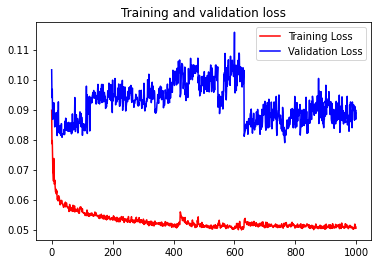

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_lower.history['loss']
val_loss = history_lower.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


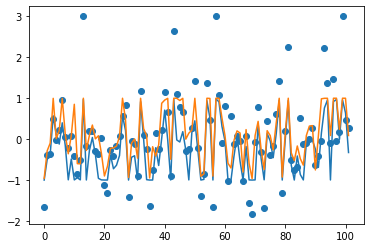

In [48]:
plt.figure()
plt.scatter(range(len(y_test)),y_test)
pred_lower = model_lower.predict(x_test)
plt.plot(range(len(y_test)),pred_lower)
pred_upper = model_upper.predict(x_test)
plt.plot(range(len(y_test)),pred_upper)

# Training with Constant Learning Rate

In [17]:
model_const1 = models.Sequential()
model_const1.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const1.add(layers.Dense(20, activation='relu'))
model_const1.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.5
model_const1.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [58]:
history_const1=model_const1.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test))

Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2652 - val_loss: 0.2400
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2245 - val_loss: 0.2160
Epoch 3/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2144 - val_loss: 0.2266
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2186
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2039
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1905 - val_loss: 0.2138
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1999 - val_loss: 0.2173
Epoch 8/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1948 - val_loss: 0.2143
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1947 - val_loss: 0.2205
Epoch 10/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1937 - val_loss: 0.2023

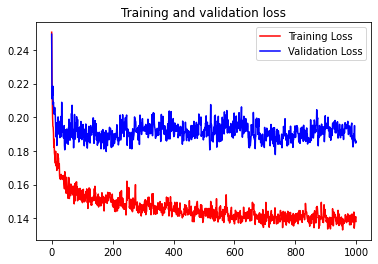

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const1.history['loss']
val_loss = history_const1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


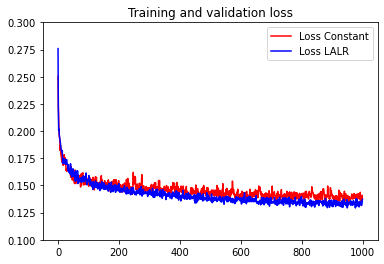

In [56]:
  %matplotlib inline
import matplotlib.pyplot as plt
loss_const = history_const1.history['loss']
loss_lalr = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss_const, 'r', label='Loss Constant')
plt.plot(epochs, loss_lalr, 'b', label='Loss LALR')
plt.title('Training and validation loss')
plt.ylim(0.1,0.3)
plt.legend()
plt.savefig('quantile_5.png')
plt.show()


In [18]:
model_const2 = models.Sequential()
model_const2.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const2.add(layers.Dense(20, activation='relu'))
model_const2.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.05
model_const2.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [19]:
history_const2 =model_const2.fit(x_train, y_train, epochs = 1000, batch_size = 4,validation_data=(x_test,y_test))

Epoch 1/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.2017 - val_loss: 0.1577
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.1407
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1204 - val_loss: 0.1325
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1117 - val_loss: 0.1271
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.1232
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.1200
Epoch 7/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0988 - val_loss: 0.1174
Epoch 8/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0960 - val_loss: 0.1151
Epoch 9/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.0936 - val_loss: 0.1133
Epoch 10/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.091

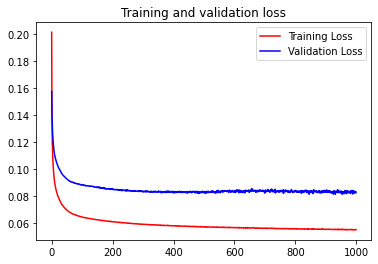

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const2.history['loss']
val_loss = history_const2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


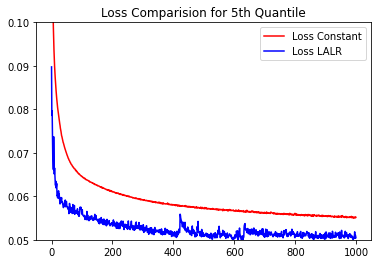

In [40]:
  %matplotlib inline
import matplotlib.pyplot as plt
loss_const = history_const2.history['loss']
loss_lalr = history_lower.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss_const, 'r', label='Loss Constant')
plt.plot(epochs, loss_lalr, 'b', label='Loss LALR')
plt.title('Loss Comparision for 5th Quantile')
plt.ylim(0.05,0.1)
plt.legend()
plt.savefig('quantile_5.png')
plt.show()


In [25]:
model_const3 = models.Sequential()
model_const3.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const3.add(layers.Dense(20, activation='relu'))
model_const3.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.95
model_const3.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [26]:
history_const3 =model_const3.fit(x_train, y_train, epochs = 1000, batch_size = 4,validation_data=(x_test,y_test))

Epoch 1/1000
101/101 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.2497
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2338 - val_loss: 0.2262
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2207 - val_loss: 0.2151
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2136 - val_loss: 0.2082
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2090 - val_loss: 0.2031
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2056 - val_loss: 0.1994
Epoch 7/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2029 - val_loss: 0.1965
Epoch 8/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.1941
Epoch 9/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1989 - val_loss: 0.1922
Epoch 10/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.197

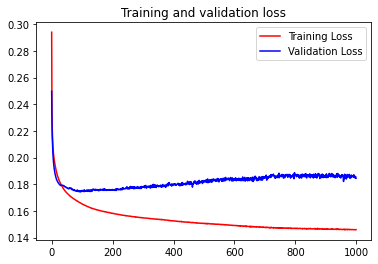

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const3.history['loss']
val_loss = history_const3.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


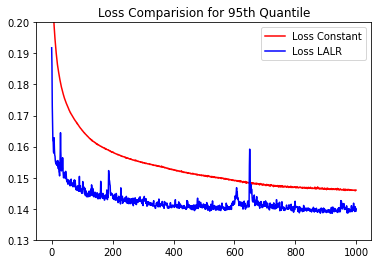

In [39]:
  %matplotlib inline
import matplotlib.pyplot as plt
loss_const = history_const3.history['loss']
loss_lalr = history_upper.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss_const, 'r', label='Loss Constant')
plt.plot(epochs, loss_lalr, 'b', label='Loss LALR')
plt.title('Loss Comparision for 95th Quantile')
plt.ylim(0.13,0.2)
plt.legend()
plt.savefig('quantile_5.png')
plt.show()
